### Imports

In [1]:
import pandas as pd
import torch
# set max num of rows and cols to display
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)

/home/mayank/miniconda3/envs/dsn/lib/python3.7/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


### Read the pre-proceesed data

In [2]:
drug_prop_cols = ['mw', 'polararea', 'complexity', 'heavycnt', 'hbonddonor', 'hbondacc', 'rotbonds', 'exactmass', 'monoisotopicmass', 'charge' , 'covalentunitcnt', 'isotopeatomcnt',
                'totalatomstereocnt', 'definedatomstereocnt', 'undefinedatomstereocnt', 'totalbondstereocnt', 'definedbondstereocnt', 'undefinedbondstereocnt']

In [4]:
df_all_se = pd.read_csv('prep_data/drug_all_se_pubchem.csv')
df_all_se.head()

,STITCH ID STEREO,MEDRA TERM UMLS CONCEPT ID,se_count,cid,mw,mf,polararea,complexity,xlogp,heavycnt,hbonddonor,hbondacc,rotbonds,inchi,isosmiles,canonicalsmiles,inchikey,iupacname,exactmass,monoisotopicmass,charge,covalentunitcnt,isotopeatomcnt,totalatomstereocnt,definedatomstereocnt,undefinedatomstereocnt,totalbondstereocnt,definedbondstereocnt,undefinedbondstereocnt,pclidcnt,gpidcnt,gpfamilycnt,neighbortype,meshheadings,annothits,annothitcnt,aids,cidcdate,sidsrcname,depcatg,annotation
0,CID000000119,"['C0151828', 'C0030193', 'C0042109', 'C0002994...",5,119,103.12,C4H9NO2,63.3,62.7,-3.2,7,2,3,3,"InChI=1S/C4H9NO2/c5-3-1-2-4(6)7/h1-3,5H2,(H,6,7)",C(CC(=O)O)CN,C(CC(=O)O)CN,BTCSSZJGUNDROE-UHFFFAOYSA-N,4-aminobutanoic acid,103.0630,103.0630,0,1,0,0,0,0,0,0,0,82230,34891,13769,2D+3D,gamma-Aminobutyric Acid,Biological Test Results|Chemical and Physical ...,15,155|157|161|165|167|175|190|248|328|357|410|41...,20040916,001Chemical|3B Scientific (Wuhan) Corp|3WAY PH...,Chemical Vendors|Curation Efforts|Governmental...,"COVID-19, COVID19, Coronavirus, Corona-virus, ..."
1,CID000000137,"['C0027497', 'C0017178', 'C0332534', 'C0042109...",79,137,131.13,C5H9NO3,80.4,121.0,-3.8,9,2,4,4,"InChI=1S/C5H9NO3/c6-3-4(7)1-2-5(8)9/h1-3,6H2,(...",C(CC(=O)O)C(=O)CN,C(CC(=O)O)C(=O)CN,ZGXJTSGNIOSYLO-UHFFFAOYSA-N,5-amino-4-oxopentanoic acid,131.0580,131.0580,0,1,0,0,0,0,0,0,0,12437,14305,4919,2D+3D,Aminolevulinic Acid,Biological Test Results|Chemical and Physical ...,14,1511|1554|1662|1663|1672|1813|1814|1832|1850|1...,20040916,001Chemical|3B Scientific (Wuhan) Corp|3WAY PH...,Chemical Vendors|Curation Efforts|Governmental...,NaN
2,CID000000175,"['C0020488', 'C0030193', 'C0018965', 'C0001122']",4,175,59.04,C2H3O2-,40.1,25.5,0.4,4,0,2,0,"InChI=1S/C2H4O2/c1-2(3)4/h1H3,(H,3,4)/p-1",CC(=O)[O-],CC(=O)[O-],QTBSBXVTEAMEQO-UHFFFAOYSA-M,acetate,59.0133,59.0133,-1,1,0,0,0,0,0,0,0,44665,2166,1375,2D+3D,Acetates,Biological Test Results|Classification|Drug an...,11,1803442,20040916,AAA Chemistry|ABI Chem|AKos Consulting & Solut...,Chemical Vendors|Curation Efforts|Governmental...,NaN
3,CID000000187,"['C0020458', 'C0010037', 'C0020649', 'C0016382...",7,187,146.21,C7H16NO2+,26.3,115.0,0.2,10,0,2,4,"InChI=1S/C7H16NO2/c1-7(9)10-6-5-8(2,3)4/h5-6H2...",CC(=O)OCC[N+](C)(C)C,CC(=O)OCC[N+](C)(C)C,OIPILFWXSMYKGL-UHFFFAOYSA-N,2-acetyloxyethyl(trimethyl)azanium,146.1180,146.1180,1,1,0,0,0,0,0,0,0,68145,84896,26608,2D+3D,Acetylcholine,Biological Test Results|Chemical and Physical ...,12,423|880|1030|1457|1458|1460|1463|1468|1469|147...,20040916,001Chemical|3B Scientific (Wuhan) Corp|3WAY PH...,Chemical Vendors|Curation Efforts|Governmental...,"COVID-19, COVID19, Coronavirus, Corona-virus, ..."
4,CID000000206,"['C0030193', 'C0546817', 'C0001122', 'C0027765...",38,206,180.16,C6H12O6,110.0,151.0,-2.6,12,5,6,1,InChI=1S/C6H12O6/c7-1-2-3(8)4(9)5(10)6(11)12-2...,C(C1C(C(C(C(O1)O)O)O)O)O,C(C1C(C(C(C(O1)O)O)O)O)O,WQZGKKKJIJFFOK-UHFFFAOYSA-N,"6-(hydroxymethyl)oxane-2,3,4,5-tetrol",180.0630,180.0630,0,1,0,5,0,5,0,0,0,1761,14422,5588,2D+3D,NaN,Biological Test Results|Chemical and Physical ...,8,155|157|161|165|167|175|192|248|256|328|880|88...,20050325,001Chemical|3WAY PHARM INC|A2B Chem|AA BLOCKS|...,Chemical Vendors|Curation Efforts|Governmental...,NaN


In [5]:
df_all_se[drug_prop_cols].isnull().sum()     # xlogp fill na

mw                        0
polararea                 0
complexity                0
heavycnt                  0
hbonddonor                0
hbondacc                  0
rotbonds                  0
exactmass                 0
monoisotopicmass          0
charge                    0
covalentunitcnt           0
isotopeatomcnt            0
totalatomstereocnt        0
definedatomstereocnt      0
undefinedatomstereocnt    0
totalbondstereocnt        0
definedbondstereocnt      0
undefinedbondstereocnt    0
dtype: int64

In [6]:
import numpy as np
import torch
import torch_geometric.datasets as datasets
import torch_geometric.data as data
import torch_geometric.transforms as transforms
import networkx as nx
from torch_geometric.utils.convert import to_networkx

In [7]:
embeddings = torch.rand((100, 16), dtype=torch.float)
rows = np.random.choice(100, 500)
cols = np.random.choice(100, 500)
edges = torch.tensor([rows, cols])
print(edges.shape)

torch.Size([2, 500])


/home/mayank/miniconda3/envs/dsn/lib/python3.7/site-packages/ipykernel_launcher.py:4: UserWarning: Creating a tensor from a list of numpy.ndarrays is extremely slow. Please consider converting the list to a single numpy.ndarray with numpy.array() before converting to a tensor. (Triggered internally at  /opt/conda/conda-bld/pytorch_1646755953518/work/torch/csrc/utils/tensor_new.cpp:210.)
  after removing the cwd from sys.path.


In [8]:
((2061 - 91) / 2061) * 100

95.58466763706939

In [9]:
df_all_se['se_count'].mean()

97.92684766214178

### Create ID mapping for stitch id and meddra term for side-effect

In [10]:
print(df_all_se['STITCH ID STEREO'].shape, df_all_se['STITCH ID STEREO'].nunique())

(1326,) 1326


In [11]:
from rdkit import Chem

In [12]:
STITCH_TO_ID_DICT = {id: idx for idx, id in enumerate(df_all_se['STITCH ID STEREO'])}
ID_TO_STITCH_DICT = {v: k for k, v in STITCH_TO_ID_DICT.items()}

In [13]:
drug_id_mol_graph_tup = [(id, Chem.MolFromSmiles(smiles.strip())) for id, smiles in zip(df_all_se['STITCH ID STEREO'], df_all_se['canonicalsmiles'])]
drug_to_mol_graph = {id:Chem.MolFromSmiles(smiles.strip()) for id, smiles in  zip(df_all_se['STITCH ID STEREO'], df_all_se['canonicalsmiles'])}

RDKit WARNING: [11:45:35] WARNING: not removing hydrogen atom without neighbors
RDKit WARNING: [11:45:35] WARNING: not removing hydrogen atom without neighbors
[11:45:35] WARNING: not removing hydrogen atom without neighbors
[11:45:35] WARNING: not removing hydrogen atom without neighbors
RDKit WARNING: [11:45:35] WARNING: not removing hydrogen atom without neighbors
RDKit WARNING: [11:45:35] WARNING: not removing hydrogen atom without neighbors
[11:45:35] WARNING: not removing hydrogen atom without neighbors
[11:45:35] WARNING: not removing hydrogen atom without neighbors


In [14]:
# Create a flattened list of unique meddra term concept id
column_list = df_all_se['MEDRA TERM UMLS CONCEPT ID'].tolist()
unique_values = list(set([item for sublist in column_list for item in eval(sublist)]))
MEDRAID_TO_ID_DICT = {id: idx for idx, id in enumerate(unique_values)}
ID_TO_MEDRAID_DICT = {v: k for k, v in MEDRAID_TO_ID_DICT.items()}

In [15]:
import numpy as np


def one_of_k_encoding_unk(x, allowable_set):
    if x not in allowable_set:
        x = allowable_set[-1]
    return list(map(lambda s: x == s, allowable_set))

def all_of_k_encoding_unk(x, allowable_set):
    enc = np.zeros(len(allowable_set))
    for idx, side_eff_id in enumerate(allowable_set):
        if side_eff_id in x:
            enc[idx] = 1
    return enc

In [16]:
# get all unique bond_type from mol_graph
bond_type_set = set()
for mol_graph in drug_to_mol_graph.values():
    bond_type_set.update([b.GetBondType() for b in mol_graph.GetBonds()])
bond_type_set = list(bond_type_set)
bond_type_set.sort()
bond_type_set = bond_type_set + ['head']
print(bond_type_set)


[rdkit.Chem.rdchem.BondType.SINGLE, rdkit.Chem.rdchem.BondType.DOUBLE, rdkit.Chem.rdchem.BondType.TRIPLE, rdkit.Chem.rdchem.BondType.AROMATIC, 'head']


In [17]:
import torch
import numpy as np

def one_of_k_encoding_unk(x, allowable_set):
    if x not in allowable_set:
        x = allowable_set[-1]
    return list(map(lambda s: x == s, allowable_set))

def atom_features(atom,
                explicit_H=True,
                use_chirality=False):

    results = one_of_k_encoding_unk(
        atom.GetSymbol(),
        ['C','N','O', 'S','F','Si','P', 'Cl','Br','Mg','Na','Ca','Fe','As','Al','I','B','V','K','Tl',
            'Yb','Sb','Sn','Ag','Pd','Co','Se','Ti','Zn','H', 'Li','Ge','Cu','Au','Ni','Cd','In',
            'Mn','Zr','Cr','Pt','Hg','Pb','Unknown'
        ]) + [atom.GetDegree()/10, atom.GetImplicitValence(), 
                atom.GetFormalCharge(), atom.GetNumRadicalElectrons()] + \
                one_of_k_encoding_unk(atom.GetHybridization(), [
                Chem.rdchem.HybridizationType.SP, Chem.rdchem.HybridizationType.SP2,
                Chem.rdchem.HybridizationType.SP3, Chem.rdchem.HybridizationType.
                                    SP3D, Chem.rdchem.HybridizationType.SP3D2
                ]) + [atom.GetIsAromatic()]
    # In case of explicit hydrogen(QM8, QM9), avoid calling `GetTotalNumHs`
    if explicit_H:
        results = results + [atom.GetTotalNumHs()]

    if use_chirality:
        try:
            results = results + one_of_k_encoding_unk(
            atom.GetProp('_CIPCode'),
            ['R', 'S']) + [atom.HasProp('_ChiralityPossible')]
        except:
            results = results + [False, False
                            ] + [atom.HasProp('_ChiralityPossible')]

    results = np.array(results).astype(np.float32)

    return torch.from_numpy(results) # torch.rand_like()

def get_mol_edge_list_and_feat_mtx(mol_graph):
    n_features = [(atom.GetIdx(), atom_features(atom)) for atom in mol_graph.GetAtoms()]
    n_features.sort() # to make sure that the feature matrix is aligned according to the idx of the atom
    _, n_features = zip(*n_features)
    n_features = torch.stack(n_features)
    
    atm_num = len(n_features)
    average_row = torch.mean(n_features, dim=0)
    # random like average_row
    average_row = torch.rand_like(average_row)
    # Expand dimensions to match the shape of n_features
    average_row = torch.unsqueeze(average_row, 0)
    # Concatenate the average row with n_features
    n_features_with_head = torch.cat((n_features, average_row), dim=0)
    
    edge_list = torch.LongTensor([(b.GetBeginAtomIdx(), b.GetEndAtomIdx()) for b in mol_graph.GetBonds()])
    edge_attr = torch.FloatTensor([one_of_k_encoding_unk(b.GetBondType(), bond_type_set) for b in mol_graph.GetBonds()])

    head_edges = torch.LongTensor([(atm_num, i) for i in range(atm_num)])
    edge_attr_head_edges = torch.FloatTensor([one_of_k_encoding_unk('head', bond_type_set) for i in range(atm_num)])

    undirected_head_edges = torch.cat([head_edges, head_edges[:, [1, 0]]], dim=0) if len(head_edges) else head_edges
    undirected_edge_attr_head_edges = torch.cat([edge_attr_head_edges, edge_attr_head_edges], dim=0) if len(edge_attr_head_edges) else edge_attr_head_edges

    undirected_edge_list = torch.cat([edge_list, edge_list[:, [1, 0]]], dim=0) if len(edge_list) else edge_list 
    undirected_edge_attr = torch.cat([edge_attr, edge_attr], dim=0) if len(edge_attr) else edge_attr

    undirected_edge_list_all = torch.cat([undirected_edge_list, undirected_head_edges], dim=0) if len(undirected_head_edges) else undirected_edge_list
    undirected_edge_attr_all = torch.cat([undirected_edge_attr, undirected_edge_attr_head_edges], dim=0) if len(undirected_edge_attr_head_edges) else undirected_edge_attr

    return undirected_edge_list_all.T, n_features_with_head, undirected_edge_attr_all


In [18]:
edge_list, n_feature, edge_attr = get_mol_edge_list_and_feat_mtx(mol_graph)

In [19]:
print(f'shape of edge_list: {edge_list.shape}, shape of n_feature: {n_feature.shape}, shape of edge_attr: {edge_attr.shape}')

shape of edge_list: torch.Size([2, 858]), shape of n_feature: torch.Size([215, 55]), shape of edge_attr: torch.Size([858, 5])


In [20]:
one_of_k_encoding_unk(mol_graph.GetBonds()[0].GetBondType(), bond_type_set)

[True, False, False, False, False]

In [21]:
# # random torch of same shape as results
# results = torch.ones(5,4)
# torch.rand_like(results)



In [22]:
import itertools
import numpy as np
# Gettings information and features of atoms
ATOM_MAX_NUM = np.max([m[1].GetNumAtoms() for m in drug_id_mol_graph_tup])
AVAILABLE_ATOM_SYMBOLS = list({a.GetSymbol() for a in itertools.chain.from_iterable(m[1].GetAtoms() for m in drug_id_mol_graph_tup)})
AVAILABLE_ATOM_DEGREES = list({a.GetDegree() for a in itertools.chain.from_iterable(m[1].GetAtoms() for m in drug_id_mol_graph_tup)})
AVAILABLE_ATOM_TOTAL_HS = list({a.GetTotalNumHs() for a in itertools.chain.from_iterable(m[1].GetAtoms() for m in drug_id_mol_graph_tup)})
max_valence = max(a.GetImplicitValence() for a in itertools.chain.from_iterable(m[1].GetAtoms() for m in drug_id_mol_graph_tup))
max_valence = max(max_valence, 9)
AVAILABLE_ATOM_VALENCE = np.arange(max_valence + 1)

MAX_ATOM_FC = abs(np.max([a.GetFormalCharge() for a in itertools.chain.from_iterable(m[1].GetAtoms() for m in drug_id_mol_graph_tup)]))
MAX_ATOM_FC = MAX_ATOM_FC if MAX_ATOM_FC else 0
MAX_RADICAL_ELC = abs(np.max([a.GetNumRadicalElectrons() for a in itertools.chain.from_iterable(m[1].GetAtoms() for m in drug_id_mol_graph_tup)]))
MAX_RADICAL_ELC = MAX_RADICAL_ELC if MAX_RADICAL_ELC else 0


MOL_EDGE_LIST_FEAT_MTX = {drug_id: get_mol_edge_list_and_feat_mtx(mol) 
                                for drug_id, mol in drug_id_mol_graph_tup}

MOL_EDGE_LIST_FEAT_MTX = {drug_id: mol for drug_id, mol in MOL_EDGE_LIST_FEAT_MTX.items() if mol is not None}

TOTAL_ATOM_FEATS = (next(iter(MOL_EDGE_LIST_FEAT_MTX.values()))[1].shape[-1])

In [23]:
DRUG_PROP_DICT = dict(list(zip(df_all_se['STITCH ID STEREO'].values, df_all_se[drug_prop_cols].values)))

In [25]:
# compiute Tanimoto similarity between all drug pairs in MOL_EDGE_LIST_FEAT_MTX
from rdkit import DataStructs
from rdkit.Chem.Fingerprints import FingerprintMols
from rdkit.Chem import AllChem

# compute all possible similarity pairs
drug_id_list = list(MOL_EDGE_LIST_FEAT_MTX.keys())
drug_id_list.sort()
# drug_id_list to idx
drug_id_to_idx = {drug_id: idx for idx, drug_id in enumerate(drug_id_list)}
# idx to drug_id
idx_to_drug_id = {idx: drug_id for idx, drug_id in enumerate(drug_id_list)}
# all pairs except self pairs
drug_id_pairs = [(drug_id_list[i], drug_id_list[j]) for i in range(len(drug_id_list)) for j in range(i+1, len(drug_id_list))]

# # compute tanimoto similarity
# drug_id_pairs_tanimoto_sim = {drug_id_pair: DataStructs.FingerprintSimilarity(
#                                     FingerprintMols.FingerprintMol(drug_to_mol_graph[drug_id_pair[0]]), 
#                                     FingerprintMols.FingerprintMol(drug_to_mol_graph[drug_id_pair[1]]))
#                                 for drug_id_pair in drug_id_pairs}        

In [26]:

drug_id_to_idx = {drug_id: idx for idx, drug_id in enumerate(drug_id_list)}
# idx to drug_id
idx_to_drug_id = {idx: drug_id for idx, drug_id in enumerate(drug_id_list)}

In [27]:
import pickle
# dump drug_id_pairs_tanimoto_sim
# with open('drug_id_pairs_tanimoto_sim.pkl', 'wb') as f:
#     pickle.dump(drug_id_pairs_tanimoto_sim, f)

# load drug_id_pairs_tanimoto_sim
with open('drug_id_pairs_tanimoto_sim.pkl', 'rb') as f:
    drug_id_pairs_tanimoto_sim = pickle.load(f)


In [28]:
# map drug_id to idx
drug_id_pairs_tanimoto_sim_edge_index = np.array([[drug_id_to_idx[drug_id_pair[0]], drug_id_to_idx[drug_id_pair[1]]] for drug_id_pair, sim in drug_id_pairs_tanimoto_sim.items() if sim > 0.7]).T

In [29]:
drug_id_pairs_tanimoto_sim_edge_index

array([[   0,    0,    0, ..., 1314, 1315, 1321],
       [  14,   70,  541, ..., 1316, 1316, 1325]])

In [30]:
# drug_id node features
drug_id_node_features = np.array([DRUG_PROP_DICT[drug_id] for drug_id in drug_id_list])

In [31]:
drug_id_node_features

array([[ 103.12,   63.3 ,   62.7 , ...,    0.  ,    0.  ,    0.  ],
       [ 131.13,   80.4 ,  121.  , ...,    0.  ,    0.  ,    0.  ],
       [  59.04,   40.1 ,   25.5 , ...,    0.  ,    0.  ,    0.  ],
       ...,
       [ 699.9 ,  272.  ,  909.  , ...,    0.  ,    0.  ,    0.  ],
       [ 746.5 ,  113.  ,  511.  , ...,    0.  ,    0.  ,    0.  ],
       [3039.4 , 1400.  , 6940.  , ...,    0.  ,    0.  ,    0.  ]])

In [32]:
len(drug_id_mol_graph_tup), len(MOL_EDGE_LIST_FEAT_MTX.keys())

(1326, 1326)

In [33]:

DRUG_ALL_SE_DICT = dict(list(zip(df_all_se['STITCH ID STEREO'].values, df_all_se['MEDRA TERM UMLS CONCEPT ID'].apply(lambda x: all_of_k_encoding_unk(eval(x), unique_values)))))



In [34]:
# drug_id all_se labels
drug_id_all_se_labels = np.stack(np.array([DRUG_ALL_SE_DICT[drug_id] for drug_id in drug_id_list]))

In [35]:
drug_id_all_se_labels.shape, drug_id_node_features.shape

((1326, 2061), (1326, 18))

In [36]:
from torch.utils.data import Dataset, DataLoader
from torch_geometric.data import Data, Batch
import math

# drug_id_similarity dataset
drug_all_se_graph = Data(x=torch.tensor(drug_id_node_features, dtype=torch.float),
                            edge_index=torch.tensor(drug_id_pairs_tanimoto_sim_edge_index, dtype=torch.long),
                            y=torch.tensor(drug_id_all_se_labels, dtype=torch.float))


/home/mayank/miniconda3/envs/dsn/lib/python3.7/site-packages/sklearn/manifold/_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
/home/mayank/miniconda3/envs/dsn/lib/python3.7/site-packages/sklearn/manifold/_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,


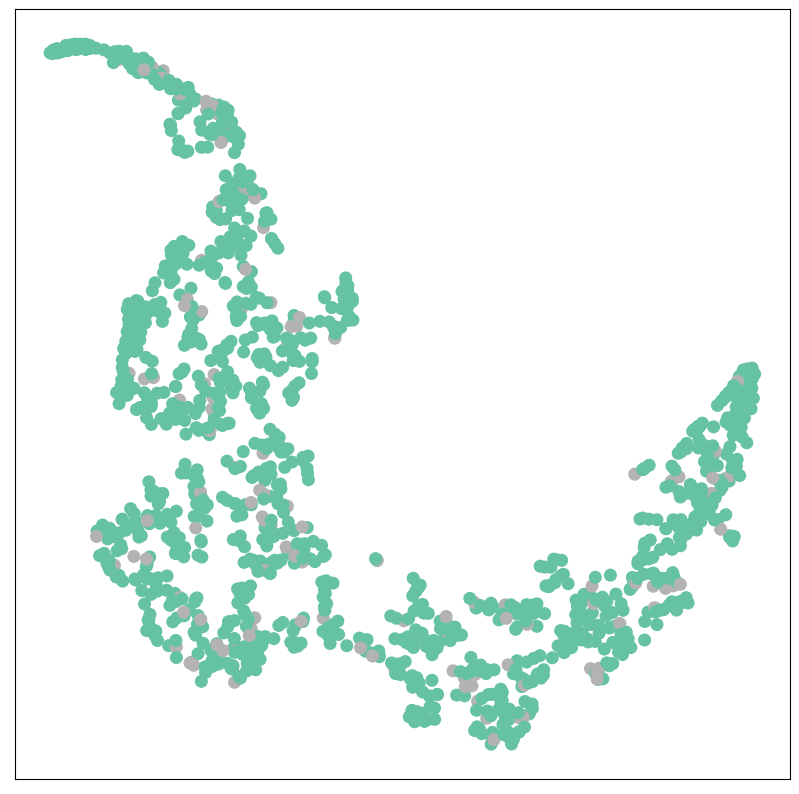

In [37]:
# Helper function for visualization.
%matplotlib inline
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE

def visualize(h, color):
    z = TSNE(n_components=2).fit_transform(h.detach().cpu().numpy())

    plt.figure(figsize=(10,10))
    plt.xticks([])
    plt.yticks([])

    plt.scatter(z[:, 0], z[:, 1], s=70, c=color, cmap="Set2")
    plt.show()

visualize(drug_all_se_graph.x, color=drug_all_se_graph.y[:, 100])

In [38]:
# define a multi-label multi-class node classification model 
from torch_geometric.nn import GATConv
import torch.nn.functional as F

class GAT(torch.nn.Module):
    def __init__(self, num_features, num_classes):
        super(GAT, self).__init__()
        self.conv1 = GATConv(num_features,64, heads=8, dropout=0.6)
        self.conv2 = GATConv(8 * 64, num_classes, heads=1, concat=False,
                             dropout=0.6)
        
        # layer norm
        self.init_norm = torch.nn.LayerNorm(num_features)
    
    def forward(self, x, edge_index):
        # layer norm
        x = self.init_norm(x)
        x = F.dropout(x, p=0.6, training=self.training)
        x = F.elu(self.conv1(x, edge_index))
        x = F.dropout(x, p=0.6, training=self.training)
        x = self.conv2(x, edge_index)
        # multi-label multi-class classification
        # print(x.shape)
        return torch.sigmoid(x)

In [39]:
from iterstrat.ml_stratifiers import MultilabelStratifiedShuffleSplit, MultilabelStratifiedKFold
from sklearn.model_selection import train_test_split


cv_split = MultilabelStratifiedShuffleSplit(n_splits=2, test_size=0.2, random_state=0)
train_index, val_index = next(iter(cv_split.split(X=drug_all_se_graph.x, y=drug_all_se_graph.y)))
# split train and test mask
train_mask = torch.tensor([True] * len(drug_all_se_graph.y))
test_mask = torch.tensor([False] * len(drug_all_se_graph.y))
train_mask[val_index] = False
test_mask[val_index] = True
drug_all_se_graph.train_mask = train_mask
drug_all_se_graph.test_mask = test_mask

In [52]:
# define model
model = GAT(num_features=drug_all_se_graph.x.shape[1], num_classes=drug_all_se_graph.y.shape[1])
# define optimizer
optimizer = torch.optim.Adam(model.parameters(), lr=0.005, weight_decay=5e-4)
loss_fn = DiceLoss(smooth=1e-5)
# train model
model.train()
for epoch in range(200):
    optimizer.zero_grad()
    out = model(drug_all_se_graph.x, drug_all_se_graph.edge_index)
    loss = loss_fn(out[drug_all_se_graph.train_mask], drug_all_se_graph.y[drug_all_se_graph.train_mask])
    loss.backward()
    optimizer.step()
    if epoch % 10 == 0:
        print(loss)

tensor(0.9167, grad_fn=<RsubBackward1>)
tensor(0.8640, grad_fn=<RsubBackward1>)
tensor(0.8486, grad_fn=<RsubBackward1>)
tensor(0.8401, grad_fn=<RsubBackward1>)
tensor(0.8414, grad_fn=<RsubBackward1>)
tensor(0.8378, grad_fn=<RsubBackward1>)
tensor(0.8392, grad_fn=<RsubBackward1>)
tensor(0.8390, grad_fn=<RsubBackward1>)
tensor(0.8380, grad_fn=<RsubBackward1>)
tensor(0.8386, grad_fn=<RsubBackward1>)
tensor(0.8448, grad_fn=<RsubBackward1>)
tensor(0.8387, grad_fn=<RsubBackward1>)
tensor(0.8389, grad_fn=<RsubBackward1>)
tensor(0.8394, grad_fn=<RsubBackward1>)
tensor(0.8353, grad_fn=<RsubBackward1>)
tensor(0.8361, grad_fn=<RsubBackward1>)
tensor(0.8371, grad_fn=<RsubBackward1>)
tensor(0.8381, grad_fn=<RsubBackward1>)
tensor(0.8368, grad_fn=<RsubBackward1>)
tensor(0.8346, grad_fn=<RsubBackward1>)


In [45]:
from sklearn import metrics

def _compute_metrics(probas_pred, target):            
    pred = (probas_pred >= 0.5).int()
    acc = metrics.accuracy_score(target, pred)
    auroc = metrics.roc_auc_score(target, probas_pred)
    f1_score = metrics.f1_score(target, pred)
    precision = metrics.precision_score(target, pred)
    recall = metrics.recall_score(target, pred)
    p, r, t = metrics.precision_recall_curve(target, probas_pred)
    int_ap = metrics.auc(r, p)
    ap = metrics.average_precision_score(target, probas_pred)

    return acc, auroc, f1_score, precision, recall, int_ap, ap


In [46]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

def test_dv(drug_all_se_graph, model):
    test_probas_pred = []
    test_ground_truth = []
    model.eval()
    with torch.no_grad():
        out = model(drug_all_se_graph.x, drug_all_se_graph.edge_index)
        probas_pred = out[drug_all_se_graph.test_mask].detach().flatten().cpu()
        ground_truth = drug_all_se_graph.y[drug_all_se_graph.test_mask].flatten().float().cpu()
        
    
        
        test_acc, test_auc_roc, test_f1, test_precision,test_recall,test_int_ap, test_ap = _compute_metrics(probas_pred, ground_truth)
                                                                                         
    print('\n')
    print('============================== Test Result ==============================')
    print(f'\t\ttest_acc: {test_acc:.4f}, test_auc_roc: {test_auc_roc:.4f},test_f1: {test_f1:.4f},test_precision:{test_precision:.4f}')
    print(f'\t\ttest_recall: {test_recall:.4f}, test_int_ap: {test_int_ap:.4f},test_ap: {test_ap:.4f}')
    torch.cuda.empty_cache()      

In [53]:
test_dv(drug_all_se_graph, model)



============================== Test Result ==============================
		test_acc: 0.8745, test_auc_roc: 0.8454,test_f1: 0.3644,test_precision:0.2514
		test_recall: 0.6623, test_int_ap: 0.3780,test_ap: 0.3781


In [110]:
# # test model
# model.eval()
# pred = model(drug_all_se_graph.x, drug_all_se_graph.edge_index)
# correct = float (pred[drug_all_se_graph.test_mask].eq(drug_all_se_graph.y[drug_all_se_graph.test_mask]).sum().item())
# acc = correct / drug_all_se_graph.test_mask.sum().item()
# print('Accuracy: {:.4f}'.format(acc))


Accuracy: 0.0000


In [21]:
from collections import Counter
cid_ctr = Counter([stichid for mlmc in column_list for stichid in eval(mlmc)])

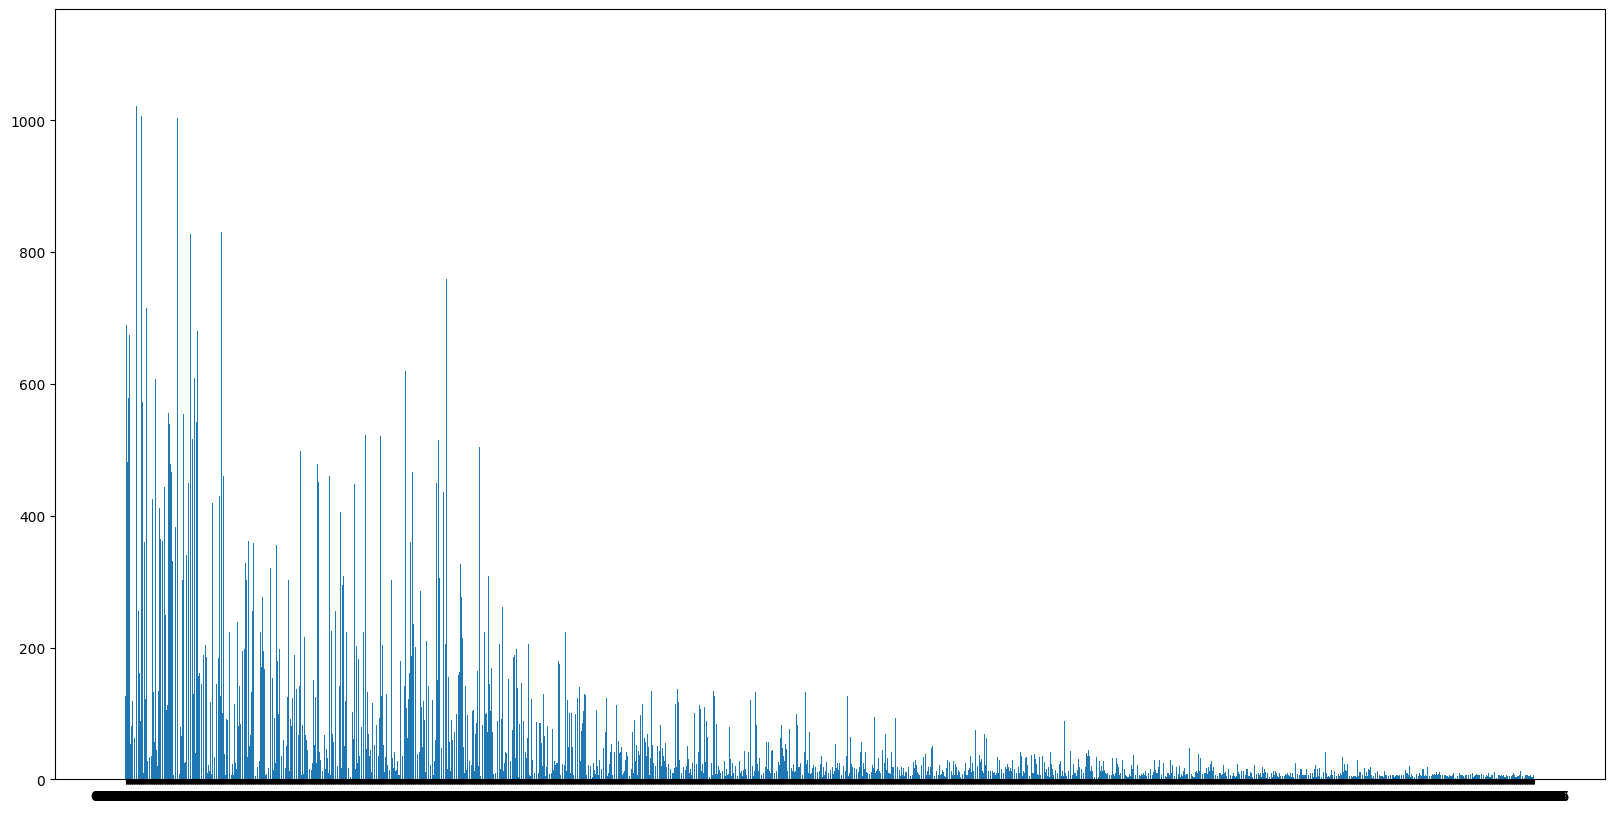

In [22]:
# plot bar chart of all the side-effect
import matplotlib.pyplot as plt
plt.figure(figsize=(20, 10))
plt.bar(cid_ctr.keys(), cid_ctr.values())
plt.show()

In [23]:
print(len(list(cid_ctr.keys())), len(unique_values))

2061 2061


In [24]:
unique_values.sort()

In [25]:
unique_values[:5]

['C0000727', 'C0000731', 'C0000737', 'C0000768', 'C0000786']

In [26]:
print(len(unique_values), unique_values[:5])

2061 ['C0000727', 'C0000731', 'C0000737', 'C0000768', 'C0000786']


### Data Distribution and split

In [27]:
import random
import numpy as np
import torch

def seed_everything(seed: int):
    random.seed(seed)
    np.random.seed(seed)
    torch.manual_seed(seed)
    torch.cuda.manual_seed_all(seed)
    torch.backends.cudnn.deterministic = True
    torch.backends.cudnn.benchmark = False

# Usage example:
seed_everything(42)  # Set the seed to 42


##### Stratified Split

In [28]:
X = df_all_se['STITCH ID STEREO'].values
y = np.stack(df_all_se['MEDRA TERM UMLS CONCEPT ID'].apply(lambda x: all_of_k_encoding_unk(eval(x), unique_values)))

from sklearn.model_selection import train_test_split
# Split data into training (60%), validation (20%), and testing (20%) sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

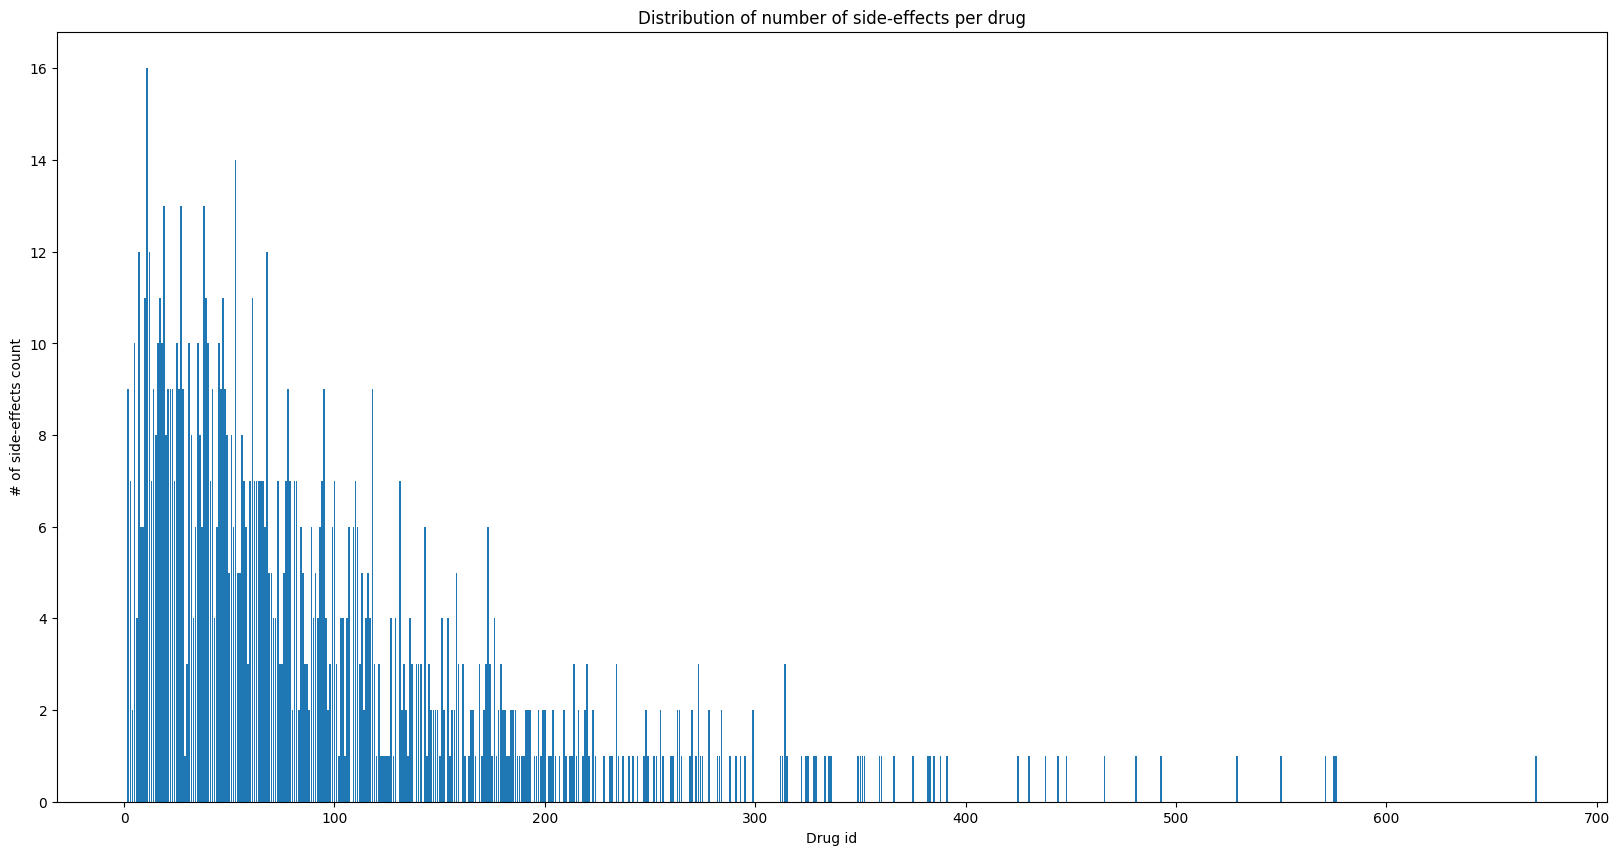

In [29]:
# plot y  distribution such as count of 1 per row
plt.figure(figsize=(20, 10))
plt.bar(*zip(*Counter(y_train.sum(axis=1)).items()))
plt.title('Distribution of number of side-effects per drug')
plt.xlabel('Drug id')
plt.ylabel('# of side-effects count')
plt.show()

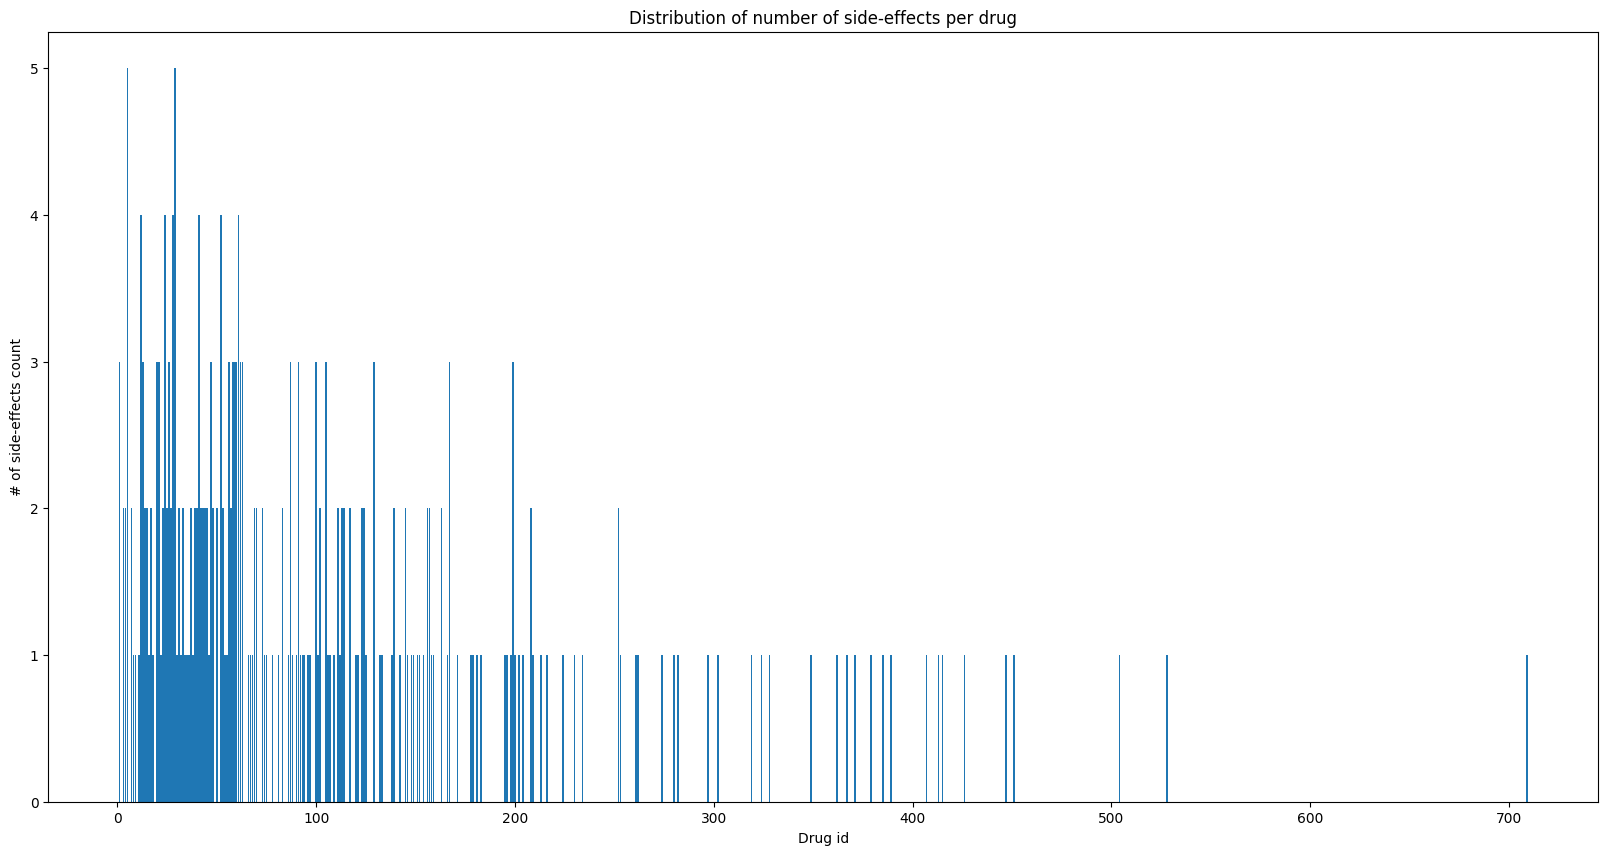

In [30]:
# plot y  distribution such as count of 1 per row
plt.figure(figsize=(20, 10))
plt.bar(*zip(*Counter(y_test.sum(axis=1)).items()))
plt.title('Distribution of number of side-effects per drug')
plt.xlabel('Drug id')
plt.ylabel('# of side-effects count')
plt.show()

In [31]:
from iterstrat.ml_stratifiers import MultilabelStratifiedShuffleSplit, MultilabelStratifiedKFold
from sklearn.model_selection import train_test_split

def split_train_valid(X, y, fold, val_ratio=0.2):
    cv_split = MultilabelStratifiedShuffleSplit(n_splits=2, test_size=val_ratio, random_state=fold)
    train_index, val_index = next(iter(cv_split.split(X=X, y=y)))
    X_train = X[train_index]
    y_train = y[train_index]
    X_val = X[val_index]
    y_val = y[val_index]
    # X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=val_ratio, random_state=fold)
    return X_train, y_train, X_val, y_val

In [32]:
def ksplit_train_valid(X, y, num_folds, val_ratio=0.2):
    mskf = MultilabelStratifiedKFold(n_splits=num_folds, random_state=0, shuffle=True)
    folds = []
    for train_index, val_index in mskf.split(X, y):
        X_train, X_val = X[train_index], X[val_index]
        y_train, y_val = y[train_index], y[val_index]
        folds.append((X_train, y_train, X_val, y_val))
    return folds

In [33]:
folds = ksplit_train_valid(X_train, y_train, num_folds=5, val_ratio=0.2)

In [34]:
X_train, y_train, X_val, y_val = split_train_valid(X_train, y_train, 1)
print(f'X_train: {X_train.shape}, y_train: {y_train.shape}, X_val: {X_val.shape}, y_val: {y_val.shape}, X_test: {X_test.shape}, y_test: {y_test.shape}')

X_train: (808,), y_train: (808, 2061), X_val: (252,), y_val: (252, 2061), X_test: (266,), y_test: (266, 2061)


In [35]:
train_tup = list(zip(X_train, y_train))
val_tup = list(zip(X_val, y_val))
test_tup = list(zip(X_test, y_test))

In [36]:
train_tup[0]

('CID000003278', array([0., 0., 0., ..., 0., 0., 0.]))

In [37]:
# randsplit_df = pd.DataFrame({
#     'train': Counter(str(combination) for row in get_combination_wise_output_matrix(y_train.values, order=2) for combination in row),
#     'test' : Counter(str(combination) for row in get_combination_wise_output_matrix(y_test.values, order=2) for combination in row)
# }).T.fillna(0.0)

In [38]:
# sort the columns
# randsplit_df = randsplit_df.reindex(sorted(randsplit_df.columns), axis=1)

In [39]:
# randsplit_df.head()

In [40]:
# start_df = pd.DataFrame({
#     'train': Counter(str(combination) for row in get_combination_wise_output_matrix(y_train, order=2) for combination in row),
#     'test' : Counter(str(combination) for row in get_combination_wise_output_matrix(y_test, order=2) for combination in row)
# }).T.fillna(0.0)

In [41]:
# start_df.head()

In [42]:
# randsplit_df[start_df.columns].head()

In [43]:
train_tup[0]

('CID000003278', array([0., 0., 0., ..., 0., 0., 0.]))

In [44]:
ALL_DRUG_IDS, _ = zip(*drug_id_mol_graph_tup)
ALL_DRUG_IDS = np.array(list(set(ALL_DRUG_IDS)))

In [45]:
ALL_DRUG_IDS

array(['CID000004212', 'CID000003827', 'CID000004189', ...,
       'CID000024424', 'CID000056959', 'CID000054840'], dtype='<U12')

In [46]:
from torch.utils.data import Dataset, DataLoader
from torch_geometric.data import Data, Batch
import math

class DrugDataset(Dataset):
    def __init__(self, data_tup, ratio=1.0,  neg_ent=1, disjoint_split=True, shuffle=True):
        ''''disjoint_split: Consider whether entities should appear in one and only one split of the dataset
        ''' 
        self.neg_ent = neg_ent # not using now
        self.data_tup = []
        self.ratio = ratio
        
        for h, se in data_tup:
            if (h in MOL_EDGE_LIST_FEAT_MTX):
                self.data_tup.append((h,se))
        if disjoint_split:
            d1, *_ = zip(*self.data_tup)
            self.drug_ids = np.array(list(set(d1)))
        else:
            self.drug_ids = ALL_DRUG_IDS

        self.drug_ids = np.array([id for id in self.drug_ids if id in MOL_EDGE_LIST_FEAT_MTX])
        
        if shuffle:
            random.shuffle(self.data_tup)
        limit = math.ceil(len(self.data_tup) * ratio)
        self.data_tup = self.data_tup[:limit]
  
    def __len__(self):
        return len(self.data_tup)
    
    def __getitem__(self, index):
        return self.data_tup[index]

    def collate_fn(self, batch):
        
        h_samples = []
        h_se_samples = []
        
        for h, se in batch:
            h_data = self.__create_graph_data(h)
            h_samples.append(h_data)
            h_se_samples.append(se)
        
        h_samples = Batch.from_data_list(h_samples)
        h_se_samples = torch.LongTensor(h_se_samples)

        return h_samples, h_se_samples
    
    # def __create_side_eff_labels(self, id):
    #     return SIDE_EFFECT_LABELS[id]

    def __create_graph_data(self, id):
        edge_index = MOL_EDGE_LIST_FEAT_MTX[id][0]
        n_features = MOL_EDGE_LIST_FEAT_MTX[id][1]
        edge_attr = MOL_EDGE_LIST_FEAT_MTX[id][2]  
        return Data(x=n_features, edge_index=edge_index, edge_attr=edge_attr)
    
    def _create_b_graph(self,edge_index,x_s, x_t):
        return BipartiteData(edge_index,x_s,x_t)

    def __corrupt_ent(self, other_ent, r, other_ent_with_r_dict, max_num=1):
        corrupted_ents = []
        current_size = 0
        while current_size < max_num:
            candidates = np.random.choice(self.drug_ids, (max_num - current_size) * 2)
            mask = np.isin(candidates, other_ent_with_r_dict[(other_ent, r)], assume_unique=True, invert=True)
            corrupted_ents.append(candidates[mask])
            current_size += len(corrupted_ents[-1])
        
        if corrupted_ents != []:
            corrupted_ents = np.concatenate(corrupted_ents)

        return np.asarray(corrupted_ents[:max_num])
        
    def __corrupt_head(self, t, r, n=1):
        return self.__corrupt_ent(t, r, ALL_TRUE_H_WITH_TR, n)

    def __corrupt_tail(self, h, r, n=1):
        return self.__corrupt_ent(h, r, ALL_TRUE_T_WITH_HR, n)
    
    def __normal_batch(self, h, t, r, neg_size):
        neg_size_h = 0
        neg_size_t = 0
        prob = ALL_TAIL_PER_HEAD[r] / (ALL_TAIL_PER_HEAD[r] + ALL_HEAD_PER_TAIL[r])
        for i in range(neg_size):
            if random.random() < prob:
                neg_size_h += 1
            else:
                neg_size_t +=1
        
        return (self.__corrupt_head(t, r, neg_size_h),
                self.__corrupt_tail(h, r, neg_size_t))  


In [47]:
class DrugDataLoader(DataLoader):
    def __init__(self, data, **kwargs):
        super().__init__(data, collate_fn=data.collate_fn, **kwargs)

In [48]:
train_data = DrugDataset(train_tup, ratio=1, neg_ent=1)
val_data = DrugDataset(val_tup, ratio=1, neg_ent=1)
test_data = DrugDataset(test_tup, ratio=1, neg_ent=1)

In [49]:
print(f"Training with {len(train_data)} samples, validating with {len(val_data)}, and testing with {len(test_data)}")

train_data_loader = DrugDataLoader(train_data, batch_size=64, shuffle=True,num_workers=2)
val_data_loader = DrugDataLoader(val_data, batch_size=64,num_workers=2)
test_data_loader = DrugDataLoader(test_data, batch_size=64 *3,num_workers=2)
    

Training with 808 samples, validating with 252, and testing with 266


In [50]:
X, y = next(iter(train_data_loader))

In [51]:
X

DataBatch(x=[2189, 55], edge_index=[2, 8678], edge_attr=[8678, 5], batch=[2189], ptr=[65])

In [52]:
y, y.shape

(tensor([[0, 0, 1,  ..., 1, 0, 0],
         [0, 1, 1,  ..., 0, 0, 0],
         [0, 0, 1,  ..., 0, 0, 0],
         ...,
         [0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 1,  ..., 1, 0, 0],
         [0, 0, 0,  ..., 1, 0, 0]]),
 torch.Size([64, 2061]))

In [53]:
for step,( X,y) in enumerate(train_data_loader):
    print(f'Step {step + 1}:')
    print('=======')
    print(f'Number of graphs in the current batch: {y.shape[0]}')
    print(X)
    print()

Step 1:
Number of graphs in the current batch: 64
DataBatch(x=[2034, 55], edge_index=[2, 8078], edge_attr=[8078, 5], batch=[2034], ptr=[65])

Step 2:
Number of graphs in the current batch: 64
DataBatch(x=[2011, 55], edge_index=[2, 7998], edge_attr=[7998, 5], batch=[2011], ptr=[65])

Step 3:
Number of graphs in the current batch: 64
DataBatch(x=[1854, 55], edge_index=[2, 7336], edge_attr=[7336, 5], batch=[1854], ptr=[65])

Step 4:
Number of graphs in the current batch: 64
DataBatch(x=[2257, 55], edge_index=[2, 9006], edge_attr=[9006, 5], batch=[2257], ptr=[65])

Step 5:
Number of graphs in the current batch: 64
DataBatch(x=[2058, 55], edge_index=[2, 8186], edge_attr=[8186, 5], batch=[2058], ptr=[65])

Step 6:
Number of graphs in the current batch: 64
DataBatch(x=[1857, 55], edge_index=[2, 7366], edge_attr=[7366, 5], batch=[1857], ptr=[65])

Step 7:
Number of graphs in the current batch: 64
DataBatch(x=[2048, 55], edge_index=[2, 8136], edge_attr=[8136, 5], batch=[2048], ptr=[65])

Step 8

In [54]:
torch.zeros_like(torch.unique(torch.tensor([1,2,2,3,4])))

tensor([0, 0, 0, 0])

In [55]:
len(bond_type_set)

5

In [56]:
from torch.nn import Linear, Sequential
from torch import nn
import torch.nn.functional as F
from torch_geometric.nn import GCNConv, GATv2Conv, GATConv
from torch_geometric.nn import global_mean_pool


class GCN(torch.nn.Module):
    def __init__(self, num_node_features, hidden_channels, num_classes):
        super(GCN, self).__init__()
        torch.manual_seed(12345)
        self.conv1 = GATv2Conv(num_node_features, hidden_channels, edge_dim=5)
        self.conv2 = GATv2Conv(hidden_channels, hidden_channels,  edge_dim=5)
        self.conv3 = GATv2Conv(hidden_channels, hidden_channels,  edge_dim=5)
        self.lin = Sequential(Linear(3*hidden_channels, hidden_channels), nn.ReLU(), Linear(hidden_channels, num_classes), nn.Sigmoid())            
        self.batchnorm1 = torch.nn.BatchNorm1d(num_node_features)
        self.batchnorm2 = torch.nn.BatchNorm1d(hidden_channels)
        self.batchnorm3 = torch.nn.BatchNorm1d(hidden_channels)      

    def forward(self, x, edge_index, edge_attr, batch):
        head_nodes = []
        # Find the indices of the last node in each batch
        unique_batches = torch.unique(batch)
        last_indices = torch.zeros_like(unique_batches)
        for i, b in enumerate(unique_batches):
            last_indices[i] = (batch == b).nonzero().max()
        
        x = self.batchnorm1(x)
        # 1. Obtain node embeddings 
        x = self.conv1(x, edge_index, edge_attr=edge_attr)
        x = self.batchnorm2(x)
        x = x.relu()
        head_nodes.append(x[last_indices])
        x = self.conv2(x, edge_index, edge_attr=edge_attr)
        x = self.batchnorm3(x)
        x = x.relu()
        head_nodes.append(x[last_indices])
        x = self.conv3(x, edge_index, edge_attr=edge_attr)
        
        
        head_nodes.append(x[last_indices])
        head_nodes = torch.cat(head_nodes, dim=1)
        # # 2. Readout layer
        # x = global_mean_pool(x, batch)  # [batch_size, hidden_channels]

        # 3. Apply a final classifier
        x = F.dropout(head_nodes, p=0.5, training=self.training)
        x = self.lin(x)
        
        return x


In [41]:
from sklearn import metrics

def do_compute_metrics(probas_pred, target):            
    pred = (probas_pred >= 0.5).astype(int)
    acc = metrics.accuracy_score(target, pred)
    auroc = metrics.roc_auc_score(target, probas_pred)
    f1_score = metrics.f1_score(target, pred)
    precision = metrics.precision_score(target, pred)
    recall = metrics.recall_score(target, pred)
    p, r, t = metrics.precision_recall_curve(target, probas_pred)
    int_ap = metrics.auc(r, p)
    ap = metrics.average_precision_score(target, probas_pred)

    return acc, auroc, f1_score, precision, recall, int_ap, ap


In [51]:
import torch
import torch.nn as nn
import torch.nn.functional as F

class DiceLoss(nn.Module):
    def __init__(self, smooth=1e-5):
        super(DiceLoss, self).__init__()
        self.smooth = smooth

    def forward(self, input, target):
        # Flatten the input and target tensors
        input = input.view(-1)
        target = target.view(-1)

        intersection = torch.sum(input * target)
        cardinality = torch.sum(input) + torch.sum(target)

        dice_loss = 1 - (2 * intersection + self.smooth) / (cardinality + self.smooth)

        return dice_loss


In [59]:
# import torch
# import torch.nn as nn
# import torch.nn.functional as F

# class FocalLoss(nn.Module):
#     def __init__(self, alpha=0.5, gamma=2, reduction='mean'):
#         super(FocalLoss, self).__init__()
#         self.alpha = alpha
#         self.gamma = gamma
#         self.reduction = reduction

#     def forward(self, input, target):
#         pt = torch.sigmoid(input)
#         loss = -self.alpha * (1 - pt) ** self.gamma * target * torch.log(pt) - \
#                (1 - self.alpha) * pt ** self.gamma * (1 - target) * torch.log(1 - pt)

#         if self.reduction == 'mean':
#             loss = loss.mean()
#         elif self.reduction == 'sum':
#             loss = loss.sum()

#         return loss


In [60]:
import torch
import torch.nn as nn
import torch.nn.functional as F

class FocalLoss(nn.Module):
    def __init__(self, alpha=None, gamma=2, reduction='mean'):
        super(FocalLoss, self).__init__()
        self.alpha = alpha
        self.gamma = gamma
        self.reduction = reduction

    def forward(self, pt, target):
        
        
        loss = -self.alpha * (1 - pt) ** self.gamma * target * torch.log(pt + 1e-20) - \
               (1 - self.alpha) * pt ** self.gamma * (1 - target) * torch.log(1 - pt + 1e-20)
        
        if self.reduction == 'mean':
            loss = loss.mean()
        elif self.reduction == 'sum':
            loss = loss.sum()

        return loss


In [61]:
from torch.nn import Linear, Sequential, ModuleList
from torch import nn
import torch.nn.functional as F
from torch_geometric.nn import GCNConv, GATv2Conv, GATConv
from torch_geometric.nn import global_mean_pool, LayerNorm
import torch

class GCNv2(torch.nn.Module):
    def __init__(self, num_node_features, hidden_channels, heads_out_feat_params, blocks_params, num_classes):
        super(GCNv2, self).__init__()
        torch.manual_seed(12345)
        self.blocks_params = blocks_params
        self.initial_norm = LayerNorm(num_node_features)
        self.n_blocks = len(blocks_params)
        self.blocks = []
        self.net_norms = ModuleList()
        for i, (head_out_feats, n_heads) in enumerate(zip(heads_out_feat_params, blocks_params)):
            block = GATv2Conv(num_node_features, head_out_feats, n_heads,  edge_dim=5)
            self.add_module(f'block{i}', block)
            self.blocks.append(block)
            self.net_norms.append(LayerNorm(head_out_feats*n_heads))
            num_node_features = n_heads * head_out_feats
        # self.head_feat_comb = Sequential(Linear(3*hidden_channels, hidden_channels), nn.ReLU())
        self.head_norm = LayerNorm(hidden_channels)
        
        self.lin = Sequential(Linear(3*hidden_channels, 2*hidden_channels), nn.ReLU(), Linear(2*hidden_channels, num_classes), nn.Sigmoid())            
        # glorot initialize self.lin weight
        for m in self.modules():
            if isinstance(m, nn.Linear):
                nn.init.xavier_uniform_(m.weight)



    def forward(self, x, edge_index, edge_attr, batch):
        head_nodes = []
        # Find the indices of the last node in each batch
        unique_batches = torch.unique(batch)
        last_indices = torch.zeros_like(unique_batches)
        for i, b in enumerate(unique_batches):
            last_indices[i] = (batch == b).nonzero().max()
        
        out = self.initial_norm(x)
        out = F.dropout(out, p=0.5, training=self.training)
        # 1. Obtain node embeddings 
        for i, block in enumerate(self.blocks):
            out = block(out, edge_index, edge_attr)
            # print(out.shape)
            out = self.net_norms[i](out)
            out = out.relu()
            head_node = out[last_indices]
            head_node = head_node.view(head_node.shape[0],self.blocks_params[i], -1).sum(dim=1)
            head_node = self.head_norm(head_node)
            # head_node = head_node.view(head_node.shape[0],self.blocks_params[i], -1)
            # attention = torch.softmax(head_node, dim=1)
            # weighted_head_node = head_node * attention
            # head_node = torch.sum(weighted_head_node, dim=1)
            head_nodes.append(head_node)
            


        # x = self.conv1(x, edge_index)
        # x = self.batchnorm2(x)
        # x = x.relu()
        # head_nodes.append(x[last_indices])
        # x = self.conv2(x, edge_index)
        # x = self.batchnorm3(x)
        # x = x.relu()
        # head_nodes.append(x[last_indices])
        # x = self.conv3(x, edge_index)
        
        
        # head_nodes.append(x[last_indices])
        head_nodes = torch.cat(head_nodes, dim=1)
        
        # # 2. Readout layer
        # x = global_mean_pool(x, batch)  # [batch_size, hidden_channels]

        # 3. Apply a final classifier
        x = F.dropout(head_nodes, p=0.5, training=self.training)
        x = self.lin(x)
        
        return x


In [62]:
# from torch import optim

# model = GCNv2(num_node_features=55, hidden_channels=256, heads_out_feat_params=[256, 256, 256], blocks_params=[3, 3, 3], num_classes=2061)
# print(model)
# optimizer = optim.Adam(model.parameters(), lr=0.001, weight_decay=0.001)
# # optimizer = torch.optim.Adam(model.parameters(), lr=0.01)
# loss = DiceLoss(smooth=1e-5) # torch.nn.BCEWithLogitsLoss() # FocalLoss(alpha=0.5, gamma=2) torch.nn.BCELoss() # 
# n_epochs = 100
# device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
# # scheduler = torch.optim.lr_scheduler.ReduceLROnPlateau(optimizer, mode='min', factor=0.1, patience=3, min_lr=0.00001)
# # scheduler = optim.lr_scheduler.LambdaLR(optimizer, lambda epoch: 0.96 ** (epoch))
# scheduler = None
# pkl_name = 'gcn_se_model_withedge.pkl'

# model.to(device=device)

In [63]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

def test(test_data_loader,model):
    test_probas_pred = []
    test_ground_truth = []
    model.eval()
    with torch.no_grad():
        for batch, y in test_data_loader:
            
            batch = batch.to(device)
            y = y.to(device)
            out = model(batch.x, batch.edge_index, batch.edge_attr , batch.batch)
            probas_pred = out.detach().flatten().cpu()
            ground_truth = y.flatten().float().cpu()
            test_probas_pred.append(probas_pred)
            test_ground_truth.append(ground_truth)
            
        test_probas_pred = np.concatenate(test_probas_pred)
        test_ground_truth = np.concatenate(test_ground_truth)
        
        test_acc, test_auc_roc, test_f1, test_precision,test_recall,test_int_ap, test_ap = do_compute_metrics(test_probas_pred, test_ground_truth)
                                                                                         
    print('\n')
    print('============================== Test Result ==============================')
    print(f'\t\ttest_acc: {test_acc:.4f}, test_auc_roc: {test_auc_roc:.4f},test_f1: {test_f1:.4f},test_precision:{test_precision:.4f}')
    print(f'\t\ttest_recall: {test_recall:.4f}, test_int_ap: {test_int_ap:.4f},test_ap: {test_ap:.4f}')
    # Clear intermediate variables to free CUDA memory
    del batch
    torch.cuda.empty_cache()      

In [64]:
from datetime import datetime
import time

def train(pkl_name, model, train_data_loader, val_data_loader, loss_fn, optimizer, n_epochs, device, scheduler=None):
    max_acc = 0
    print('Starting training at', datetime.today())
    for i in range(1, n_epochs+1):
        start = time.time()
        train_loss = 0
        val_loss = 0
        train_probas_pred = []
        train_ground_truth = []
        
        val_probas_pred = []
        val_ground_truth = []
      
        for batch, y in train_data_loader:
            model.train()
            batch = batch.to(device)
            y = y.to(device)
            optimizer.zero_grad()
            out = model(batch.x, batch.edge_index, batch.edge_attr, batch.batch)
            train_probas_pred.append(out.detach().flatten().cpu())
            train_ground_truth.append(y.flatten().float().cpu())
            loss = loss_fn(out, y.float())
            
            loss.backward()
            optimizer.step()
            
            train_loss += loss.item() * len(y)
        
        train_loss /= len(train_data)
        
        with torch.no_grad():
            train_probas_pred = np.concatenate(train_probas_pred)
            train_ground_truth = np.concatenate(train_ground_truth)
            
            train_acc, train_auc_roc, train_f1_score, train_precision, train_recall, train_int_ap, train_ap = do_compute_metrics(train_probas_pred, train_ground_truth)
            
            for batch, y in val_data_loader:
                model.eval()
                batch = batch.to(device)
                y = y.to(device)
                out = model(batch.x, batch.edge_index, batch.edge_attr, batch.batch)
                val_probas_pred.append(out.detach().flatten().cpu())
                val_ground_truth.append(y.flatten().float().cpu())
                loss = loss_fn(out, y.float())
                val_loss += loss.item() * len(y)
            
            val_loss /= len(val_data)
            val_probas_pred = np.concatenate(val_probas_pred)
            val_ground_truth = np.concatenate(val_ground_truth)
            
            val_acc, val_auc_roc, val_f1, val_precision,val_recall,val_int_ap, val_ap = do_compute_metrics(val_probas_pred, val_ground_truth)
            if val_auc_roc>max_acc:
                max_acc = val_auc_roc
                torch.save(model, pkl_name)
               
        if scheduler:
            # print('scheduling')
            scheduler.step(val_f1) #val_loss
            # Get the current learning rate
            current_lr = optimizer.param_groups[0]['lr'] 

        print(f'Epoch: {i} ({time.time() - start:.4f}s), train_loss: {train_loss:.4f}, val_loss: {val_loss:.4f},'
        f' train_acc: {train_acc:.4f}, val_acc:{val_acc:.4f}')
        print(f'\t\ttrain_auc_roc: {train_auc_roc:.4f}, val_auc_roc: {val_auc_roc:.4f}, train_ap: {train_ap:.4f}, val_ap: {val_ap:.4f}, \
              train_f1_score: {train_f1_score:.4f}, val_f1_score: {val_f1:.4f}, train_precision: {train_precision:.4f}, val_precision: {val_precision:.4f}')
        if i % 5 == 0:
            # Clear intermediate variables to free CUDA memory
            del batch
            torch.cuda.empty_cache()


In [71]:
# import torch
# import torch.nn.functional as F

# def adaptive_logarithmic_loss(outputs, targets, alpha=0.7, gamma=5.0, epsilon=1e-7):
#     batch_size = outputs.size(0)
#     num_classes = outputs.size(1)
    
#     # Apply sigmoid activation to the outputs
#     outputs = torch.sigmoid(outputs)
    
#     # Compute the per-class weights
#     targets_sum = targets.sum(dim=0)
#     targets_weight = (1.0 - alpha) / (targets_sum + epsilon)  # Add epsilon for numerical stability
    
#     # Compute the Logarithmic Loss
#     log_loss = -torch.log(outputs + epsilon) * targets * targets_weight
    
#     # Compute the Adaptive Logarithmic Loss
#     all_loss = log_loss.sum() / (batch_size * num_classes)
    
#     # Apply the focal factor to the loss
#     all_loss = torch.pow(1.0 - all_loss, gamma)
    
#     return all_loss

# # Example usage
# outputs = torch.randn(32, 10)  # Output logits from the model
# targets = torch.randn(32, 10)  # Target labels (can be one-hot encoded or raw logits)

# # loss = adaptive_logarithmic_loss(outputs, targets, alpha=0.5, gamma=2.0, epsilon=1e-7)


In [48]:
import torch
import torch.nn.functional as F

def symmetric_cross_entropy_loss(outputs, targets, alpha=0.1, beta=1.0):
    batch_size = outputs.size(0)
    num_classes = outputs.size(1)
    
    # Compute the Cross Entropy loss
    ce_loss = F.binary_cross_entropy_with_logits(outputs, targets)
    
    # Compute the Reverse Cross Entropy loss
    reverse_ce_loss = F.binary_cross_entropy_with_logits(targets, outputs)
    
    # Compute the Symmetric Cross Entropy loss
    sce_loss = alpha * ce_loss + beta * reverse_ce_loss
    
    return sce_loss

# Example usage
# outputs = torch.randn(32, 10)  # Output logits from the model
# targets = torch.randn(32, 10)  # Target labels (can be one-hot encoded or raw logits)

# loss = symmetric_cross_entropy_loss(outputs, targets, alpha=0.1, beta=1.0)


In [76]:
# single fold split model train and test
import warnings
from contextlib import redirect_stdout

X = df_all_se['STITCH ID STEREO'].values
y = np.stack(df_all_se['MEDRA TERM UMLS CONCEPT ID'].apply(lambda x: all_of_k_encoding_unk(eval(x), unique_values)))
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

X_train, y_train, X_val, y_val = split_train_valid(X_train, y_train, 1)
print(f'X_train: {X_train.shape}, y_train: {y_train.shape}, X_val: {X_val.shape}, y_val: {y_val.shape}, X_test: {X_test.shape}, y_test: {y_test.shape}')

train_tup = list(zip(X_train, y_train))
val_tup = list(zip(X_val, y_val))
test_tup = list(zip(X_test, y_test))

train_data = DrugDataset(train_tup, ratio=1, neg_ent=1)
val_data = DrugDataset(val_tup, ratio=1, neg_ent=1)
test_data = DrugDataset(test_tup, ratio=1, neg_ent=1)

print(f"Training with {len(train_data)} samples, validating with {len(val_data)}, and testing with {len(test_data)}")

train_data_loader = DrugDataLoader(train_data, batch_size=64, shuffle=True,num_workers=2)
val_data_loader = DrugDataLoader(val_data, batch_size=64,num_workers=2)
test_data_loader = DrugDataLoader(test_data, batch_size=64 *3,num_workers=2)
    
report_singleF = "report_singleFWBondFeat.txt"
print(f'Running for single fold')
from torch import optim

model = GCNv2(num_node_features=55, hidden_channels=128, heads_out_feat_params=[128, 128, 128], blocks_params=[3, 3, 3], num_classes=2061)
print(model)
optimizer = optim.Adam(model.parameters(), lr=0.001, weight_decay=5e-4)
# optimizer = torch.optim.Adam(model.parameters(), lr=0.01)

loss = symmetric_cross_entropy_loss #nn.MultiLabelSoftMarginLoss() # DiceLoss(smooth=1e-5) # torch.nn.BCEWithLogitsLoss() # FocalLoss(alpha=0.5, gamma=2) torch.nn.BCELoss() # 
n_epochs = 100
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
# scheduler = torch.optim.lr_scheduler.ReduceLROnPlateau(optimizer, mode='min', factor=0.1, patience=3, min_lr=0.00001)
scheduler = optim.lr_scheduler.LambdaLR(optimizer, lambda epoch: 0.96 ** (epoch))
# scheduler = None

pkl_name = f'gcn_se_model_singleFWBondFeat.pkl'

model.to(device=device)


with warnings.catch_warnings():
    # with open(report_singleF, 'a') as f:
    #     with redirect_stdout(f):
    warnings.filterwarnings("ignore")
    train(pkl_name, model, train_data_loader, val_data_loader, loss, optimizer, n_epochs, device, scheduler)
    model = torch.load(pkl_name)
    test(test_data_loader,model)
    torch.cuda.empty_cache()
    

X_train: (831,), y_train: (831, 2061), X_val: (229,), y_val: (229, 2061), X_test: (266,), y_test: (266, 2061)
Training with 831 samples, validating with 229, and testing with 266
Running for single fold
GCNv2(
  (initial_norm): LayerNorm(55)
  (net_norms): ModuleList(
    (0): LayerNorm(384)
    (1): LayerNorm(384)
    (2): LayerNorm(384)
  )
  (block0): GATv2Conv(55, 128, heads=3)
  (block1): GATv2Conv(384, 128, heads=3)
  (block2): GATv2Conv(384, 128, heads=3)
  (head_norm): LayerNorm(128)
  (lin): Sequential(
    (0): Linear(in_features=384, out_features=256, bias=True)
    (1): ReLU()
    (2): Linear(in_features=256, out_features=2061, bias=True)
    (3): Sigmoid()
  )
)
Starting training at 2023-06-08 20:58:26.263954
Epoch: 1 (5.1938s), train_loss: 0.7856, val_loss: 0.7716, train_acc: 0.6509, val_acc:0.8246
		train_auc_roc: 0.7336, val_auc_roc: 0.8432, train_ap: 0.1680, val_ap: 0.3513,               train_f1_score: 0.1475, val_f1_score: 0.3304, train_precision: 0.0827, val_precisi

In [175]:
test(test_data_loader,model)



============================== Test Result ==============================
		test_acc: 0.9345, test_auc_roc: 0.8377,test_f1: 0.3836,test_precision:0.3390
		test_recall: 0.4417, test_int_ap: 0.3077,test_ap: 0.3072


In [65]:
import warnings
X = df_all_se['STITCH ID STEREO'].values
y = np.stack(df_all_se['MEDRA TERM UMLS CONCEPT ID'].apply(lambda x: all_of_k_encoding_unk(eval(x), unique_values)))
from contextlib import redirect_stdout
from sklearn.model_selection import train_test_split
# Split data into training (60%), validation (20%), and testing (20%) sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
test_tup = list(zip(X_test, y_test))
test_data = DrugDataset(test_tup, ratio=1, neg_ent=1)
test_data_loader = DrugDataLoader(test_data, batch_size=64 *3,num_workers=2)
    
report = "report_bond_5Fold.txt"
with warnings.catch_warnings():
    warnings.filterwarnings("ignore", category=UserWarning)
    for fold, (X_train, y_train, X_val, y_val) in enumerate(ksplit_train_valid(X_train, y_train, 5)):
        train_tup = list(zip(X_train, y_train))
        val_tup = list(zip(X_val, y_val))
        
        train_data = DrugDataset(train_tup, ratio=1, neg_ent=1)
        val_data = DrugDataset(val_tup, ratio=1, neg_ent=1)
        
        print(f"Training with {len(train_data)} samples, validating with {len(val_data)}, and testing with {len(test_data)}")

        train_data_loader = DrugDataLoader(train_data, batch_size=64, shuffle=True,num_workers=2)
        val_data_loader = DrugDataLoader(val_data, batch_size=64,num_workers=2)
        
        
        print(f'Running for Fold {fold}')
        from torch import optim

        model = GCNv2(num_node_features=55, hidden_channels=64, heads_out_feat_params=[64, 64, 64], blocks_params=[3, 3, 3], num_classes=2061)
        print(model)
        optimizer = optim.Adam(model.parameters(), lr=0.001, weight_decay=5e-4)
        # optimizer = torch.optim.Adam(model.parameters(), lr=0.01)
        loss = DiceLoss(smooth=1e-5) # torch.nn.BCEWithLogitsLoss() # FocalLoss(alpha=0.5, gamma=2) torch.nn.BCELoss() # 
        n_epochs = 50
        device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
        # scheduler = torch.optim.lr_scheduler.ReduceLROnPlateau(optimizer, mode='min', factor=0.1, patience=3, min_lr=0.00001)
        # scheduler = optim.lr_scheduler.LambdaLR(optimizer, lambda epoch: 0.96 ** (epoch))
        scheduler = None
        pkl_name = f'gcn_se_model_bond_{fold}.pkl'

        model.to(device=device)
        # pass the print statements to a file
        with open(report, 'a') as f:
            with redirect_stdout(f):
                print(f'Running for Fold {fold}')
                train(pkl_name, model, train_data_loader, val_data_loader, loss, optimizer, n_epochs, device, scheduler)
                test(test_data_loader, model)
        # Clear intermediate variables to free CUDA memory
        del train_data_loader, val_data_loader, train_data, val_data, X_train, y_train, X_val, y_val, train_tup, val_tup
        

        del model 
        torch.cuda.empty_cache()

Training with 852 samples, validating with 208, and testing with 266
Running for Fold 0
GCNv2(
  (initial_norm): LayerNorm(55)
  (net_norms): ModuleList(
    (0): LayerNorm(192)
    (1): LayerNorm(192)
    (2): LayerNorm(192)
  )
  (block0): GATv2Conv(55, 64, heads=3)
  (block1): GATv2Conv(192, 64, heads=3)
  (block2): GATv2Conv(192, 64, heads=3)
  (head_norm): LayerNorm(64)
  (lin): Sequential(
    (0): Linear(in_features=192, out_features=128, bias=True)
    (1): ReLU()
    (2): Linear(in_features=128, out_features=2061, bias=True)
    (3): Sigmoid()
  )
)
Training with 850 samples, validating with 210, and testing with 266
Running for Fold 1
GCNv2(
  (initial_norm): LayerNorm(55)
  (net_norms): ModuleList(
    (0): LayerNorm(192)
    (1): LayerNorm(192)
    (2): LayerNorm(192)
  )
  (block0): GATv2Conv(55, 64, heads=3)
  (block1): GATv2Conv(192, 64, heads=3)
  (block2): GATv2Conv(192, 64, heads=3)
  (head_norm): LayerNorm(64)
  (lin): Sequential(
    (0): Linear(in_features=192, out

In [84]:
test(test_data_loader, model)



============================== Test Result ==============================
		test_acc: 0.9346, test_auc_roc: 0.8276,test_f1: 0.4111,test_precision:0.3920
		test_recall: 0.4321, test_int_ap: 0.3155,test_ap: 0.3155


In [82]:
test(test_data_loader,model.to(device))



============================== Test Result ==============================
		test_acc: 0.9346, test_auc_roc: 0.8276,test_f1: 0.4111,test_precision:0.3920
		test_recall: 0.4321, test_int_ap: 0.3155,test_ap: 0.3155


In [170]:
test(test_data_loader,model.to(device))

/home/mayank/miniconda3/envs/dsn/lib/python3.7/site-packages/ipykernel_launcher.py:46: UserWarning: Creating a tensor from a list of numpy.ndarrays is extremely slow. Please consider converting the list to a single numpy.ndarray with numpy.array() before converting to a tensor. (Triggered internally at  /opt/conda/conda-bld/pytorch_1646755953518/work/torch/csrc/utils/tensor_new.cpp:210.)
/home/mayank/miniconda3/envs/dsn/lib/python3.7/site-packages/ipykernel_launcher.py:46: UserWarning: Creating a tensor from a list of numpy.ndarrays is extremely slow. Please consider converting the list to a single numpy.ndarray with numpy.array() before converting to a tensor. (Triggered internally at  /opt/conda/conda-bld/pytorch_1646755953518/work/torch/csrc/utils/tensor_new.cpp:210.)




============================== Test Result ==============================
		test_acc: 0.9489, test_auc_roc: 0.8596,test_f1: 0.1071,test_precision:0.7624
		test_recall: 0.0576, test_int_ap: 0.3644,test_ap: 0.3644


In [171]:
test(test_data_loader,model_untrained.to(device))

/home/mayank/miniconda3/envs/dsn/lib/python3.7/site-packages/ipykernel_launcher.py:46: UserWarning: Creating a tensor from a list of numpy.ndarrays is extremely slow. Please consider converting the list to a single numpy.ndarray with numpy.array() before converting to a tensor. (Triggered internally at  /opt/conda/conda-bld/pytorch_1646755953518/work/torch/csrc/utils/tensor_new.cpp:210.)
/home/mayank/miniconda3/envs/dsn/lib/python3.7/site-packages/ipykernel_launcher.py:46: UserWarning: Creating a tensor from a list of numpy.ndarrays is extremely slow. Please consider converting the list to a single numpy.ndarray with numpy.array() before converting to a tensor. (Triggered internally at  /opt/conda/conda-bld/pytorch_1646755953518/work/torch/csrc/utils/tensor_new.cpp:210.)
/home/mayank/miniconda3/envs/dsn/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_divisio



============================== Test Result ==============================
		test_acc: 0.9468, test_auc_roc: 0.5271,test_f1: 0.0000,test_precision:0.0000
		test_recall: 0.0000, test_int_ap: 0.0586,test_ap: 0.0586


In [ ]:
============================== Test Result ==============================
		test_acc: 0.9489, test_auc_roc: 0.8552,test_f1: 0.1073,test_precision:0.7604
		test_recall: 0.0577, test_int_ap: 0.3606,test_ap: 0.3606

In [2]:
# with 55 featurea
train(model, train_data_loader, val_data_loader, loss, optimizer, n_epochs, device, scheduler)

NameError: name 'model' is not defined

In [222]:
test(test_data_loader,model)

/home/mayank/miniconda3/envs/dsn/lib/python3.7/site-packages/ipykernel_launcher.py:46: UserWarning: Creating a tensor from a list of numpy.ndarrays is extremely slow. Please consider converting the list to a single numpy.ndarray with numpy.array() before converting to a tensor. (Triggered internally at  /opt/conda/conda-bld/pytorch_1646755953518/work/torch/csrc/utils/tensor_new.cpp:210.)
/home/mayank/miniconda3/envs/dsn/lib/python3.7/site-packages/ipykernel_launcher.py:46: UserWarning: Creating a tensor from a list of numpy.ndarrays is extremely slow. Please consider converting the list to a single numpy.ndarray with numpy.array() before converting to a tensor. (Triggered internally at  /opt/conda/conda-bld/pytorch_1646755953518/work/torch/csrc/utils/tensor_new.cpp:210.)




============================== Test Result ==============================
		test_acc: 0.9489, test_auc_roc: 0.8540,test_f1: 0.1105,test_precision:0.7581
		test_recall: 0.0596, test_int_ap: 0.3595,test_ap: 0.3595


In [114]:
# with 55 featurea
train(model, train_data_loader, val_data_loader, loss, optimizer, n_epochs, device, scheduler)

Starting training at 2023-06-05 11:39:26.262700


/home/mayank/miniconda3/envs/dsn/lib/python3.7/site-packages/ipykernel_launcher.py:46: UserWarning: Creating a tensor from a list of numpy.ndarrays is extremely slow. Please consider converting the list to a single numpy.ndarray with numpy.array() before converting to a tensor. (Triggered internally at  /opt/conda/conda-bld/pytorch_1646755953518/work/torch/csrc/utils/tensor_new.cpp:210.)
/home/mayank/miniconda3/envs/dsn/lib/python3.7/site-packages/ipykernel_launcher.py:46: UserWarning: Creating a tensor from a list of numpy.ndarrays is extremely slow. Please consider converting the list to a single numpy.ndarray with numpy.array() before converting to a tensor. (Triggered internally at  /opt/conda/conda-bld/pytorch_1646755953518/work/torch/csrc/utils/tensor_new.cpp:210.)
/home/mayank/miniconda3/envs/dsn/lib/python3.7/site-packages/ipykernel_launcher.py:46: UserWarning: Creating a tensor from a list of numpy.ndarrays is extremely slow. Please consider converting the list to a single num

Epoch: 1 (4.6006s), train_loss: 0.1211, val_loss: 0.1729, train_acc: 0.9579, val_acc:0.9519
		train_roc: 0.9112, val_roc: 0.8712, train_precision: 0.7696, val_precision: 0.6045


/home/mayank/miniconda3/envs/dsn/lib/python3.7/site-packages/ipykernel_launcher.py:46: UserWarning: Creating a tensor from a list of numpy.ndarrays is extremely slow. Please consider converting the list to a single numpy.ndarray with numpy.array() before converting to a tensor. (Triggered internally at  /opt/conda/conda-bld/pytorch_1646755953518/work/torch/csrc/utils/tensor_new.cpp:210.)
/home/mayank/miniconda3/envs/dsn/lib/python3.7/site-packages/ipykernel_launcher.py:46: UserWarning: Creating a tensor from a list of numpy.ndarrays is extremely slow. Please consider converting the list to a single numpy.ndarray with numpy.array() before converting to a tensor. (Triggered internally at  /opt/conda/conda-bld/pytorch_1646755953518/work/torch/csrc/utils/tensor_new.cpp:210.)
/home/mayank/miniconda3/envs/dsn/lib/python3.7/site-packages/ipykernel_launcher.py:46: UserWarning: Creating a tensor from a list of numpy.ndarrays is extremely slow. Please consider converting the list to a single num

Epoch: 2 (4.5407s), train_loss: 0.1406, val_loss: 0.1526, train_acc: 0.9566, val_acc:0.9525
		train_roc: 0.8736, val_roc: 0.8652, train_precision: 0.7262, val_precision: 0.6713


/home/mayank/miniconda3/envs/dsn/lib/python3.7/site-packages/ipykernel_launcher.py:46: UserWarning: Creating a tensor from a list of numpy.ndarrays is extremely slow. Please consider converting the list to a single numpy.ndarray with numpy.array() before converting to a tensor. (Triggered internally at  /opt/conda/conda-bld/pytorch_1646755953518/work/torch/csrc/utils/tensor_new.cpp:210.)
/home/mayank/miniconda3/envs/dsn/lib/python3.7/site-packages/ipykernel_launcher.py:46: UserWarning: Creating a tensor from a list of numpy.ndarrays is extremely slow. Please consider converting the list to a single numpy.ndarray with numpy.array() before converting to a tensor. (Triggered internally at  /opt/conda/conda-bld/pytorch_1646755953518/work/torch/csrc/utils/tensor_new.cpp:210.)
/home/mayank/miniconda3/envs/dsn/lib/python3.7/site-packages/ipykernel_launcher.py:46: UserWarning: Creating a tensor from a list of numpy.ndarrays is extremely slow. Please consider converting the list to a single num

Epoch: 3 (4.7539s), train_loss: 0.1424, val_loss: 0.1553, train_acc: 0.9566, val_acc:0.9527
		train_roc: 0.8577, val_roc: 0.8555, train_precision: 0.6677, val_precision: 0.6613


/home/mayank/miniconda3/envs/dsn/lib/python3.7/site-packages/ipykernel_launcher.py:46: UserWarning: Creating a tensor from a list of numpy.ndarrays is extremely slow. Please consider converting the list to a single numpy.ndarray with numpy.array() before converting to a tensor. (Triggered internally at  /opt/conda/conda-bld/pytorch_1646755953518/work/torch/csrc/utils/tensor_new.cpp:210.)
/home/mayank/miniconda3/envs/dsn/lib/python3.7/site-packages/ipykernel_launcher.py:46: UserWarning: Creating a tensor from a list of numpy.ndarrays is extremely slow. Please consider converting the list to a single numpy.ndarray with numpy.array() before converting to a tensor. (Triggered internally at  /opt/conda/conda-bld/pytorch_1646755953518/work/torch/csrc/utils/tensor_new.cpp:210.)
/home/mayank/miniconda3/envs/dsn/lib/python3.7/site-packages/ipykernel_launcher.py:46: UserWarning: Creating a tensor from a list of numpy.ndarrays is extremely slow. Please consider converting the list to a single num

Epoch: 4 (4.3528s), train_loss: 0.1479, val_loss: 0.1512, train_acc: 0.9561, val_acc:0.9525
		train_roc: 0.8338, val_roc: 0.8499, train_precision: 0.6071, val_precision: 0.5988


/home/mayank/miniconda3/envs/dsn/lib/python3.7/site-packages/ipykernel_launcher.py:46: UserWarning: Creating a tensor from a list of numpy.ndarrays is extremely slow. Please consider converting the list to a single numpy.ndarray with numpy.array() before converting to a tensor. (Triggered internally at  /opt/conda/conda-bld/pytorch_1646755953518/work/torch/csrc/utils/tensor_new.cpp:210.)
/home/mayank/miniconda3/envs/dsn/lib/python3.7/site-packages/ipykernel_launcher.py:46: UserWarning: Creating a tensor from a list of numpy.ndarrays is extremely slow. Please consider converting the list to a single numpy.ndarray with numpy.array() before converting to a tensor. (Triggered internally at  /opt/conda/conda-bld/pytorch_1646755953518/work/torch/csrc/utils/tensor_new.cpp:210.)
/home/mayank/miniconda3/envs/dsn/lib/python3.7/site-packages/ipykernel_launcher.py:46: UserWarning: Creating a tensor from a list of numpy.ndarrays is extremely slow. Please consider converting the list to a single num

Epoch: 5 (4.3476s), train_loss: 0.1527, val_loss: 0.1538, train_acc: 0.9557, val_acc:0.9519
		train_roc: 0.8158, val_roc: 0.8451, train_precision: 0.5563, val_precision: 0.5618


/home/mayank/miniconda3/envs/dsn/lib/python3.7/site-packages/ipykernel_launcher.py:46: UserWarning: Creating a tensor from a list of numpy.ndarrays is extremely slow. Please consider converting the list to a single numpy.ndarray with numpy.array() before converting to a tensor. (Triggered internally at  /opt/conda/conda-bld/pytorch_1646755953518/work/torch/csrc/utils/tensor_new.cpp:210.)
/home/mayank/miniconda3/envs/dsn/lib/python3.7/site-packages/ipykernel_launcher.py:46: UserWarning: Creating a tensor from a list of numpy.ndarrays is extremely slow. Please consider converting the list to a single numpy.ndarray with numpy.array() before converting to a tensor. (Triggered internally at  /opt/conda/conda-bld/pytorch_1646755953518/work/torch/csrc/utils/tensor_new.cpp:210.)
/home/mayank/miniconda3/envs/dsn/lib/python3.7/site-packages/ipykernel_launcher.py:46: UserWarning: Creating a tensor from a list of numpy.ndarrays is extremely slow. Please consider converting the list to a single num

Epoch: 6 (4.4540s), train_loss: 0.1498, val_loss: 0.1548, train_acc: 0.9557, val_acc:0.9526
		train_roc: 0.8194, val_roc: 0.8392, train_precision: 0.5539, val_precision: 0.5715


/home/mayank/miniconda3/envs/dsn/lib/python3.7/site-packages/ipykernel_launcher.py:46: UserWarning: Creating a tensor from a list of numpy.ndarrays is extremely slow. Please consider converting the list to a single numpy.ndarray with numpy.array() before converting to a tensor. (Triggered internally at  /opt/conda/conda-bld/pytorch_1646755953518/work/torch/csrc/utils/tensor_new.cpp:210.)
/home/mayank/miniconda3/envs/dsn/lib/python3.7/site-packages/ipykernel_launcher.py:46: UserWarning: Creating a tensor from a list of numpy.ndarrays is extremely slow. Please consider converting the list to a single numpy.ndarray with numpy.array() before converting to a tensor. (Triggered internally at  /opt/conda/conda-bld/pytorch_1646755953518/work/torch/csrc/utils/tensor_new.cpp:210.)
/home/mayank/miniconda3/envs/dsn/lib/python3.7/site-packages/ipykernel_launcher.py:46: UserWarning: Creating a tensor from a list of numpy.ndarrays is extremely slow. Please consider converting the list to a single num

Epoch: 7 (4.3085s), train_loss: 0.1505, val_loss: 0.1648, train_acc: 0.9557, val_acc:0.9514
		train_roc: 0.8161, val_roc: 0.8117, train_precision: 0.5494, val_precision: 0.6924


/home/mayank/miniconda3/envs/dsn/lib/python3.7/site-packages/ipykernel_launcher.py:46: UserWarning: Creating a tensor from a list of numpy.ndarrays is extremely slow. Please consider converting the list to a single numpy.ndarray with numpy.array() before converting to a tensor. (Triggered internally at  /opt/conda/conda-bld/pytorch_1646755953518/work/torch/csrc/utils/tensor_new.cpp:210.)
/home/mayank/miniconda3/envs/dsn/lib/python3.7/site-packages/ipykernel_launcher.py:46: UserWarning: Creating a tensor from a list of numpy.ndarrays is extremely slow. Please consider converting the list to a single numpy.ndarray with numpy.array() before converting to a tensor. (Triggered internally at  /opt/conda/conda-bld/pytorch_1646755953518/work/torch/csrc/utils/tensor_new.cpp:210.)
/home/mayank/miniconda3/envs/dsn/lib/python3.7/site-packages/ipykernel_launcher.py:46: UserWarning: Creating a tensor from a list of numpy.ndarrays is extremely slow. Please consider converting the list to a single num

Epoch: 8 (4.2616s), train_loss: 0.1521, val_loss: 0.1570, train_acc: 0.9554, val_acc:0.9523
		train_roc: 0.8088, val_roc: 0.8271, train_precision: 0.5286, val_precision: 0.6108


/home/mayank/miniconda3/envs/dsn/lib/python3.7/site-packages/ipykernel_launcher.py:46: UserWarning: Creating a tensor from a list of numpy.ndarrays is extremely slow. Please consider converting the list to a single numpy.ndarray with numpy.array() before converting to a tensor. (Triggered internally at  /opt/conda/conda-bld/pytorch_1646755953518/work/torch/csrc/utils/tensor_new.cpp:210.)
/home/mayank/miniconda3/envs/dsn/lib/python3.7/site-packages/ipykernel_launcher.py:46: UserWarning: Creating a tensor from a list of numpy.ndarrays is extremely slow. Please consider converting the list to a single numpy.ndarray with numpy.array() before converting to a tensor. (Triggered internally at  /opt/conda/conda-bld/pytorch_1646755953518/work/torch/csrc/utils/tensor_new.cpp:210.)
/home/mayank/miniconda3/envs/dsn/lib/python3.7/site-packages/ipykernel_launcher.py:46: UserWarning: Creating a tensor from a list of numpy.ndarrays is extremely slow. Please consider converting the list to a single num

Epoch: 9 (4.2883s), train_loss: 0.1518, val_loss: 0.1556, train_acc: 0.9558, val_acc:0.9529
		train_roc: 0.8062, val_roc: 0.8340, train_precision: 0.5649, val_precision: 0.6277


/home/mayank/miniconda3/envs/dsn/lib/python3.7/site-packages/ipykernel_launcher.py:46: UserWarning: Creating a tensor from a list of numpy.ndarrays is extremely slow. Please consider converting the list to a single numpy.ndarray with numpy.array() before converting to a tensor. (Triggered internally at  /opt/conda/conda-bld/pytorch_1646755953518/work/torch/csrc/utils/tensor_new.cpp:210.)
/home/mayank/miniconda3/envs/dsn/lib/python3.7/site-packages/ipykernel_launcher.py:46: UserWarning: Creating a tensor from a list of numpy.ndarrays is extremely slow. Please consider converting the list to a single numpy.ndarray with numpy.array() before converting to a tensor. (Triggered internally at  /opt/conda/conda-bld/pytorch_1646755953518/work/torch/csrc/utils/tensor_new.cpp:210.)
/home/mayank/miniconda3/envs/dsn/lib/python3.7/site-packages/ipykernel_launcher.py:46: UserWarning: Creating a tensor from a list of numpy.ndarrays is extremely slow. Please consider converting the list to a single num

Epoch: 10 (4.4866s), train_loss: 0.1512, val_loss: 0.1629, train_acc: 0.9556, val_acc:0.9525
		train_roc: 0.8118, val_roc: 0.8035, train_precision: 0.5446, val_precision: 0.7009


/home/mayank/miniconda3/envs/dsn/lib/python3.7/site-packages/ipykernel_launcher.py:46: UserWarning: Creating a tensor from a list of numpy.ndarrays is extremely slow. Please consider converting the list to a single numpy.ndarray with numpy.array() before converting to a tensor. (Triggered internally at  /opt/conda/conda-bld/pytorch_1646755953518/work/torch/csrc/utils/tensor_new.cpp:210.)
/home/mayank/miniconda3/envs/dsn/lib/python3.7/site-packages/ipykernel_launcher.py:46: UserWarning: Creating a tensor from a list of numpy.ndarrays is extremely slow. Please consider converting the list to a single numpy.ndarray with numpy.array() before converting to a tensor. (Triggered internally at  /opt/conda/conda-bld/pytorch_1646755953518/work/torch/csrc/utils/tensor_new.cpp:210.)
/home/mayank/miniconda3/envs/dsn/lib/python3.7/site-packages/ipykernel_launcher.py:46: UserWarning: Creating a tensor from a list of numpy.ndarrays is extremely slow. Please consider converting the list to a single num

Epoch: 11 (4.5909s), train_loss: 0.1494, val_loss: 0.1559, train_acc: 0.9557, val_acc:0.9529
		train_roc: 0.8175, val_roc: 0.8241, train_precision: 0.5609, val_precision: 0.6627


/home/mayank/miniconda3/envs/dsn/lib/python3.7/site-packages/ipykernel_launcher.py:46: UserWarning: Creating a tensor from a list of numpy.ndarrays is extremely slow. Please consider converting the list to a single numpy.ndarray with numpy.array() before converting to a tensor. (Triggered internally at  /opt/conda/conda-bld/pytorch_1646755953518/work/torch/csrc/utils/tensor_new.cpp:210.)
/home/mayank/miniconda3/envs/dsn/lib/python3.7/site-packages/ipykernel_launcher.py:46: UserWarning: Creating a tensor from a list of numpy.ndarrays is extremely slow. Please consider converting the list to a single numpy.ndarray with numpy.array() before converting to a tensor. (Triggered internally at  /opt/conda/conda-bld/pytorch_1646755953518/work/torch/csrc/utils/tensor_new.cpp:210.)
/home/mayank/miniconda3/envs/dsn/lib/python3.7/site-packages/ipykernel_launcher.py:46: UserWarning: Creating a tensor from a list of numpy.ndarrays is extremely slow. Please consider converting the list to a single num

Epoch: 12 (4.2384s), train_loss: 0.1507, val_loss: 0.1564, train_acc: 0.9559, val_acc:0.9520
		train_roc: 0.8099, val_roc: 0.8358, train_precision: 0.5701, val_precision: 0.5382


/home/mayank/miniconda3/envs/dsn/lib/python3.7/site-packages/ipykernel_launcher.py:46: UserWarning: Creating a tensor from a list of numpy.ndarrays is extremely slow. Please consider converting the list to a single numpy.ndarray with numpy.array() before converting to a tensor. (Triggered internally at  /opt/conda/conda-bld/pytorch_1646755953518/work/torch/csrc/utils/tensor_new.cpp:210.)
/home/mayank/miniconda3/envs/dsn/lib/python3.7/site-packages/ipykernel_launcher.py:46: UserWarning: Creating a tensor from a list of numpy.ndarrays is extremely slow. Please consider converting the list to a single numpy.ndarray with numpy.array() before converting to a tensor. (Triggered internally at  /opt/conda/conda-bld/pytorch_1646755953518/work/torch/csrc/utils/tensor_new.cpp:210.)
/home/mayank/miniconda3/envs/dsn/lib/python3.7/site-packages/ipykernel_launcher.py:46: UserWarning: Creating a tensor from a list of numpy.ndarrays is extremely slow. Please consider converting the list to a single num

Epoch: 13 (4.2775s), train_loss: 0.1511, val_loss: 0.1548, train_acc: 0.9556, val_acc:0.9521
		train_roc: 0.8125, val_roc: 0.8284, train_precision: 0.5527, val_precision: 0.5820


/home/mayank/miniconda3/envs/dsn/lib/python3.7/site-packages/ipykernel_launcher.py:46: UserWarning: Creating a tensor from a list of numpy.ndarrays is extremely slow. Please consider converting the list to a single numpy.ndarray with numpy.array() before converting to a tensor. (Triggered internally at  /opt/conda/conda-bld/pytorch_1646755953518/work/torch/csrc/utils/tensor_new.cpp:210.)
/home/mayank/miniconda3/envs/dsn/lib/python3.7/site-packages/ipykernel_launcher.py:46: UserWarning: Creating a tensor from a list of numpy.ndarrays is extremely slow. Please consider converting the list to a single numpy.ndarray with numpy.array() before converting to a tensor. (Triggered internally at  /opt/conda/conda-bld/pytorch_1646755953518/work/torch/csrc/utils/tensor_new.cpp:210.)
/home/mayank/miniconda3/envs/dsn/lib/python3.7/site-packages/ipykernel_launcher.py:46: UserWarning: Creating a tensor from a list of numpy.ndarrays is extremely slow. Please consider converting the list to a single num

Epoch: 14 (4.3644s), train_loss: 0.1509, val_loss: 0.1541, train_acc: 0.9560, val_acc:0.9522
		train_roc: 0.8118, val_roc: 0.8278, train_precision: 0.5830, val_precision: 0.5732


/home/mayank/miniconda3/envs/dsn/lib/python3.7/site-packages/ipykernel_launcher.py:46: UserWarning: Creating a tensor from a list of numpy.ndarrays is extremely slow. Please consider converting the list to a single numpy.ndarray with numpy.array() before converting to a tensor. (Triggered internally at  /opt/conda/conda-bld/pytorch_1646755953518/work/torch/csrc/utils/tensor_new.cpp:210.)
/home/mayank/miniconda3/envs/dsn/lib/python3.7/site-packages/ipykernel_launcher.py:46: UserWarning: Creating a tensor from a list of numpy.ndarrays is extremely slow. Please consider converting the list to a single numpy.ndarray with numpy.array() before converting to a tensor. (Triggered internally at  /opt/conda/conda-bld/pytorch_1646755953518/work/torch/csrc/utils/tensor_new.cpp:210.)
/home/mayank/miniconda3/envs/dsn/lib/python3.7/site-packages/ipykernel_launcher.py:46: UserWarning: Creating a tensor from a list of numpy.ndarrays is extremely slow. Please consider converting the list to a single num

Epoch: 15 (4.4272s), train_loss: 0.1428, val_loss: 0.1460, train_acc: 0.9565, val_acc:0.9526
		train_roc: 0.8359, val_roc: 0.8566, train_precision: 0.6379, val_precision: 0.7547


/home/mayank/miniconda3/envs/dsn/lib/python3.7/site-packages/ipykernel_launcher.py:46: UserWarning: Creating a tensor from a list of numpy.ndarrays is extremely slow. Please consider converting the list to a single numpy.ndarray with numpy.array() before converting to a tensor. (Triggered internally at  /opt/conda/conda-bld/pytorch_1646755953518/work/torch/csrc/utils/tensor_new.cpp:210.)
/home/mayank/miniconda3/envs/dsn/lib/python3.7/site-packages/ipykernel_launcher.py:46: UserWarning: Creating a tensor from a list of numpy.ndarrays is extremely slow. Please consider converting the list to a single numpy.ndarray with numpy.array() before converting to a tensor. (Triggered internally at  /opt/conda/conda-bld/pytorch_1646755953518/work/torch/csrc/utils/tensor_new.cpp:210.)
/home/mayank/miniconda3/envs/dsn/lib/python3.7/site-packages/ipykernel_launcher.py:46: UserWarning: Creating a tensor from a list of numpy.ndarrays is extremely slow. Please consider converting the list to a single num

Epoch: 16 (4.5360s), train_loss: 0.1404, val_loss: 0.1448, train_acc: 0.9565, val_acc:0.9529
		train_roc: 0.8446, val_roc: 0.8595, train_precision: 0.6837, val_precision: 0.7256


/home/mayank/miniconda3/envs/dsn/lib/python3.7/site-packages/ipykernel_launcher.py:46: UserWarning: Creating a tensor from a list of numpy.ndarrays is extremely slow. Please consider converting the list to a single numpy.ndarray with numpy.array() before converting to a tensor. (Triggered internally at  /opt/conda/conda-bld/pytorch_1646755953518/work/torch/csrc/utils/tensor_new.cpp:210.)
/home/mayank/miniconda3/envs/dsn/lib/python3.7/site-packages/ipykernel_launcher.py:46: UserWarning: Creating a tensor from a list of numpy.ndarrays is extremely slow. Please consider converting the list to a single numpy.ndarray with numpy.array() before converting to a tensor. (Triggered internally at  /opt/conda/conda-bld/pytorch_1646755953518/work/torch/csrc/utils/tensor_new.cpp:210.)
/home/mayank/miniconda3/envs/dsn/lib/python3.7/site-packages/ipykernel_launcher.py:46: UserWarning: Creating a tensor from a list of numpy.ndarrays is extremely slow. Please consider converting the list to a single num

Epoch: 17 (4.3686s), train_loss: 0.1396, val_loss: 0.1450, train_acc: 0.9566, val_acc:0.9529
		train_roc: 0.8484, val_roc: 0.8592, train_precision: 0.6958, val_precision: 0.7331


/home/mayank/miniconda3/envs/dsn/lib/python3.7/site-packages/ipykernel_launcher.py:46: UserWarning: Creating a tensor from a list of numpy.ndarrays is extremely slow. Please consider converting the list to a single numpy.ndarray with numpy.array() before converting to a tensor. (Triggered internally at  /opt/conda/conda-bld/pytorch_1646755953518/work/torch/csrc/utils/tensor_new.cpp:210.)
/home/mayank/miniconda3/envs/dsn/lib/python3.7/site-packages/ipykernel_launcher.py:46: UserWarning: Creating a tensor from a list of numpy.ndarrays is extremely slow. Please consider converting the list to a single numpy.ndarray with numpy.array() before converting to a tensor. (Triggered internally at  /opt/conda/conda-bld/pytorch_1646755953518/work/torch/csrc/utils/tensor_new.cpp:210.)
/home/mayank/miniconda3/envs/dsn/lib/python3.7/site-packages/ipykernel_launcher.py:46: UserWarning: Creating a tensor from a list of numpy.ndarrays is extremely slow. Please consider converting the list to a single num

Epoch: 18 (4.6489s), train_loss: 0.1389, val_loss: 0.1452, train_acc: 0.9566, val_acc:0.9528
		train_roc: 0.8493, val_roc: 0.8591, train_precision: 0.7002, val_precision: 0.7183


/home/mayank/miniconda3/envs/dsn/lib/python3.7/site-packages/ipykernel_launcher.py:46: UserWarning: Creating a tensor from a list of numpy.ndarrays is extremely slow. Please consider converting the list to a single numpy.ndarray with numpy.array() before converting to a tensor. (Triggered internally at  /opt/conda/conda-bld/pytorch_1646755953518/work/torch/csrc/utils/tensor_new.cpp:210.)
/home/mayank/miniconda3/envs/dsn/lib/python3.7/site-packages/ipykernel_launcher.py:46: UserWarning: Creating a tensor from a list of numpy.ndarrays is extremely slow. Please consider converting the list to a single numpy.ndarray with numpy.array() before converting to a tensor. (Triggered internally at  /opt/conda/conda-bld/pytorch_1646755953518/work/torch/csrc/utils/tensor_new.cpp:210.)
/home/mayank/miniconda3/envs/dsn/lib/python3.7/site-packages/ipykernel_launcher.py:46: UserWarning: Creating a tensor from a list of numpy.ndarrays is extremely slow. Please consider converting the list to a single num

Epoch: 19 (4.4927s), train_loss: 0.1381, val_loss: 0.1442, train_acc: 0.9567, val_acc:0.9528
		train_roc: 0.8569, val_roc: 0.8608, train_precision: 0.6928, val_precision: 0.7397


/home/mayank/miniconda3/envs/dsn/lib/python3.7/site-packages/ipykernel_launcher.py:46: UserWarning: Creating a tensor from a list of numpy.ndarrays is extremely slow. Please consider converting the list to a single numpy.ndarray with numpy.array() before converting to a tensor. (Triggered internally at  /opt/conda/conda-bld/pytorch_1646755953518/work/torch/csrc/utils/tensor_new.cpp:210.)
/home/mayank/miniconda3/envs/dsn/lib/python3.7/site-packages/ipykernel_launcher.py:46: UserWarning: Creating a tensor from a list of numpy.ndarrays is extremely slow. Please consider converting the list to a single numpy.ndarray with numpy.array() before converting to a tensor. (Triggered internally at  /opt/conda/conda-bld/pytorch_1646755953518/work/torch/csrc/utils/tensor_new.cpp:210.)
/home/mayank/miniconda3/envs/dsn/lib/python3.7/site-packages/ipykernel_launcher.py:46: UserWarning: Creating a tensor from a list of numpy.ndarrays is extremely slow. Please consider converting the list to a single num

Epoch: 20 (4.6200s), train_loss: 0.1375, val_loss: 0.1441, train_acc: 0.9566, val_acc:0.9528
		train_roc: 0.8540, val_roc: 0.8611, train_precision: 0.7197, val_precision: 0.7419


/home/mayank/miniconda3/envs/dsn/lib/python3.7/site-packages/ipykernel_launcher.py:46: UserWarning: Creating a tensor from a list of numpy.ndarrays is extremely slow. Please consider converting the list to a single numpy.ndarray with numpy.array() before converting to a tensor. (Triggered internally at  /opt/conda/conda-bld/pytorch_1646755953518/work/torch/csrc/utils/tensor_new.cpp:210.)
/home/mayank/miniconda3/envs/dsn/lib/python3.7/site-packages/ipykernel_launcher.py:46: UserWarning: Creating a tensor from a list of numpy.ndarrays is extremely slow. Please consider converting the list to a single numpy.ndarray with numpy.array() before converting to a tensor. (Triggered internally at  /opt/conda/conda-bld/pytorch_1646755953518/work/torch/csrc/utils/tensor_new.cpp:210.)
/home/mayank/miniconda3/envs/dsn/lib/python3.7/site-packages/ipykernel_launcher.py:46: UserWarning: Creating a tensor from a list of numpy.ndarrays is extremely slow. Please consider converting the list to a single num

Epoch: 21 (4.4734s), train_loss: 0.1359, val_loss: 0.1440, train_acc: 0.9566, val_acc:0.9528
		train_roc: 0.8610, val_roc: 0.8613, train_precision: 0.7212, val_precision: 0.7422


/home/mayank/miniconda3/envs/dsn/lib/python3.7/site-packages/ipykernel_launcher.py:46: UserWarning: Creating a tensor from a list of numpy.ndarrays is extremely slow. Please consider converting the list to a single numpy.ndarray with numpy.array() before converting to a tensor. (Triggered internally at  /opt/conda/conda-bld/pytorch_1646755953518/work/torch/csrc/utils/tensor_new.cpp:210.)
/home/mayank/miniconda3/envs/dsn/lib/python3.7/site-packages/ipykernel_launcher.py:46: UserWarning: Creating a tensor from a list of numpy.ndarrays is extremely slow. Please consider converting the list to a single numpy.ndarray with numpy.array() before converting to a tensor. (Triggered internally at  /opt/conda/conda-bld/pytorch_1646755953518/work/torch/csrc/utils/tensor_new.cpp:210.)
/home/mayank/miniconda3/envs/dsn/lib/python3.7/site-packages/ipykernel_launcher.py:46: UserWarning: Creating a tensor from a list of numpy.ndarrays is extremely slow. Please consider converting the list to a single num

Epoch: 22 (4.5248s), train_loss: 0.1368, val_loss: 0.1440, train_acc: 0.9567, val_acc:0.9529
		train_roc: 0.8579, val_roc: 0.8615, train_precision: 0.7172, val_precision: 0.7312


/home/mayank/miniconda3/envs/dsn/lib/python3.7/site-packages/ipykernel_launcher.py:46: UserWarning: Creating a tensor from a list of numpy.ndarrays is extremely slow. Please consider converting the list to a single numpy.ndarray with numpy.array() before converting to a tensor. (Triggered internally at  /opt/conda/conda-bld/pytorch_1646755953518/work/torch/csrc/utils/tensor_new.cpp:210.)
/home/mayank/miniconda3/envs/dsn/lib/python3.7/site-packages/ipykernel_launcher.py:46: UserWarning: Creating a tensor from a list of numpy.ndarrays is extremely slow. Please consider converting the list to a single numpy.ndarray with numpy.array() before converting to a tensor. (Triggered internally at  /opt/conda/conda-bld/pytorch_1646755953518/work/torch/csrc/utils/tensor_new.cpp:210.)
/home/mayank/miniconda3/envs/dsn/lib/python3.7/site-packages/ipykernel_launcher.py:46: UserWarning: Creating a tensor from a list of numpy.ndarrays is extremely slow. Please consider converting the list to a single num

Epoch: 23 (4.6541s), train_loss: 0.1366, val_loss: 0.1440, train_acc: 0.9567, val_acc:0.9529
		train_roc: 0.8591, val_roc: 0.8615, train_precision: 0.7178, val_precision: 0.7319


/home/mayank/miniconda3/envs/dsn/lib/python3.7/site-packages/ipykernel_launcher.py:46: UserWarning: Creating a tensor from a list of numpy.ndarrays is extremely slow. Please consider converting the list to a single numpy.ndarray with numpy.array() before converting to a tensor. (Triggered internally at  /opt/conda/conda-bld/pytorch_1646755953518/work/torch/csrc/utils/tensor_new.cpp:210.)
/home/mayank/miniconda3/envs/dsn/lib/python3.7/site-packages/ipykernel_launcher.py:46: UserWarning: Creating a tensor from a list of numpy.ndarrays is extremely slow. Please consider converting the list to a single numpy.ndarray with numpy.array() before converting to a tensor. (Triggered internally at  /opt/conda/conda-bld/pytorch_1646755953518/work/torch/csrc/utils/tensor_new.cpp:210.)
/home/mayank/miniconda3/envs/dsn/lib/python3.7/site-packages/ipykernel_launcher.py:46: UserWarning: Creating a tensor from a list of numpy.ndarrays is extremely slow. Please consider converting the list to a single num

Epoch: 24 (4.6074s), train_loss: 0.1363, val_loss: 0.1440, train_acc: 0.9567, val_acc:0.9529
		train_roc: 0.8604, val_roc: 0.8615, train_precision: 0.7195, val_precision: 0.7321


/home/mayank/miniconda3/envs/dsn/lib/python3.7/site-packages/ipykernel_launcher.py:46: UserWarning: Creating a tensor from a list of numpy.ndarrays is extremely slow. Please consider converting the list to a single numpy.ndarray with numpy.array() before converting to a tensor. (Triggered internally at  /opt/conda/conda-bld/pytorch_1646755953518/work/torch/csrc/utils/tensor_new.cpp:210.)
/home/mayank/miniconda3/envs/dsn/lib/python3.7/site-packages/ipykernel_launcher.py:46: UserWarning: Creating a tensor from a list of numpy.ndarrays is extremely slow. Please consider converting the list to a single numpy.ndarray with numpy.array() before converting to a tensor. (Triggered internally at  /opt/conda/conda-bld/pytorch_1646755953518/work/torch/csrc/utils/tensor_new.cpp:210.)
/home/mayank/miniconda3/envs/dsn/lib/python3.7/site-packages/ipykernel_launcher.py:46: UserWarning: Creating a tensor from a list of numpy.ndarrays is extremely slow. Please consider converting the list to a single num

Epoch: 25 (4.3511s), train_loss: 0.1364, val_loss: 0.1439, train_acc: 0.9567, val_acc:0.9529
		train_roc: 0.8589, val_roc: 0.8615, train_precision: 0.7173, val_precision: 0.7325


/home/mayank/miniconda3/envs/dsn/lib/python3.7/site-packages/ipykernel_launcher.py:46: UserWarning: Creating a tensor from a list of numpy.ndarrays is extremely slow. Please consider converting the list to a single numpy.ndarray with numpy.array() before converting to a tensor. (Triggered internally at  /opt/conda/conda-bld/pytorch_1646755953518/work/torch/csrc/utils/tensor_new.cpp:210.)
/home/mayank/miniconda3/envs/dsn/lib/python3.7/site-packages/ipykernel_launcher.py:46: UserWarning: Creating a tensor from a list of numpy.ndarrays is extremely slow. Please consider converting the list to a single numpy.ndarray with numpy.array() before converting to a tensor. (Triggered internally at  /opt/conda/conda-bld/pytorch_1646755953518/work/torch/csrc/utils/tensor_new.cpp:210.)
/home/mayank/miniconda3/envs/dsn/lib/python3.7/site-packages/ipykernel_launcher.py:46: UserWarning: Creating a tensor from a list of numpy.ndarrays is extremely slow. Please consider converting the list to a single num

Epoch: 26 (4.5164s), train_loss: 0.1366, val_loss: 0.1439, train_acc: 0.9567, val_acc:0.9529
		train_roc: 0.8590, val_roc: 0.8615, train_precision: 0.7201, val_precision: 0.7320


/home/mayank/miniconda3/envs/dsn/lib/python3.7/site-packages/ipykernel_launcher.py:46: UserWarning: Creating a tensor from a list of numpy.ndarrays is extremely slow. Please consider converting the list to a single numpy.ndarray with numpy.array() before converting to a tensor. (Triggered internally at  /opt/conda/conda-bld/pytorch_1646755953518/work/torch/csrc/utils/tensor_new.cpp:210.)
/home/mayank/miniconda3/envs/dsn/lib/python3.7/site-packages/ipykernel_launcher.py:46: UserWarning: Creating a tensor from a list of numpy.ndarrays is extremely slow. Please consider converting the list to a single numpy.ndarray with numpy.array() before converting to a tensor. (Triggered internally at  /opt/conda/conda-bld/pytorch_1646755953518/work/torch/csrc/utils/tensor_new.cpp:210.)
/home/mayank/miniconda3/envs/dsn/lib/python3.7/site-packages/ipykernel_launcher.py:46: UserWarning: Creating a tensor from a list of numpy.ndarrays is extremely slow. Please consider converting the list to a single num

Epoch: 27 (4.2641s), train_loss: 0.1361, val_loss: 0.1439, train_acc: 0.9567, val_acc:0.9529
		train_roc: 0.8605, val_roc: 0.8615, train_precision: 0.7217, val_precision: 0.7315


/home/mayank/miniconda3/envs/dsn/lib/python3.7/site-packages/ipykernel_launcher.py:46: UserWarning: Creating a tensor from a list of numpy.ndarrays is extremely slow. Please consider converting the list to a single numpy.ndarray with numpy.array() before converting to a tensor. (Triggered internally at  /opt/conda/conda-bld/pytorch_1646755953518/work/torch/csrc/utils/tensor_new.cpp:210.)
/home/mayank/miniconda3/envs/dsn/lib/python3.7/site-packages/ipykernel_launcher.py:46: UserWarning: Creating a tensor from a list of numpy.ndarrays is extremely slow. Please consider converting the list to a single numpy.ndarray with numpy.array() before converting to a tensor. (Triggered internally at  /opt/conda/conda-bld/pytorch_1646755953518/work/torch/csrc/utils/tensor_new.cpp:210.)
/home/mayank/miniconda3/envs/dsn/lib/python3.7/site-packages/ipykernel_launcher.py:46: UserWarning: Creating a tensor from a list of numpy.ndarrays is extremely slow. Please consider converting the list to a single num

Epoch: 28 (4.5667s), train_loss: 0.1363, val_loss: 0.1439, train_acc: 0.9567, val_acc:0.9529
		train_roc: 0.8594, val_roc: 0.8615, train_precision: 0.7217, val_precision: 0.7312


/home/mayank/miniconda3/envs/dsn/lib/python3.7/site-packages/ipykernel_launcher.py:46: UserWarning: Creating a tensor from a list of numpy.ndarrays is extremely slow. Please consider converting the list to a single numpy.ndarray with numpy.array() before converting to a tensor. (Triggered internally at  /opt/conda/conda-bld/pytorch_1646755953518/work/torch/csrc/utils/tensor_new.cpp:210.)
/home/mayank/miniconda3/envs/dsn/lib/python3.7/site-packages/ipykernel_launcher.py:46: UserWarning: Creating a tensor from a list of numpy.ndarrays is extremely slow. Please consider converting the list to a single numpy.ndarray with numpy.array() before converting to a tensor. (Triggered internally at  /opt/conda/conda-bld/pytorch_1646755953518/work/torch/csrc/utils/tensor_new.cpp:210.)
/home/mayank/miniconda3/envs/dsn/lib/python3.7/site-packages/ipykernel_launcher.py:46: UserWarning: Creating a tensor from a list of numpy.ndarrays is extremely slow. Please consider converting the list to a single num

Epoch: 29 (4.5560s), train_loss: 0.1363, val_loss: 0.1439, train_acc: 0.9567, val_acc:0.9529
		train_roc: 0.8595, val_roc: 0.8615, train_precision: 0.7192, val_precision: 0.7348


/home/mayank/miniconda3/envs/dsn/lib/python3.7/site-packages/ipykernel_launcher.py:46: UserWarning: Creating a tensor from a list of numpy.ndarrays is extremely slow. Please consider converting the list to a single numpy.ndarray with numpy.array() before converting to a tensor. (Triggered internally at  /opt/conda/conda-bld/pytorch_1646755953518/work/torch/csrc/utils/tensor_new.cpp:210.)
/home/mayank/miniconda3/envs/dsn/lib/python3.7/site-packages/ipykernel_launcher.py:46: UserWarning: Creating a tensor from a list of numpy.ndarrays is extremely slow. Please consider converting the list to a single numpy.ndarray with numpy.array() before converting to a tensor. (Triggered internally at  /opt/conda/conda-bld/pytorch_1646755953518/work/torch/csrc/utils/tensor_new.cpp:210.)
/home/mayank/miniconda3/envs/dsn/lib/python3.7/site-packages/ipykernel_launcher.py:46: UserWarning: Creating a tensor from a list of numpy.ndarrays is extremely slow. Please consider converting the list to a single num

Epoch: 30 (4.6496s), train_loss: 0.1369, val_loss: 0.1439, train_acc: 0.9566, val_acc:0.9529
		train_roc: 0.8569, val_roc: 0.8616, train_precision: 0.7098, val_precision: 0.7331


/home/mayank/miniconda3/envs/dsn/lib/python3.7/site-packages/ipykernel_launcher.py:46: UserWarning: Creating a tensor from a list of numpy.ndarrays is extremely slow. Please consider converting the list to a single numpy.ndarray with numpy.array() before converting to a tensor. (Triggered internally at  /opt/conda/conda-bld/pytorch_1646755953518/work/torch/csrc/utils/tensor_new.cpp:210.)
/home/mayank/miniconda3/envs/dsn/lib/python3.7/site-packages/ipykernel_launcher.py:46: UserWarning: Creating a tensor from a list of numpy.ndarrays is extremely slow. Please consider converting the list to a single numpy.ndarray with numpy.array() before converting to a tensor. (Triggered internally at  /opt/conda/conda-bld/pytorch_1646755953518/work/torch/csrc/utils/tensor_new.cpp:210.)
/home/mayank/miniconda3/envs/dsn/lib/python3.7/site-packages/ipykernel_launcher.py:46: UserWarning: Creating a tensor from a list of numpy.ndarrays is extremely slow. Please consider converting the list to a single num

Epoch: 31 (4.2772s), train_loss: 0.1367, val_loss: 0.1439, train_acc: 0.9567, val_acc:0.9529
		train_roc: 0.8570, val_roc: 0.8616, train_precision: 0.7185, val_precision: 0.7331


/home/mayank/miniconda3/envs/dsn/lib/python3.7/site-packages/ipykernel_launcher.py:46: UserWarning: Creating a tensor from a list of numpy.ndarrays is extremely slow. Please consider converting the list to a single numpy.ndarray with numpy.array() before converting to a tensor. (Triggered internally at  /opt/conda/conda-bld/pytorch_1646755953518/work/torch/csrc/utils/tensor_new.cpp:210.)
/home/mayank/miniconda3/envs/dsn/lib/python3.7/site-packages/ipykernel_launcher.py:46: UserWarning: Creating a tensor from a list of numpy.ndarrays is extremely slow. Please consider converting the list to a single numpy.ndarray with numpy.array() before converting to a tensor. (Triggered internally at  /opt/conda/conda-bld/pytorch_1646755953518/work/torch/csrc/utils/tensor_new.cpp:210.)
/home/mayank/miniconda3/envs/dsn/lib/python3.7/site-packages/ipykernel_launcher.py:46: UserWarning: Creating a tensor from a list of numpy.ndarrays is extremely slow. Please consider converting the list to a single num

Epoch: 32 (4.3112s), train_loss: 0.1357, val_loss: 0.1439, train_acc: 0.9567, val_acc:0.9529
		train_roc: 0.8627, val_roc: 0.8616, train_precision: 0.7235, val_precision: 0.7318


/home/mayank/miniconda3/envs/dsn/lib/python3.7/site-packages/ipykernel_launcher.py:46: UserWarning: Creating a tensor from a list of numpy.ndarrays is extremely slow. Please consider converting the list to a single numpy.ndarray with numpy.array() before converting to a tensor. (Triggered internally at  /opt/conda/conda-bld/pytorch_1646755953518/work/torch/csrc/utils/tensor_new.cpp:210.)
/home/mayank/miniconda3/envs/dsn/lib/python3.7/site-packages/ipykernel_launcher.py:46: UserWarning: Creating a tensor from a list of numpy.ndarrays is extremely slow. Please consider converting the list to a single numpy.ndarray with numpy.array() before converting to a tensor. (Triggered internally at  /opt/conda/conda-bld/pytorch_1646755953518/work/torch/csrc/utils/tensor_new.cpp:210.)
/home/mayank/miniconda3/envs/dsn/lib/python3.7/site-packages/ipykernel_launcher.py:46: UserWarning: Creating a tensor from a list of numpy.ndarrays is extremely slow. Please consider converting the list to a single num

Epoch: 33 (4.5906s), train_loss: 0.1362, val_loss: 0.1439, train_acc: 0.9567, val_acc:0.9529
		train_roc: 0.8608, val_roc: 0.8616, train_precision: 0.7187, val_precision: 0.7311


/home/mayank/miniconda3/envs/dsn/lib/python3.7/site-packages/ipykernel_launcher.py:46: UserWarning: Creating a tensor from a list of numpy.ndarrays is extremely slow. Please consider converting the list to a single numpy.ndarray with numpy.array() before converting to a tensor. (Triggered internally at  /opt/conda/conda-bld/pytorch_1646755953518/work/torch/csrc/utils/tensor_new.cpp:210.)
/home/mayank/miniconda3/envs/dsn/lib/python3.7/site-packages/ipykernel_launcher.py:46: UserWarning: Creating a tensor from a list of numpy.ndarrays is extremely slow. Please consider converting the list to a single numpy.ndarray with numpy.array() before converting to a tensor. (Triggered internally at  /opt/conda/conda-bld/pytorch_1646755953518/work/torch/csrc/utils/tensor_new.cpp:210.)
/home/mayank/miniconda3/envs/dsn/lib/python3.7/site-packages/ipykernel_launcher.py:46: UserWarning: Creating a tensor from a list of numpy.ndarrays is extremely slow. Please consider converting the list to a single num

Epoch: 34 (4.2507s), train_loss: 0.1370, val_loss: 0.1439, train_acc: 0.9567, val_acc:0.9529
		train_roc: 0.8563, val_roc: 0.8616, train_precision: 0.7211, val_precision: 0.7386


/home/mayank/miniconda3/envs/dsn/lib/python3.7/site-packages/ipykernel_launcher.py:46: UserWarning: Creating a tensor from a list of numpy.ndarrays is extremely slow. Please consider converting the list to a single numpy.ndarray with numpy.array() before converting to a tensor. (Triggered internally at  /opt/conda/conda-bld/pytorch_1646755953518/work/torch/csrc/utils/tensor_new.cpp:210.)
/home/mayank/miniconda3/envs/dsn/lib/python3.7/site-packages/ipykernel_launcher.py:46: UserWarning: Creating a tensor from a list of numpy.ndarrays is extremely slow. Please consider converting the list to a single numpy.ndarray with numpy.array() before converting to a tensor. (Triggered internally at  /opt/conda/conda-bld/pytorch_1646755953518/work/torch/csrc/utils/tensor_new.cpp:210.)
/home/mayank/miniconda3/envs/dsn/lib/python3.7/site-packages/ipykernel_launcher.py:46: UserWarning: Creating a tensor from a list of numpy.ndarrays is extremely slow. Please consider converting the list to a single num

Epoch: 35 (4.2567s), train_loss: 0.1357, val_loss: 0.1439, train_acc: 0.9567, val_acc:0.9529
		train_roc: 0.8622, val_roc: 0.8616, train_precision: 0.7194, val_precision: 0.7372


/home/mayank/miniconda3/envs/dsn/lib/python3.7/site-packages/ipykernel_launcher.py:46: UserWarning: Creating a tensor from a list of numpy.ndarrays is extremely slow. Please consider converting the list to a single numpy.ndarray with numpy.array() before converting to a tensor. (Triggered internally at  /opt/conda/conda-bld/pytorch_1646755953518/work/torch/csrc/utils/tensor_new.cpp:210.)
/home/mayank/miniconda3/envs/dsn/lib/python3.7/site-packages/ipykernel_launcher.py:46: UserWarning: Creating a tensor from a list of numpy.ndarrays is extremely slow. Please consider converting the list to a single numpy.ndarray with numpy.array() before converting to a tensor. (Triggered internally at  /opt/conda/conda-bld/pytorch_1646755953518/work/torch/csrc/utils/tensor_new.cpp:210.)
/home/mayank/miniconda3/envs/dsn/lib/python3.7/site-packages/ipykernel_launcher.py:46: UserWarning: Creating a tensor from a list of numpy.ndarrays is extremely slow. Please consider converting the list to a single num

Epoch: 36 (4.5170s), train_loss: 0.1361, val_loss: 0.1439, train_acc: 0.9567, val_acc:0.9529
		train_roc: 0.8603, val_roc: 0.8616, train_precision: 0.7181, val_precision: 0.7379


/home/mayank/miniconda3/envs/dsn/lib/python3.7/site-packages/ipykernel_launcher.py:46: UserWarning: Creating a tensor from a list of numpy.ndarrays is extremely slow. Please consider converting the list to a single numpy.ndarray with numpy.array() before converting to a tensor. (Triggered internally at  /opt/conda/conda-bld/pytorch_1646755953518/work/torch/csrc/utils/tensor_new.cpp:210.)
/home/mayank/miniconda3/envs/dsn/lib/python3.7/site-packages/ipykernel_launcher.py:46: UserWarning: Creating a tensor from a list of numpy.ndarrays is extremely slow. Please consider converting the list to a single numpy.ndarray with numpy.array() before converting to a tensor. (Triggered internally at  /opt/conda/conda-bld/pytorch_1646755953518/work/torch/csrc/utils/tensor_new.cpp:210.)
/home/mayank/miniconda3/envs/dsn/lib/python3.7/site-packages/ipykernel_launcher.py:46: UserWarning: Creating a tensor from a list of numpy.ndarrays is extremely slow. Please consider converting the list to a single num

Epoch: 37 (4.4005s), train_loss: 0.1368, val_loss: 0.1439, train_acc: 0.9567, val_acc:0.9529
		train_roc: 0.8584, val_roc: 0.8616, train_precision: 0.7185, val_precision: 0.7335


/home/mayank/miniconda3/envs/dsn/lib/python3.7/site-packages/ipykernel_launcher.py:46: UserWarning: Creating a tensor from a list of numpy.ndarrays is extremely slow. Please consider converting the list to a single numpy.ndarray with numpy.array() before converting to a tensor. (Triggered internally at  /opt/conda/conda-bld/pytorch_1646755953518/work/torch/csrc/utils/tensor_new.cpp:210.)
/home/mayank/miniconda3/envs/dsn/lib/python3.7/site-packages/ipykernel_launcher.py:46: UserWarning: Creating a tensor from a list of numpy.ndarrays is extremely slow. Please consider converting the list to a single numpy.ndarray with numpy.array() before converting to a tensor. (Triggered internally at  /opt/conda/conda-bld/pytorch_1646755953518/work/torch/csrc/utils/tensor_new.cpp:210.)
/home/mayank/miniconda3/envs/dsn/lib/python3.7/site-packages/ipykernel_launcher.py:46: UserWarning: Creating a tensor from a list of numpy.ndarrays is extremely slow. Please consider converting the list to a single num

Epoch: 38 (4.5897s), train_loss: 0.1362, val_loss: 0.1439, train_acc: 0.9567, val_acc:0.9529
		train_roc: 0.8604, val_roc: 0.8616, train_precision: 0.7194, val_precision: 0.7337


/home/mayank/miniconda3/envs/dsn/lib/python3.7/site-packages/ipykernel_launcher.py:46: UserWarning: Creating a tensor from a list of numpy.ndarrays is extremely slow. Please consider converting the list to a single numpy.ndarray with numpy.array() before converting to a tensor. (Triggered internally at  /opt/conda/conda-bld/pytorch_1646755953518/work/torch/csrc/utils/tensor_new.cpp:210.)
/home/mayank/miniconda3/envs/dsn/lib/python3.7/site-packages/ipykernel_launcher.py:46: UserWarning: Creating a tensor from a list of numpy.ndarrays is extremely slow. Please consider converting the list to a single numpy.ndarray with numpy.array() before converting to a tensor. (Triggered internally at  /opt/conda/conda-bld/pytorch_1646755953518/work/torch/csrc/utils/tensor_new.cpp:210.)
/home/mayank/miniconda3/envs/dsn/lib/python3.7/site-packages/ipykernel_launcher.py:46: UserWarning: Creating a tensor from a list of numpy.ndarrays is extremely slow. Please consider converting the list to a single num

Epoch: 39 (4.3683s), train_loss: 0.1368, val_loss: 0.1439, train_acc: 0.9567, val_acc:0.9529
		train_roc: 0.8577, val_roc: 0.8616, train_precision: 0.7245, val_precision: 0.7328


/home/mayank/miniconda3/envs/dsn/lib/python3.7/site-packages/ipykernel_launcher.py:46: UserWarning: Creating a tensor from a list of numpy.ndarrays is extremely slow. Please consider converting the list to a single numpy.ndarray with numpy.array() before converting to a tensor. (Triggered internally at  /opt/conda/conda-bld/pytorch_1646755953518/work/torch/csrc/utils/tensor_new.cpp:210.)
/home/mayank/miniconda3/envs/dsn/lib/python3.7/site-packages/ipykernel_launcher.py:46: UserWarning: Creating a tensor from a list of numpy.ndarrays is extremely slow. Please consider converting the list to a single numpy.ndarray with numpy.array() before converting to a tensor. (Triggered internally at  /opt/conda/conda-bld/pytorch_1646755953518/work/torch/csrc/utils/tensor_new.cpp:210.)
/home/mayank/miniconda3/envs/dsn/lib/python3.7/site-packages/ipykernel_launcher.py:46: UserWarning: Creating a tensor from a list of numpy.ndarrays is extremely slow. Please consider converting the list to a single num

Epoch: 40 (4.3918s), train_loss: 0.1369, val_loss: 0.1439, train_acc: 0.9567, val_acc:0.9529
		train_roc: 0.8575, val_roc: 0.8616, train_precision: 0.7218, val_precision: 0.7331


/home/mayank/miniconda3/envs/dsn/lib/python3.7/site-packages/ipykernel_launcher.py:46: UserWarning: Creating a tensor from a list of numpy.ndarrays is extremely slow. Please consider converting the list to a single numpy.ndarray with numpy.array() before converting to a tensor. (Triggered internally at  /opt/conda/conda-bld/pytorch_1646755953518/work/torch/csrc/utils/tensor_new.cpp:210.)
/home/mayank/miniconda3/envs/dsn/lib/python3.7/site-packages/ipykernel_launcher.py:46: UserWarning: Creating a tensor from a list of numpy.ndarrays is extremely slow. Please consider converting the list to a single numpy.ndarray with numpy.array() before converting to a tensor. (Triggered internally at  /opt/conda/conda-bld/pytorch_1646755953518/work/torch/csrc/utils/tensor_new.cpp:210.)
/home/mayank/miniconda3/envs/dsn/lib/python3.7/site-packages/ipykernel_launcher.py:46: UserWarning: Creating a tensor from a list of numpy.ndarrays is extremely slow. Please consider converting the list to a single num

Epoch: 41 (4.4877s), train_loss: 0.1366, val_loss: 0.1439, train_acc: 0.9567, val_acc:0.9529
		train_roc: 0.8580, val_roc: 0.8616, train_precision: 0.7204, val_precision: 0.7338


/home/mayank/miniconda3/envs/dsn/lib/python3.7/site-packages/ipykernel_launcher.py:46: UserWarning: Creating a tensor from a list of numpy.ndarrays is extremely slow. Please consider converting the list to a single numpy.ndarray with numpy.array() before converting to a tensor. (Triggered internally at  /opt/conda/conda-bld/pytorch_1646755953518/work/torch/csrc/utils/tensor_new.cpp:210.)
/home/mayank/miniconda3/envs/dsn/lib/python3.7/site-packages/ipykernel_launcher.py:46: UserWarning: Creating a tensor from a list of numpy.ndarrays is extremely slow. Please consider converting the list to a single numpy.ndarray with numpy.array() before converting to a tensor. (Triggered internally at  /opt/conda/conda-bld/pytorch_1646755953518/work/torch/csrc/utils/tensor_new.cpp:210.)
/home/mayank/miniconda3/envs/dsn/lib/python3.7/site-packages/ipykernel_launcher.py:46: UserWarning: Creating a tensor from a list of numpy.ndarrays is extremely slow. Please consider converting the list to a single num

Epoch: 42 (4.5900s), train_loss: 0.1362, val_loss: 0.1439, train_acc: 0.9567, val_acc:0.9529
		train_roc: 0.8598, val_roc: 0.8615, train_precision: 0.7171, val_precision: 0.7332


/home/mayank/miniconda3/envs/dsn/lib/python3.7/site-packages/ipykernel_launcher.py:46: UserWarning: Creating a tensor from a list of numpy.ndarrays is extremely slow. Please consider converting the list to a single numpy.ndarray with numpy.array() before converting to a tensor. (Triggered internally at  /opt/conda/conda-bld/pytorch_1646755953518/work/torch/csrc/utils/tensor_new.cpp:210.)
/home/mayank/miniconda3/envs/dsn/lib/python3.7/site-packages/ipykernel_launcher.py:46: UserWarning: Creating a tensor from a list of numpy.ndarrays is extremely slow. Please consider converting the list to a single numpy.ndarray with numpy.array() before converting to a tensor. (Triggered internally at  /opt/conda/conda-bld/pytorch_1646755953518/work/torch/csrc/utils/tensor_new.cpp:210.)
/home/mayank/miniconda3/envs/dsn/lib/python3.7/site-packages/ipykernel_launcher.py:46: UserWarning: Creating a tensor from a list of numpy.ndarrays is extremely slow. Please consider converting the list to a single num

Epoch: 43 (4.5596s), train_loss: 0.1353, val_loss: 0.1439, train_acc: 0.9567, val_acc:0.9529
		train_roc: 0.8641, val_roc: 0.8616, train_precision: 0.7196, val_precision: 0.7360


/home/mayank/miniconda3/envs/dsn/lib/python3.7/site-packages/ipykernel_launcher.py:46: UserWarning: Creating a tensor from a list of numpy.ndarrays is extremely slow. Please consider converting the list to a single numpy.ndarray with numpy.array() before converting to a tensor. (Triggered internally at  /opt/conda/conda-bld/pytorch_1646755953518/work/torch/csrc/utils/tensor_new.cpp:210.)
/home/mayank/miniconda3/envs/dsn/lib/python3.7/site-packages/ipykernel_launcher.py:46: UserWarning: Creating a tensor from a list of numpy.ndarrays is extremely slow. Please consider converting the list to a single numpy.ndarray with numpy.array() before converting to a tensor. (Triggered internally at  /opt/conda/conda-bld/pytorch_1646755953518/work/torch/csrc/utils/tensor_new.cpp:210.)
/home/mayank/miniconda3/envs/dsn/lib/python3.7/site-packages/ipykernel_launcher.py:46: UserWarning: Creating a tensor from a list of numpy.ndarrays is extremely slow. Please consider converting the list to a single num

Epoch: 44 (4.3195s), train_loss: 0.1376, val_loss: 0.1439, train_acc: 0.9566, val_acc:0.9529
		train_roc: 0.8544, val_roc: 0.8615, train_precision: 0.7153, val_precision: 0.7366


/home/mayank/miniconda3/envs/dsn/lib/python3.7/site-packages/ipykernel_launcher.py:46: UserWarning: Creating a tensor from a list of numpy.ndarrays is extremely slow. Please consider converting the list to a single numpy.ndarray with numpy.array() before converting to a tensor. (Triggered internally at  /opt/conda/conda-bld/pytorch_1646755953518/work/torch/csrc/utils/tensor_new.cpp:210.)
/home/mayank/miniconda3/envs/dsn/lib/python3.7/site-packages/ipykernel_launcher.py:46: UserWarning: Creating a tensor from a list of numpy.ndarrays is extremely slow. Please consider converting the list to a single numpy.ndarray with numpy.array() before converting to a tensor. (Triggered internally at  /opt/conda/conda-bld/pytorch_1646755953518/work/torch/csrc/utils/tensor_new.cpp:210.)
/home/mayank/miniconda3/envs/dsn/lib/python3.7/site-packages/ipykernel_launcher.py:46: UserWarning: Creating a tensor from a list of numpy.ndarrays is extremely slow. Please consider converting the list to a single num

Epoch: 45 (4.2780s), train_loss: 0.1367, val_loss: 0.1439, train_acc: 0.9567, val_acc:0.9529
		train_roc: 0.8580, val_roc: 0.8616, train_precision: 0.7215, val_precision: 0.7345


/home/mayank/miniconda3/envs/dsn/lib/python3.7/site-packages/ipykernel_launcher.py:46: UserWarning: Creating a tensor from a list of numpy.ndarrays is extremely slow. Please consider converting the list to a single numpy.ndarray with numpy.array() before converting to a tensor. (Triggered internally at  /opt/conda/conda-bld/pytorch_1646755953518/work/torch/csrc/utils/tensor_new.cpp:210.)
/home/mayank/miniconda3/envs/dsn/lib/python3.7/site-packages/ipykernel_launcher.py:46: UserWarning: Creating a tensor from a list of numpy.ndarrays is extremely slow. Please consider converting the list to a single numpy.ndarray with numpy.array() before converting to a tensor. (Triggered internally at  /opt/conda/conda-bld/pytorch_1646755953518/work/torch/csrc/utils/tensor_new.cpp:210.)
/home/mayank/miniconda3/envs/dsn/lib/python3.7/site-packages/ipykernel_launcher.py:46: UserWarning: Creating a tensor from a list of numpy.ndarrays is extremely slow. Please consider converting the list to a single num

Epoch: 46 (4.4797s), train_loss: 0.1371, val_loss: 0.1439, train_acc: 0.9567, val_acc:0.9529
		train_roc: 0.8556, val_roc: 0.8616, train_precision: 0.7202, val_precision: 0.7343


/home/mayank/miniconda3/envs/dsn/lib/python3.7/site-packages/ipykernel_launcher.py:46: UserWarning: Creating a tensor from a list of numpy.ndarrays is extremely slow. Please consider converting the list to a single numpy.ndarray with numpy.array() before converting to a tensor. (Triggered internally at  /opt/conda/conda-bld/pytorch_1646755953518/work/torch/csrc/utils/tensor_new.cpp:210.)
/home/mayank/miniconda3/envs/dsn/lib/python3.7/site-packages/ipykernel_launcher.py:46: UserWarning: Creating a tensor from a list of numpy.ndarrays is extremely slow. Please consider converting the list to a single numpy.ndarray with numpy.array() before converting to a tensor. (Triggered internally at  /opt/conda/conda-bld/pytorch_1646755953518/work/torch/csrc/utils/tensor_new.cpp:210.)
/home/mayank/miniconda3/envs/dsn/lib/python3.7/site-packages/ipykernel_launcher.py:46: UserWarning: Creating a tensor from a list of numpy.ndarrays is extremely slow. Please consider converting the list to a single num

Epoch: 47 (4.6322s), train_loss: 0.1364, val_loss: 0.1439, train_acc: 0.9567, val_acc:0.9529
		train_roc: 0.8598, val_roc: 0.8615, train_precision: 0.7237, val_precision: 0.7373


/home/mayank/miniconda3/envs/dsn/lib/python3.7/site-packages/ipykernel_launcher.py:46: UserWarning: Creating a tensor from a list of numpy.ndarrays is extremely slow. Please consider converting the list to a single numpy.ndarray with numpy.array() before converting to a tensor. (Triggered internally at  /opt/conda/conda-bld/pytorch_1646755953518/work/torch/csrc/utils/tensor_new.cpp:210.)
/home/mayank/miniconda3/envs/dsn/lib/python3.7/site-packages/ipykernel_launcher.py:46: UserWarning: Creating a tensor from a list of numpy.ndarrays is extremely slow. Please consider converting the list to a single numpy.ndarray with numpy.array() before converting to a tensor. (Triggered internally at  /opt/conda/conda-bld/pytorch_1646755953518/work/torch/csrc/utils/tensor_new.cpp:210.)
/home/mayank/miniconda3/envs/dsn/lib/python3.7/site-packages/ipykernel_launcher.py:46: UserWarning: Creating a tensor from a list of numpy.ndarrays is extremely slow. Please consider converting the list to a single num

Epoch: 48 (4.4489s), train_loss: 0.1365, val_loss: 0.1439, train_acc: 0.9567, val_acc:0.9529
		train_roc: 0.8586, val_roc: 0.8616, train_precision: 0.7206, val_precision: 0.7362


/home/mayank/miniconda3/envs/dsn/lib/python3.7/site-packages/ipykernel_launcher.py:46: UserWarning: Creating a tensor from a list of numpy.ndarrays is extremely slow. Please consider converting the list to a single numpy.ndarray with numpy.array() before converting to a tensor. (Triggered internally at  /opt/conda/conda-bld/pytorch_1646755953518/work/torch/csrc/utils/tensor_new.cpp:210.)
/home/mayank/miniconda3/envs/dsn/lib/python3.7/site-packages/ipykernel_launcher.py:46: UserWarning: Creating a tensor from a list of numpy.ndarrays is extremely slow. Please consider converting the list to a single numpy.ndarray with numpy.array() before converting to a tensor. (Triggered internally at  /opt/conda/conda-bld/pytorch_1646755953518/work/torch/csrc/utils/tensor_new.cpp:210.)
/home/mayank/miniconda3/envs/dsn/lib/python3.7/site-packages/ipykernel_launcher.py:46: UserWarning: Creating a tensor from a list of numpy.ndarrays is extremely slow. Please consider converting the list to a single num

Epoch: 49 (4.7108s), train_loss: 0.1373, val_loss: 0.1439, train_acc: 0.9567, val_acc:0.9529
		train_roc: 0.8555, val_roc: 0.8616, train_precision: 0.7228, val_precision: 0.7358


/home/mayank/miniconda3/envs/dsn/lib/python3.7/site-packages/ipykernel_launcher.py:46: UserWarning: Creating a tensor from a list of numpy.ndarrays is extremely slow. Please consider converting the list to a single numpy.ndarray with numpy.array() before converting to a tensor. (Triggered internally at  /opt/conda/conda-bld/pytorch_1646755953518/work/torch/csrc/utils/tensor_new.cpp:210.)
/home/mayank/miniconda3/envs/dsn/lib/python3.7/site-packages/ipykernel_launcher.py:46: UserWarning: Creating a tensor from a list of numpy.ndarrays is extremely slow. Please consider converting the list to a single numpy.ndarray with numpy.array() before converting to a tensor. (Triggered internally at  /opt/conda/conda-bld/pytorch_1646755953518/work/torch/csrc/utils/tensor_new.cpp:210.)
/home/mayank/miniconda3/envs/dsn/lib/python3.7/site-packages/ipykernel_launcher.py:46: UserWarning: Creating a tensor from a list of numpy.ndarrays is extremely slow. Please consider converting the list to a single num

Epoch: 50 (4.3831s), train_loss: 0.1365, val_loss: 0.1439, train_acc: 0.9566, val_acc:0.9529
		train_roc: 0.8591, val_roc: 0.8616, train_precision: 0.7138, val_precision: 0.7331


/home/mayank/miniconda3/envs/dsn/lib/python3.7/site-packages/ipykernel_launcher.py:46: UserWarning: Creating a tensor from a list of numpy.ndarrays is extremely slow. Please consider converting the list to a single numpy.ndarray with numpy.array() before converting to a tensor. (Triggered internally at  /opt/conda/conda-bld/pytorch_1646755953518/work/torch/csrc/utils/tensor_new.cpp:210.)
/home/mayank/miniconda3/envs/dsn/lib/python3.7/site-packages/ipykernel_launcher.py:46: UserWarning: Creating a tensor from a list of numpy.ndarrays is extremely slow. Please consider converting the list to a single numpy.ndarray with numpy.array() before converting to a tensor. (Triggered internally at  /opt/conda/conda-bld/pytorch_1646755953518/work/torch/csrc/utils/tensor_new.cpp:210.)
/home/mayank/miniconda3/envs/dsn/lib/python3.7/site-packages/ipykernel_launcher.py:46: UserWarning: Creating a tensor from a list of numpy.ndarrays is extremely slow. Please consider converting the list to a single num

Epoch: 51 (4.2757s), train_loss: 0.1350, val_loss: 0.1439, train_acc: 0.9567, val_acc:0.9529
		train_roc: 0.8655, val_roc: 0.8615, train_precision: 0.7180, val_precision: 0.7362


/home/mayank/miniconda3/envs/dsn/lib/python3.7/site-packages/ipykernel_launcher.py:46: UserWarning: Creating a tensor from a list of numpy.ndarrays is extremely slow. Please consider converting the list to a single numpy.ndarray with numpy.array() before converting to a tensor. (Triggered internally at  /opt/conda/conda-bld/pytorch_1646755953518/work/torch/csrc/utils/tensor_new.cpp:210.)
/home/mayank/miniconda3/envs/dsn/lib/python3.7/site-packages/ipykernel_launcher.py:46: UserWarning: Creating a tensor from a list of numpy.ndarrays is extremely slow. Please consider converting the list to a single numpy.ndarray with numpy.array() before converting to a tensor. (Triggered internally at  /opt/conda/conda-bld/pytorch_1646755953518/work/torch/csrc/utils/tensor_new.cpp:210.)
/home/mayank/miniconda3/envs/dsn/lib/python3.7/site-packages/ipykernel_launcher.py:46: UserWarning: Creating a tensor from a list of numpy.ndarrays is extremely slow. Please consider converting the list to a single num

Epoch: 52 (4.2715s), train_loss: 0.1363, val_loss: 0.1439, train_acc: 0.9567, val_acc:0.9529
		train_roc: 0.8586, val_roc: 0.8615, train_precision: 0.7205, val_precision: 0.7394


/home/mayank/miniconda3/envs/dsn/lib/python3.7/site-packages/ipykernel_launcher.py:46: UserWarning: Creating a tensor from a list of numpy.ndarrays is extremely slow. Please consider converting the list to a single numpy.ndarray with numpy.array() before converting to a tensor. (Triggered internally at  /opt/conda/conda-bld/pytorch_1646755953518/work/torch/csrc/utils/tensor_new.cpp:210.)
/home/mayank/miniconda3/envs/dsn/lib/python3.7/site-packages/ipykernel_launcher.py:46: UserWarning: Creating a tensor from a list of numpy.ndarrays is extremely slow. Please consider converting the list to a single numpy.ndarray with numpy.array() before converting to a tensor. (Triggered internally at  /opt/conda/conda-bld/pytorch_1646755953518/work/torch/csrc/utils/tensor_new.cpp:210.)
/home/mayank/miniconda3/envs/dsn/lib/python3.7/site-packages/ipykernel_launcher.py:46: UserWarning: Creating a tensor from a list of numpy.ndarrays is extremely slow. Please consider converting the list to a single num

Epoch: 53 (4.2794s), train_loss: 0.1356, val_loss: 0.1439, train_acc: 0.9567, val_acc:0.9529
		train_roc: 0.8623, val_roc: 0.8616, train_precision: 0.7188, val_precision: 0.7372


/home/mayank/miniconda3/envs/dsn/lib/python3.7/site-packages/ipykernel_launcher.py:46: UserWarning: Creating a tensor from a list of numpy.ndarrays is extremely slow. Please consider converting the list to a single numpy.ndarray with numpy.array() before converting to a tensor. (Triggered internally at  /opt/conda/conda-bld/pytorch_1646755953518/work/torch/csrc/utils/tensor_new.cpp:210.)
/home/mayank/miniconda3/envs/dsn/lib/python3.7/site-packages/ipykernel_launcher.py:46: UserWarning: Creating a tensor from a list of numpy.ndarrays is extremely slow. Please consider converting the list to a single numpy.ndarray with numpy.array() before converting to a tensor. (Triggered internally at  /opt/conda/conda-bld/pytorch_1646755953518/work/torch/csrc/utils/tensor_new.cpp:210.)
/home/mayank/miniconda3/envs/dsn/lib/python3.7/site-packages/ipykernel_launcher.py:46: UserWarning: Creating a tensor from a list of numpy.ndarrays is extremely slow. Please consider converting the list to a single num

Epoch: 54 (4.2916s), train_loss: 0.1368, val_loss: 0.1439, train_acc: 0.9567, val_acc:0.9529
		train_roc: 0.8575, val_roc: 0.8616, train_precision: 0.7232, val_precision: 0.7363


/home/mayank/miniconda3/envs/dsn/lib/python3.7/site-packages/ipykernel_launcher.py:46: UserWarning: Creating a tensor from a list of numpy.ndarrays is extremely slow. Please consider converting the list to a single numpy.ndarray with numpy.array() before converting to a tensor. (Triggered internally at  /opt/conda/conda-bld/pytorch_1646755953518/work/torch/csrc/utils/tensor_new.cpp:210.)
/home/mayank/miniconda3/envs/dsn/lib/python3.7/site-packages/ipykernel_launcher.py:46: UserWarning: Creating a tensor from a list of numpy.ndarrays is extremely slow. Please consider converting the list to a single numpy.ndarray with numpy.array() before converting to a tensor. (Triggered internally at  /opt/conda/conda-bld/pytorch_1646755953518/work/torch/csrc/utils/tensor_new.cpp:210.)
/home/mayank/miniconda3/envs/dsn/lib/python3.7/site-packages/ipykernel_launcher.py:46: UserWarning: Creating a tensor from a list of numpy.ndarrays is extremely slow. Please consider converting the list to a single num

Epoch: 55 (4.2201s), train_loss: 0.1368, val_loss: 0.1439, train_acc: 0.9567, val_acc:0.9529
		train_roc: 0.8572, val_roc: 0.8616, train_precision: 0.7233, val_precision: 0.7350


/home/mayank/miniconda3/envs/dsn/lib/python3.7/site-packages/ipykernel_launcher.py:46: UserWarning: Creating a tensor from a list of numpy.ndarrays is extremely slow. Please consider converting the list to a single numpy.ndarray with numpy.array() before converting to a tensor. (Triggered internally at  /opt/conda/conda-bld/pytorch_1646755953518/work/torch/csrc/utils/tensor_new.cpp:210.)
/home/mayank/miniconda3/envs/dsn/lib/python3.7/site-packages/ipykernel_launcher.py:46: UserWarning: Creating a tensor from a list of numpy.ndarrays is extremely slow. Please consider converting the list to a single numpy.ndarray with numpy.array() before converting to a tensor. (Triggered internally at  /opt/conda/conda-bld/pytorch_1646755953518/work/torch/csrc/utils/tensor_new.cpp:210.)
/home/mayank/miniconda3/envs/dsn/lib/python3.7/site-packages/ipykernel_launcher.py:46: UserWarning: Creating a tensor from a list of numpy.ndarrays is extremely slow. Please consider converting the list to a single num

Epoch: 56 (4.2448s), train_loss: 0.1366, val_loss: 0.1439, train_acc: 0.9567, val_acc:0.9529
		train_roc: 0.8591, val_roc: 0.8615, train_precision: 0.7170, val_precision: 0.7327


/home/mayank/miniconda3/envs/dsn/lib/python3.7/site-packages/ipykernel_launcher.py:46: UserWarning: Creating a tensor from a list of numpy.ndarrays is extremely slow. Please consider converting the list to a single numpy.ndarray with numpy.array() before converting to a tensor. (Triggered internally at  /opt/conda/conda-bld/pytorch_1646755953518/work/torch/csrc/utils/tensor_new.cpp:210.)
/home/mayank/miniconda3/envs/dsn/lib/python3.7/site-packages/ipykernel_launcher.py:46: UserWarning: Creating a tensor from a list of numpy.ndarrays is extremely slow. Please consider converting the list to a single numpy.ndarray with numpy.array() before converting to a tensor. (Triggered internally at  /opt/conda/conda-bld/pytorch_1646755953518/work/torch/csrc/utils/tensor_new.cpp:210.)
/home/mayank/miniconda3/envs/dsn/lib/python3.7/site-packages/ipykernel_launcher.py:46: UserWarning: Creating a tensor from a list of numpy.ndarrays is extremely slow. Please consider converting the list to a single num

Epoch: 57 (4.2997s), train_loss: 0.1366, val_loss: 0.1439, train_acc: 0.9567, val_acc:0.9529
		train_roc: 0.8586, val_roc: 0.8615, train_precision: 0.7250, val_precision: 0.7329


/home/mayank/miniconda3/envs/dsn/lib/python3.7/site-packages/ipykernel_launcher.py:46: UserWarning: Creating a tensor from a list of numpy.ndarrays is extremely slow. Please consider converting the list to a single numpy.ndarray with numpy.array() before converting to a tensor. (Triggered internally at  /opt/conda/conda-bld/pytorch_1646755953518/work/torch/csrc/utils/tensor_new.cpp:210.)
/home/mayank/miniconda3/envs/dsn/lib/python3.7/site-packages/ipykernel_launcher.py:46: UserWarning: Creating a tensor from a list of numpy.ndarrays is extremely slow. Please consider converting the list to a single numpy.ndarray with numpy.array() before converting to a tensor. (Triggered internally at  /opt/conda/conda-bld/pytorch_1646755953518/work/torch/csrc/utils/tensor_new.cpp:210.)
/home/mayank/miniconda3/envs/dsn/lib/python3.7/site-packages/ipykernel_launcher.py:46: UserWarning: Creating a tensor from a list of numpy.ndarrays is extremely slow. Please consider converting the list to a single num

Epoch: 58 (4.1979s), train_loss: 0.1362, val_loss: 0.1439, train_acc: 0.9567, val_acc:0.9529
		train_roc: 0.8606, val_roc: 0.8615, train_precision: 0.7193, val_precision: 0.7329


/home/mayank/miniconda3/envs/dsn/lib/python3.7/site-packages/ipykernel_launcher.py:46: UserWarning: Creating a tensor from a list of numpy.ndarrays is extremely slow. Please consider converting the list to a single numpy.ndarray with numpy.array() before converting to a tensor. (Triggered internally at  /opt/conda/conda-bld/pytorch_1646755953518/work/torch/csrc/utils/tensor_new.cpp:210.)
/home/mayank/miniconda3/envs/dsn/lib/python3.7/site-packages/ipykernel_launcher.py:46: UserWarning: Creating a tensor from a list of numpy.ndarrays is extremely slow. Please consider converting the list to a single numpy.ndarray with numpy.array() before converting to a tensor. (Triggered internally at  /opt/conda/conda-bld/pytorch_1646755953518/work/torch/csrc/utils/tensor_new.cpp:210.)
/home/mayank/miniconda3/envs/dsn/lib/python3.7/site-packages/ipykernel_launcher.py:46: UserWarning: Creating a tensor from a list of numpy.ndarrays is extremely slow. Please consider converting the list to a single num

Epoch: 59 (4.2945s), train_loss: 0.1364, val_loss: 0.1439, train_acc: 0.9567, val_acc:0.9529
		train_roc: 0.8586, val_roc: 0.8615, train_precision: 0.7219, val_precision: 0.7327


/home/mayank/miniconda3/envs/dsn/lib/python3.7/site-packages/ipykernel_launcher.py:46: UserWarning: Creating a tensor from a list of numpy.ndarrays is extremely slow. Please consider converting the list to a single numpy.ndarray with numpy.array() before converting to a tensor. (Triggered internally at  /opt/conda/conda-bld/pytorch_1646755953518/work/torch/csrc/utils/tensor_new.cpp:210.)
/home/mayank/miniconda3/envs/dsn/lib/python3.7/site-packages/ipykernel_launcher.py:46: UserWarning: Creating a tensor from a list of numpy.ndarrays is extremely slow. Please consider converting the list to a single numpy.ndarray with numpy.array() before converting to a tensor. (Triggered internally at  /opt/conda/conda-bld/pytorch_1646755953518/work/torch/csrc/utils/tensor_new.cpp:210.)
/home/mayank/miniconda3/envs/dsn/lib/python3.7/site-packages/ipykernel_launcher.py:46: UserWarning: Creating a tensor from a list of numpy.ndarrays is extremely slow. Please consider converting the list to a single num

Epoch: 60 (4.2464s), train_loss: 0.1366, val_loss: 0.1439, train_acc: 0.9567, val_acc:0.9529
		train_roc: 0.8585, val_roc: 0.8615, train_precision: 0.7170, val_precision: 0.7329


/home/mayank/miniconda3/envs/dsn/lib/python3.7/site-packages/ipykernel_launcher.py:46: UserWarning: Creating a tensor from a list of numpy.ndarrays is extremely slow. Please consider converting the list to a single numpy.ndarray with numpy.array() before converting to a tensor. (Triggered internally at  /opt/conda/conda-bld/pytorch_1646755953518/work/torch/csrc/utils/tensor_new.cpp:210.)
/home/mayank/miniconda3/envs/dsn/lib/python3.7/site-packages/ipykernel_launcher.py:46: UserWarning: Creating a tensor from a list of numpy.ndarrays is extremely slow. Please consider converting the list to a single numpy.ndarray with numpy.array() before converting to a tensor. (Triggered internally at  /opt/conda/conda-bld/pytorch_1646755953518/work/torch/csrc/utils/tensor_new.cpp:210.)
/home/mayank/miniconda3/envs/dsn/lib/python3.7/site-packages/ipykernel_launcher.py:46: UserWarning: Creating a tensor from a list of numpy.ndarrays is extremely slow. Please consider converting the list to a single num

Epoch: 61 (4.3326s), train_loss: 0.1357, val_loss: 0.1439, train_acc: 0.9567, val_acc:0.9529
		train_roc: 0.8619, val_roc: 0.8615, train_precision: 0.7172, val_precision: 0.7363


/home/mayank/miniconda3/envs/dsn/lib/python3.7/site-packages/ipykernel_launcher.py:46: UserWarning: Creating a tensor from a list of numpy.ndarrays is extremely slow. Please consider converting the list to a single numpy.ndarray with numpy.array() before converting to a tensor. (Triggered internally at  /opt/conda/conda-bld/pytorch_1646755953518/work/torch/csrc/utils/tensor_new.cpp:210.)
/home/mayank/miniconda3/envs/dsn/lib/python3.7/site-packages/ipykernel_launcher.py:46: UserWarning: Creating a tensor from a list of numpy.ndarrays is extremely slow. Please consider converting the list to a single numpy.ndarray with numpy.array() before converting to a tensor. (Triggered internally at  /opt/conda/conda-bld/pytorch_1646755953518/work/torch/csrc/utils/tensor_new.cpp:210.)
/home/mayank/miniconda3/envs/dsn/lib/python3.7/site-packages/ipykernel_launcher.py:46: UserWarning: Creating a tensor from a list of numpy.ndarrays is extremely slow. Please consider converting the list to a single num

Epoch: 62 (4.2691s), train_loss: 0.1363, val_loss: 0.1439, train_acc: 0.9567, val_acc:0.9529
		train_roc: 0.8599, val_roc: 0.8615, train_precision: 0.7209, val_precision: 0.7332


/home/mayank/miniconda3/envs/dsn/lib/python3.7/site-packages/ipykernel_launcher.py:46: UserWarning: Creating a tensor from a list of numpy.ndarrays is extremely slow. Please consider converting the list to a single numpy.ndarray with numpy.array() before converting to a tensor. (Triggered internally at  /opt/conda/conda-bld/pytorch_1646755953518/work/torch/csrc/utils/tensor_new.cpp:210.)
/home/mayank/miniconda3/envs/dsn/lib/python3.7/site-packages/ipykernel_launcher.py:46: UserWarning: Creating a tensor from a list of numpy.ndarrays is extremely slow. Please consider converting the list to a single numpy.ndarray with numpy.array() before converting to a tensor. (Triggered internally at  /opt/conda/conda-bld/pytorch_1646755953518/work/torch/csrc/utils/tensor_new.cpp:210.)
/home/mayank/miniconda3/envs/dsn/lib/python3.7/site-packages/ipykernel_launcher.py:46: UserWarning: Creating a tensor from a list of numpy.ndarrays is extremely slow. Please consider converting the list to a single num

Epoch: 63 (4.3001s), train_loss: 0.1365, val_loss: 0.1439, train_acc: 0.9567, val_acc:0.9529
		train_roc: 0.8586, val_roc: 0.8615, train_precision: 0.7208, val_precision: 0.7329


/home/mayank/miniconda3/envs/dsn/lib/python3.7/site-packages/ipykernel_launcher.py:46: UserWarning: Creating a tensor from a list of numpy.ndarrays is extremely slow. Please consider converting the list to a single numpy.ndarray with numpy.array() before converting to a tensor. (Triggered internally at  /opt/conda/conda-bld/pytorch_1646755953518/work/torch/csrc/utils/tensor_new.cpp:210.)
/home/mayank/miniconda3/envs/dsn/lib/python3.7/site-packages/ipykernel_launcher.py:46: UserWarning: Creating a tensor from a list of numpy.ndarrays is extremely slow. Please consider converting the list to a single numpy.ndarray with numpy.array() before converting to a tensor. (Triggered internally at  /opt/conda/conda-bld/pytorch_1646755953518/work/torch/csrc/utils/tensor_new.cpp:210.)
/home/mayank/miniconda3/envs/dsn/lib/python3.7/site-packages/ipykernel_launcher.py:46: UserWarning: Creating a tensor from a list of numpy.ndarrays is extremely slow. Please consider converting the list to a single num

Epoch: 64 (4.2975s), train_loss: 0.1364, val_loss: 0.1440, train_acc: 0.9567, val_acc:0.9529
		train_roc: 0.8588, val_roc: 0.8615, train_precision: 0.7248, val_precision: 0.7360


/home/mayank/miniconda3/envs/dsn/lib/python3.7/site-packages/ipykernel_launcher.py:46: UserWarning: Creating a tensor from a list of numpy.ndarrays is extremely slow. Please consider converting the list to a single numpy.ndarray with numpy.array() before converting to a tensor. (Triggered internally at  /opt/conda/conda-bld/pytorch_1646755953518/work/torch/csrc/utils/tensor_new.cpp:210.)
/home/mayank/miniconda3/envs/dsn/lib/python3.7/site-packages/ipykernel_launcher.py:46: UserWarning: Creating a tensor from a list of numpy.ndarrays is extremely slow. Please consider converting the list to a single numpy.ndarray with numpy.array() before converting to a tensor. (Triggered internally at  /opt/conda/conda-bld/pytorch_1646755953518/work/torch/csrc/utils/tensor_new.cpp:210.)
/home/mayank/miniconda3/envs/dsn/lib/python3.7/site-packages/ipykernel_launcher.py:46: UserWarning: Creating a tensor from a list of numpy.ndarrays is extremely slow. Please consider converting the list to a single num

Epoch: 65 (4.2566s), train_loss: 0.1362, val_loss: 0.1439, train_acc: 0.9567, val_acc:0.9529
		train_roc: 0.8591, val_roc: 0.8615, train_precision: 0.7238, val_precision: 0.7333


/home/mayank/miniconda3/envs/dsn/lib/python3.7/site-packages/ipykernel_launcher.py:46: UserWarning: Creating a tensor from a list of numpy.ndarrays is extremely slow. Please consider converting the list to a single numpy.ndarray with numpy.array() before converting to a tensor. (Triggered internally at  /opt/conda/conda-bld/pytorch_1646755953518/work/torch/csrc/utils/tensor_new.cpp:210.)
/home/mayank/miniconda3/envs/dsn/lib/python3.7/site-packages/ipykernel_launcher.py:46: UserWarning: Creating a tensor from a list of numpy.ndarrays is extremely slow. Please consider converting the list to a single numpy.ndarray with numpy.array() before converting to a tensor. (Triggered internally at  /opt/conda/conda-bld/pytorch_1646755953518/work/torch/csrc/utils/tensor_new.cpp:210.)
/home/mayank/miniconda3/envs/dsn/lib/python3.7/site-packages/ipykernel_launcher.py:46: UserWarning: Creating a tensor from a list of numpy.ndarrays is extremely slow. Please consider converting the list to a single num

Epoch: 66 (4.2886s), train_loss: 0.1355, val_loss: 0.1439, train_acc: 0.9567, val_acc:0.9529
		train_roc: 0.8628, val_roc: 0.8615, train_precision: 0.7208, val_precision: 0.7330


/home/mayank/miniconda3/envs/dsn/lib/python3.7/site-packages/ipykernel_launcher.py:46: UserWarning: Creating a tensor from a list of numpy.ndarrays is extremely slow. Please consider converting the list to a single numpy.ndarray with numpy.array() before converting to a tensor. (Triggered internally at  /opt/conda/conda-bld/pytorch_1646755953518/work/torch/csrc/utils/tensor_new.cpp:210.)
/home/mayank/miniconda3/envs/dsn/lib/python3.7/site-packages/ipykernel_launcher.py:46: UserWarning: Creating a tensor from a list of numpy.ndarrays is extremely slow. Please consider converting the list to a single numpy.ndarray with numpy.array() before converting to a tensor. (Triggered internally at  /opt/conda/conda-bld/pytorch_1646755953518/work/torch/csrc/utils/tensor_new.cpp:210.)
/home/mayank/miniconda3/envs/dsn/lib/python3.7/site-packages/ipykernel_launcher.py:46: UserWarning: Creating a tensor from a list of numpy.ndarrays is extremely slow. Please consider converting the list to a single num

Epoch: 67 (4.2813s), train_loss: 0.1372, val_loss: 0.1439, train_acc: 0.9567, val_acc:0.9529
		train_roc: 0.8563, val_roc: 0.8615, train_precision: 0.7187, val_precision: 0.7336


/home/mayank/miniconda3/envs/dsn/lib/python3.7/site-packages/ipykernel_launcher.py:46: UserWarning: Creating a tensor from a list of numpy.ndarrays is extremely slow. Please consider converting the list to a single numpy.ndarray with numpy.array() before converting to a tensor. (Triggered internally at  /opt/conda/conda-bld/pytorch_1646755953518/work/torch/csrc/utils/tensor_new.cpp:210.)
/home/mayank/miniconda3/envs/dsn/lib/python3.7/site-packages/ipykernel_launcher.py:46: UserWarning: Creating a tensor from a list of numpy.ndarrays is extremely slow. Please consider converting the list to a single numpy.ndarray with numpy.array() before converting to a tensor. (Triggered internally at  /opt/conda/conda-bld/pytorch_1646755953518/work/torch/csrc/utils/tensor_new.cpp:210.)
/home/mayank/miniconda3/envs/dsn/lib/python3.7/site-packages/ipykernel_launcher.py:46: UserWarning: Creating a tensor from a list of numpy.ndarrays is extremely slow. Please consider converting the list to a single num

Epoch: 68 (4.2471s), train_loss: 0.1352, val_loss: 0.1439, train_acc: 0.9567, val_acc:0.9529
		train_roc: 0.8641, val_roc: 0.8615, train_precision: 0.7209, val_precision: 0.7335


/home/mayank/miniconda3/envs/dsn/lib/python3.7/site-packages/ipykernel_launcher.py:46: UserWarning: Creating a tensor from a list of numpy.ndarrays is extremely slow. Please consider converting the list to a single numpy.ndarray with numpy.array() before converting to a tensor. (Triggered internally at  /opt/conda/conda-bld/pytorch_1646755953518/work/torch/csrc/utils/tensor_new.cpp:210.)
/home/mayank/miniconda3/envs/dsn/lib/python3.7/site-packages/ipykernel_launcher.py:46: UserWarning: Creating a tensor from a list of numpy.ndarrays is extremely slow. Please consider converting the list to a single numpy.ndarray with numpy.array() before converting to a tensor. (Triggered internally at  /opt/conda/conda-bld/pytorch_1646755953518/work/torch/csrc/utils/tensor_new.cpp:210.)
/home/mayank/miniconda3/envs/dsn/lib/python3.7/site-packages/ipykernel_launcher.py:46: UserWarning: Creating a tensor from a list of numpy.ndarrays is extremely slow. Please consider converting the list to a single num

Epoch: 69 (4.2406s), train_loss: 0.1365, val_loss: 0.1439, train_acc: 0.9567, val_acc:0.9529
		train_roc: 0.8576, val_roc: 0.8615, train_precision: 0.7249, val_precision: 0.7353


/home/mayank/miniconda3/envs/dsn/lib/python3.7/site-packages/ipykernel_launcher.py:46: UserWarning: Creating a tensor from a list of numpy.ndarrays is extremely slow. Please consider converting the list to a single numpy.ndarray with numpy.array() before converting to a tensor. (Triggered internally at  /opt/conda/conda-bld/pytorch_1646755953518/work/torch/csrc/utils/tensor_new.cpp:210.)
/home/mayank/miniconda3/envs/dsn/lib/python3.7/site-packages/ipykernel_launcher.py:46: UserWarning: Creating a tensor from a list of numpy.ndarrays is extremely slow. Please consider converting the list to a single numpy.ndarray with numpy.array() before converting to a tensor. (Triggered internally at  /opt/conda/conda-bld/pytorch_1646755953518/work/torch/csrc/utils/tensor_new.cpp:210.)
/home/mayank/miniconda3/envs/dsn/lib/python3.7/site-packages/ipykernel_launcher.py:46: UserWarning: Creating a tensor from a list of numpy.ndarrays is extremely slow. Please consider converting the list to a single num

Epoch: 70 (4.2489s), train_loss: 0.1363, val_loss: 0.1439, train_acc: 0.9567, val_acc:0.9529
		train_roc: 0.8592, val_roc: 0.8615, train_precision: 0.7200, val_precision: 0.7356


/home/mayank/miniconda3/envs/dsn/lib/python3.7/site-packages/ipykernel_launcher.py:46: UserWarning: Creating a tensor from a list of numpy.ndarrays is extremely slow. Please consider converting the list to a single numpy.ndarray with numpy.array() before converting to a tensor. (Triggered internally at  /opt/conda/conda-bld/pytorch_1646755953518/work/torch/csrc/utils/tensor_new.cpp:210.)
/home/mayank/miniconda3/envs/dsn/lib/python3.7/site-packages/ipykernel_launcher.py:46: UserWarning: Creating a tensor from a list of numpy.ndarrays is extremely slow. Please consider converting the list to a single numpy.ndarray with numpy.array() before converting to a tensor. (Triggered internally at  /opt/conda/conda-bld/pytorch_1646755953518/work/torch/csrc/utils/tensor_new.cpp:210.)
/home/mayank/miniconda3/envs/dsn/lib/python3.7/site-packages/ipykernel_launcher.py:46: UserWarning: Creating a tensor from a list of numpy.ndarrays is extremely slow. Please consider converting the list to a single num

Epoch: 71 (4.3298s), train_loss: 0.1361, val_loss: 0.1439, train_acc: 0.9567, val_acc:0.9529
		train_roc: 0.8607, val_roc: 0.8615, train_precision: 0.7197, val_precision: 0.7350


/home/mayank/miniconda3/envs/dsn/lib/python3.7/site-packages/ipykernel_launcher.py:46: UserWarning: Creating a tensor from a list of numpy.ndarrays is extremely slow. Please consider converting the list to a single numpy.ndarray with numpy.array() before converting to a tensor. (Triggered internally at  /opt/conda/conda-bld/pytorch_1646755953518/work/torch/csrc/utils/tensor_new.cpp:210.)
/home/mayank/miniconda3/envs/dsn/lib/python3.7/site-packages/ipykernel_launcher.py:46: UserWarning: Creating a tensor from a list of numpy.ndarrays is extremely slow. Please consider converting the list to a single numpy.ndarray with numpy.array() before converting to a tensor. (Triggered internally at  /opt/conda/conda-bld/pytorch_1646755953518/work/torch/csrc/utils/tensor_new.cpp:210.)
/home/mayank/miniconda3/envs/dsn/lib/python3.7/site-packages/ipykernel_launcher.py:46: UserWarning: Creating a tensor from a list of numpy.ndarrays is extremely slow. Please consider converting the list to a single num

Epoch: 72 (4.2995s), train_loss: 0.1357, val_loss: 0.1439, train_acc: 0.9567, val_acc:0.9529
		train_roc: 0.8615, val_roc: 0.8615, train_precision: 0.7221, val_precision: 0.7339


/home/mayank/miniconda3/envs/dsn/lib/python3.7/site-packages/ipykernel_launcher.py:46: UserWarning: Creating a tensor from a list of numpy.ndarrays is extremely slow. Please consider converting the list to a single numpy.ndarray with numpy.array() before converting to a tensor. (Triggered internally at  /opt/conda/conda-bld/pytorch_1646755953518/work/torch/csrc/utils/tensor_new.cpp:210.)
/home/mayank/miniconda3/envs/dsn/lib/python3.7/site-packages/ipykernel_launcher.py:46: UserWarning: Creating a tensor from a list of numpy.ndarrays is extremely slow. Please consider converting the list to a single numpy.ndarray with numpy.array() before converting to a tensor. (Triggered internally at  /opt/conda/conda-bld/pytorch_1646755953518/work/torch/csrc/utils/tensor_new.cpp:210.)
/home/mayank/miniconda3/envs/dsn/lib/python3.7/site-packages/ipykernel_launcher.py:46: UserWarning: Creating a tensor from a list of numpy.ndarrays is extremely slow. Please consider converting the list to a single num

Epoch: 73 (4.3285s), train_loss: 0.1375, val_loss: 0.1439, train_acc: 0.9567, val_acc:0.9529
		train_roc: 0.8543, val_roc: 0.8616, train_precision: 0.7216, val_precision: 0.7335


/home/mayank/miniconda3/envs/dsn/lib/python3.7/site-packages/ipykernel_launcher.py:46: UserWarning: Creating a tensor from a list of numpy.ndarrays is extremely slow. Please consider converting the list to a single numpy.ndarray with numpy.array() before converting to a tensor. (Triggered internally at  /opt/conda/conda-bld/pytorch_1646755953518/work/torch/csrc/utils/tensor_new.cpp:210.)
/home/mayank/miniconda3/envs/dsn/lib/python3.7/site-packages/ipykernel_launcher.py:46: UserWarning: Creating a tensor from a list of numpy.ndarrays is extremely slow. Please consider converting the list to a single numpy.ndarray with numpy.array() before converting to a tensor. (Triggered internally at  /opt/conda/conda-bld/pytorch_1646755953518/work/torch/csrc/utils/tensor_new.cpp:210.)
/home/mayank/miniconda3/envs/dsn/lib/python3.7/site-packages/ipykernel_launcher.py:46: UserWarning: Creating a tensor from a list of numpy.ndarrays is extremely slow. Please consider converting the list to a single num

Epoch: 74 (4.2730s), train_loss: 0.1367, val_loss: 0.1439, train_acc: 0.9567, val_acc:0.9529
		train_roc: 0.8577, val_roc: 0.8616, train_precision: 0.7244, val_precision: 0.7326


/home/mayank/miniconda3/envs/dsn/lib/python3.7/site-packages/ipykernel_launcher.py:46: UserWarning: Creating a tensor from a list of numpy.ndarrays is extremely slow. Please consider converting the list to a single numpy.ndarray with numpy.array() before converting to a tensor. (Triggered internally at  /opt/conda/conda-bld/pytorch_1646755953518/work/torch/csrc/utils/tensor_new.cpp:210.)
/home/mayank/miniconda3/envs/dsn/lib/python3.7/site-packages/ipykernel_launcher.py:46: UserWarning: Creating a tensor from a list of numpy.ndarrays is extremely slow. Please consider converting the list to a single numpy.ndarray with numpy.array() before converting to a tensor. (Triggered internally at  /opt/conda/conda-bld/pytorch_1646755953518/work/torch/csrc/utils/tensor_new.cpp:210.)
/home/mayank/miniconda3/envs/dsn/lib/python3.7/site-packages/ipykernel_launcher.py:46: UserWarning: Creating a tensor from a list of numpy.ndarrays is extremely slow. Please consider converting the list to a single num

Epoch: 75 (4.3949s), train_loss: 0.1371, val_loss: 0.1439, train_acc: 0.9567, val_acc:0.9529
		train_roc: 0.8569, val_roc: 0.8615, train_precision: 0.7205, val_precision: 0.7301


/home/mayank/miniconda3/envs/dsn/lib/python3.7/site-packages/ipykernel_launcher.py:46: UserWarning: Creating a tensor from a list of numpy.ndarrays is extremely slow. Please consider converting the list to a single numpy.ndarray with numpy.array() before converting to a tensor. (Triggered internally at  /opt/conda/conda-bld/pytorch_1646755953518/work/torch/csrc/utils/tensor_new.cpp:210.)
/home/mayank/miniconda3/envs/dsn/lib/python3.7/site-packages/ipykernel_launcher.py:46: UserWarning: Creating a tensor from a list of numpy.ndarrays is extremely slow. Please consider converting the list to a single numpy.ndarray with numpy.array() before converting to a tensor. (Triggered internally at  /opt/conda/conda-bld/pytorch_1646755953518/work/torch/csrc/utils/tensor_new.cpp:210.)
/home/mayank/miniconda3/envs/dsn/lib/python3.7/site-packages/ipykernel_launcher.py:46: UserWarning: Creating a tensor from a list of numpy.ndarrays is extremely slow. Please consider converting the list to a single num

Epoch: 76 (4.3458s), train_loss: 0.1362, val_loss: 0.1439, train_acc: 0.9567, val_acc:0.9529
		train_roc: 0.8598, val_roc: 0.8615, train_precision: 0.7212, val_precision: 0.7337


/home/mayank/miniconda3/envs/dsn/lib/python3.7/site-packages/ipykernel_launcher.py:46: UserWarning: Creating a tensor from a list of numpy.ndarrays is extremely slow. Please consider converting the list to a single numpy.ndarray with numpy.array() before converting to a tensor. (Triggered internally at  /opt/conda/conda-bld/pytorch_1646755953518/work/torch/csrc/utils/tensor_new.cpp:210.)
/home/mayank/miniconda3/envs/dsn/lib/python3.7/site-packages/ipykernel_launcher.py:46: UserWarning: Creating a tensor from a list of numpy.ndarrays is extremely slow. Please consider converting the list to a single numpy.ndarray with numpy.array() before converting to a tensor. (Triggered internally at  /opt/conda/conda-bld/pytorch_1646755953518/work/torch/csrc/utils/tensor_new.cpp:210.)
/home/mayank/miniconda3/envs/dsn/lib/python3.7/site-packages/ipykernel_launcher.py:46: UserWarning: Creating a tensor from a list of numpy.ndarrays is extremely slow. Please consider converting the list to a single num

Epoch: 77 (4.3049s), train_loss: 0.1372, val_loss: 0.1439, train_acc: 0.9567, val_acc:0.9529
		train_roc: 0.8550, val_roc: 0.8615, train_precision: 0.7258, val_precision: 0.7360


/home/mayank/miniconda3/envs/dsn/lib/python3.7/site-packages/ipykernel_launcher.py:46: UserWarning: Creating a tensor from a list of numpy.ndarrays is extremely slow. Please consider converting the list to a single numpy.ndarray with numpy.array() before converting to a tensor. (Triggered internally at  /opt/conda/conda-bld/pytorch_1646755953518/work/torch/csrc/utils/tensor_new.cpp:210.)
/home/mayank/miniconda3/envs/dsn/lib/python3.7/site-packages/ipykernel_launcher.py:46: UserWarning: Creating a tensor from a list of numpy.ndarrays is extremely slow. Please consider converting the list to a single numpy.ndarray with numpy.array() before converting to a tensor. (Triggered internally at  /opt/conda/conda-bld/pytorch_1646755953518/work/torch/csrc/utils/tensor_new.cpp:210.)
/home/mayank/miniconda3/envs/dsn/lib/python3.7/site-packages/ipykernel_launcher.py:46: UserWarning: Creating a tensor from a list of numpy.ndarrays is extremely slow. Please consider converting the list to a single num

Epoch: 78 (4.2703s), train_loss: 0.1361, val_loss: 0.1439, train_acc: 0.9567, val_acc:0.9529
		train_roc: 0.8600, val_roc: 0.8615, train_precision: 0.7235, val_precision: 0.7348


/home/mayank/miniconda3/envs/dsn/lib/python3.7/site-packages/ipykernel_launcher.py:46: UserWarning: Creating a tensor from a list of numpy.ndarrays is extremely slow. Please consider converting the list to a single numpy.ndarray with numpy.array() before converting to a tensor. (Triggered internally at  /opt/conda/conda-bld/pytorch_1646755953518/work/torch/csrc/utils/tensor_new.cpp:210.)
/home/mayank/miniconda3/envs/dsn/lib/python3.7/site-packages/ipykernel_launcher.py:46: UserWarning: Creating a tensor from a list of numpy.ndarrays is extremely slow. Please consider converting the list to a single numpy.ndarray with numpy.array() before converting to a tensor. (Triggered internally at  /opt/conda/conda-bld/pytorch_1646755953518/work/torch/csrc/utils/tensor_new.cpp:210.)
/home/mayank/miniconda3/envs/dsn/lib/python3.7/site-packages/ipykernel_launcher.py:46: UserWarning: Creating a tensor from a list of numpy.ndarrays is extremely slow. Please consider converting the list to a single num

Epoch: 79 (4.2481s), train_loss: 0.1362, val_loss: 0.1439, train_acc: 0.9567, val_acc:0.9529
		train_roc: 0.8597, val_roc: 0.8615, train_precision: 0.7230, val_precision: 0.7335


/home/mayank/miniconda3/envs/dsn/lib/python3.7/site-packages/ipykernel_launcher.py:46: UserWarning: Creating a tensor from a list of numpy.ndarrays is extremely slow. Please consider converting the list to a single numpy.ndarray with numpy.array() before converting to a tensor. (Triggered internally at  /opt/conda/conda-bld/pytorch_1646755953518/work/torch/csrc/utils/tensor_new.cpp:210.)
/home/mayank/miniconda3/envs/dsn/lib/python3.7/site-packages/ipykernel_launcher.py:46: UserWarning: Creating a tensor from a list of numpy.ndarrays is extremely slow. Please consider converting the list to a single numpy.ndarray with numpy.array() before converting to a tensor. (Triggered internally at  /opt/conda/conda-bld/pytorch_1646755953518/work/torch/csrc/utils/tensor_new.cpp:210.)
/home/mayank/miniconda3/envs/dsn/lib/python3.7/site-packages/ipykernel_launcher.py:46: UserWarning: Creating a tensor from a list of numpy.ndarrays is extremely slow. Please consider converting the list to a single num

Epoch: 80 (4.2799s), train_loss: 0.1358, val_loss: 0.1439, train_acc: 0.9567, val_acc:0.9529
		train_roc: 0.8613, val_roc: 0.8615, train_precision: 0.7223, val_precision: 0.7332


/home/mayank/miniconda3/envs/dsn/lib/python3.7/site-packages/ipykernel_launcher.py:46: UserWarning: Creating a tensor from a list of numpy.ndarrays is extremely slow. Please consider converting the list to a single numpy.ndarray with numpy.array() before converting to a tensor. (Triggered internally at  /opt/conda/conda-bld/pytorch_1646755953518/work/torch/csrc/utils/tensor_new.cpp:210.)
/home/mayank/miniconda3/envs/dsn/lib/python3.7/site-packages/ipykernel_launcher.py:46: UserWarning: Creating a tensor from a list of numpy.ndarrays is extremely slow. Please consider converting the list to a single numpy.ndarray with numpy.array() before converting to a tensor. (Triggered internally at  /opt/conda/conda-bld/pytorch_1646755953518/work/torch/csrc/utils/tensor_new.cpp:210.)
/home/mayank/miniconda3/envs/dsn/lib/python3.7/site-packages/ipykernel_launcher.py:46: UserWarning: Creating a tensor from a list of numpy.ndarrays is extremely slow. Please consider converting the list to a single num

Epoch: 81 (4.3049s), train_loss: 0.1366, val_loss: 0.1439, train_acc: 0.9567, val_acc:0.9529
		train_roc: 0.8585, val_roc: 0.8615, train_precision: 0.7212, val_precision: 0.7335


/home/mayank/miniconda3/envs/dsn/lib/python3.7/site-packages/ipykernel_launcher.py:46: UserWarning: Creating a tensor from a list of numpy.ndarrays is extremely slow. Please consider converting the list to a single numpy.ndarray with numpy.array() before converting to a tensor. (Triggered internally at  /opt/conda/conda-bld/pytorch_1646755953518/work/torch/csrc/utils/tensor_new.cpp:210.)
/home/mayank/miniconda3/envs/dsn/lib/python3.7/site-packages/ipykernel_launcher.py:46: UserWarning: Creating a tensor from a list of numpy.ndarrays is extremely slow. Please consider converting the list to a single numpy.ndarray with numpy.array() before converting to a tensor. (Triggered internally at  /opt/conda/conda-bld/pytorch_1646755953518/work/torch/csrc/utils/tensor_new.cpp:210.)
/home/mayank/miniconda3/envs/dsn/lib/python3.7/site-packages/ipykernel_launcher.py:46: UserWarning: Creating a tensor from a list of numpy.ndarrays is extremely slow. Please consider converting the list to a single num

Epoch: 82 (4.3080s), train_loss: 0.1365, val_loss: 0.1440, train_acc: 0.9567, val_acc:0.9529
		train_roc: 0.8584, val_roc: 0.8614, train_precision: 0.7240, val_precision: 0.7331


/home/mayank/miniconda3/envs/dsn/lib/python3.7/site-packages/ipykernel_launcher.py:46: UserWarning: Creating a tensor from a list of numpy.ndarrays is extremely slow. Please consider converting the list to a single numpy.ndarray with numpy.array() before converting to a tensor. (Triggered internally at  /opt/conda/conda-bld/pytorch_1646755953518/work/torch/csrc/utils/tensor_new.cpp:210.)
/home/mayank/miniconda3/envs/dsn/lib/python3.7/site-packages/ipykernel_launcher.py:46: UserWarning: Creating a tensor from a list of numpy.ndarrays is extremely slow. Please consider converting the list to a single numpy.ndarray with numpy.array() before converting to a tensor. (Triggered internally at  /opt/conda/conda-bld/pytorch_1646755953518/work/torch/csrc/utils/tensor_new.cpp:210.)
/home/mayank/miniconda3/envs/dsn/lib/python3.7/site-packages/ipykernel_launcher.py:46: UserWarning: Creating a tensor from a list of numpy.ndarrays is extremely slow. Please consider converting the list to a single num

Epoch: 83 (4.5780s), train_loss: 0.1359, val_loss: 0.1440, train_acc: 0.9567, val_acc:0.9529
		train_roc: 0.8602, val_roc: 0.8615, train_precision: 0.7226, val_precision: 0.7330


/home/mayank/miniconda3/envs/dsn/lib/python3.7/site-packages/ipykernel_launcher.py:46: UserWarning: Creating a tensor from a list of numpy.ndarrays is extremely slow. Please consider converting the list to a single numpy.ndarray with numpy.array() before converting to a tensor. (Triggered internally at  /opt/conda/conda-bld/pytorch_1646755953518/work/torch/csrc/utils/tensor_new.cpp:210.)
/home/mayank/miniconda3/envs/dsn/lib/python3.7/site-packages/ipykernel_launcher.py:46: UserWarning: Creating a tensor from a list of numpy.ndarrays is extremely slow. Please consider converting the list to a single numpy.ndarray with numpy.array() before converting to a tensor. (Triggered internally at  /opt/conda/conda-bld/pytorch_1646755953518/work/torch/csrc/utils/tensor_new.cpp:210.)
/home/mayank/miniconda3/envs/dsn/lib/python3.7/site-packages/ipykernel_launcher.py:46: UserWarning: Creating a tensor from a list of numpy.ndarrays is extremely slow. Please consider converting the list to a single num

Epoch: 84 (4.4342s), train_loss: 0.1367, val_loss: 0.1439, train_acc: 0.9567, val_acc:0.9529
		train_roc: 0.8572, val_roc: 0.8615, train_precision: 0.7238, val_precision: 0.7332


/home/mayank/miniconda3/envs/dsn/lib/python3.7/site-packages/ipykernel_launcher.py:46: UserWarning: Creating a tensor from a list of numpy.ndarrays is extremely slow. Please consider converting the list to a single numpy.ndarray with numpy.array() before converting to a tensor. (Triggered internally at  /opt/conda/conda-bld/pytorch_1646755953518/work/torch/csrc/utils/tensor_new.cpp:210.)
/home/mayank/miniconda3/envs/dsn/lib/python3.7/site-packages/ipykernel_launcher.py:46: UserWarning: Creating a tensor from a list of numpy.ndarrays is extremely slow. Please consider converting the list to a single numpy.ndarray with numpy.array() before converting to a tensor. (Triggered internally at  /opt/conda/conda-bld/pytorch_1646755953518/work/torch/csrc/utils/tensor_new.cpp:210.)
/home/mayank/miniconda3/envs/dsn/lib/python3.7/site-packages/ipykernel_launcher.py:46: UserWarning: Creating a tensor from a list of numpy.ndarrays is extremely slow. Please consider converting the list to a single num

Epoch: 85 (4.7057s), train_loss: 0.1367, val_loss: 0.1439, train_acc: 0.9567, val_acc:0.9529
		train_roc: 0.8573, val_roc: 0.8615, train_precision: 0.7223, val_precision: 0.7328


/home/mayank/miniconda3/envs/dsn/lib/python3.7/site-packages/ipykernel_launcher.py:46: UserWarning: Creating a tensor from a list of numpy.ndarrays is extremely slow. Please consider converting the list to a single numpy.ndarray with numpy.array() before converting to a tensor. (Triggered internally at  /opt/conda/conda-bld/pytorch_1646755953518/work/torch/csrc/utils/tensor_new.cpp:210.)
/home/mayank/miniconda3/envs/dsn/lib/python3.7/site-packages/ipykernel_launcher.py:46: UserWarning: Creating a tensor from a list of numpy.ndarrays is extremely slow. Please consider converting the list to a single numpy.ndarray with numpy.array() before converting to a tensor. (Triggered internally at  /opt/conda/conda-bld/pytorch_1646755953518/work/torch/csrc/utils/tensor_new.cpp:210.)
/home/mayank/miniconda3/envs/dsn/lib/python3.7/site-packages/ipykernel_launcher.py:46: UserWarning: Creating a tensor from a list of numpy.ndarrays is extremely slow. Please consider converting the list to a single num

Epoch: 86 (4.5301s), train_loss: 0.1361, val_loss: 0.1440, train_acc: 0.9567, val_acc:0.9529
		train_roc: 0.8598, val_roc: 0.8615, train_precision: 0.7255, val_precision: 0.7338


/home/mayank/miniconda3/envs/dsn/lib/python3.7/site-packages/ipykernel_launcher.py:46: UserWarning: Creating a tensor from a list of numpy.ndarrays is extremely slow. Please consider converting the list to a single numpy.ndarray with numpy.array() before converting to a tensor. (Triggered internally at  /opt/conda/conda-bld/pytorch_1646755953518/work/torch/csrc/utils/tensor_new.cpp:210.)
/home/mayank/miniconda3/envs/dsn/lib/python3.7/site-packages/ipykernel_launcher.py:46: UserWarning: Creating a tensor from a list of numpy.ndarrays is extremely slow. Please consider converting the list to a single numpy.ndarray with numpy.array() before converting to a tensor. (Triggered internally at  /opt/conda/conda-bld/pytorch_1646755953518/work/torch/csrc/utils/tensor_new.cpp:210.)
/home/mayank/miniconda3/envs/dsn/lib/python3.7/site-packages/ipykernel_launcher.py:46: UserWarning: Creating a tensor from a list of numpy.ndarrays is extremely slow. Please consider converting the list to a single num

Epoch: 87 (4.3817s), train_loss: 0.1361, val_loss: 0.1439, train_acc: 0.9567, val_acc:0.9529
		train_roc: 0.8589, val_roc: 0.8615, train_precision: 0.7256, val_precision: 0.7335


/home/mayank/miniconda3/envs/dsn/lib/python3.7/site-packages/ipykernel_launcher.py:46: UserWarning: Creating a tensor from a list of numpy.ndarrays is extremely slow. Please consider converting the list to a single numpy.ndarray with numpy.array() before converting to a tensor. (Triggered internally at  /opt/conda/conda-bld/pytorch_1646755953518/work/torch/csrc/utils/tensor_new.cpp:210.)
/home/mayank/miniconda3/envs/dsn/lib/python3.7/site-packages/ipykernel_launcher.py:46: UserWarning: Creating a tensor from a list of numpy.ndarrays is extremely slow. Please consider converting the list to a single numpy.ndarray with numpy.array() before converting to a tensor. (Triggered internally at  /opt/conda/conda-bld/pytorch_1646755953518/work/torch/csrc/utils/tensor_new.cpp:210.)
/home/mayank/miniconda3/envs/dsn/lib/python3.7/site-packages/ipykernel_launcher.py:46: UserWarning: Creating a tensor from a list of numpy.ndarrays is extremely slow. Please consider converting the list to a single num

Epoch: 88 (4.4975s), train_loss: 0.1355, val_loss: 0.1439, train_acc: 0.9567, val_acc:0.9529
		train_roc: 0.8634, val_roc: 0.8615, train_precision: 0.7258, val_precision: 0.7333


/home/mayank/miniconda3/envs/dsn/lib/python3.7/site-packages/ipykernel_launcher.py:46: UserWarning: Creating a tensor from a list of numpy.ndarrays is extremely slow. Please consider converting the list to a single numpy.ndarray with numpy.array() before converting to a tensor. (Triggered internally at  /opt/conda/conda-bld/pytorch_1646755953518/work/torch/csrc/utils/tensor_new.cpp:210.)
/home/mayank/miniconda3/envs/dsn/lib/python3.7/site-packages/ipykernel_launcher.py:46: UserWarning: Creating a tensor from a list of numpy.ndarrays is extremely slow. Please consider converting the list to a single numpy.ndarray with numpy.array() before converting to a tensor. (Triggered internally at  /opt/conda/conda-bld/pytorch_1646755953518/work/torch/csrc/utils/tensor_new.cpp:210.)
/home/mayank/miniconda3/envs/dsn/lib/python3.7/site-packages/ipykernel_launcher.py:46: UserWarning: Creating a tensor from a list of numpy.ndarrays is extremely slow. Please consider converting the list to a single num

Epoch: 89 (4.3192s), train_loss: 0.1359, val_loss: 0.1439, train_acc: 0.9567, val_acc:0.9529
		train_roc: 0.8616, val_roc: 0.8615, train_precision: 0.7220, val_precision: 0.7329


/home/mayank/miniconda3/envs/dsn/lib/python3.7/site-packages/ipykernel_launcher.py:46: UserWarning: Creating a tensor from a list of numpy.ndarrays is extremely slow. Please consider converting the list to a single numpy.ndarray with numpy.array() before converting to a tensor. (Triggered internally at  /opt/conda/conda-bld/pytorch_1646755953518/work/torch/csrc/utils/tensor_new.cpp:210.)
/home/mayank/miniconda3/envs/dsn/lib/python3.7/site-packages/ipykernel_launcher.py:46: UserWarning: Creating a tensor from a list of numpy.ndarrays is extremely slow. Please consider converting the list to a single numpy.ndarray with numpy.array() before converting to a tensor. (Triggered internally at  /opt/conda/conda-bld/pytorch_1646755953518/work/torch/csrc/utils/tensor_new.cpp:210.)
/home/mayank/miniconda3/envs/dsn/lib/python3.7/site-packages/ipykernel_launcher.py:46: UserWarning: Creating a tensor from a list of numpy.ndarrays is extremely slow. Please consider converting the list to a single num

Epoch: 90 (4.3091s), train_loss: 0.1355, val_loss: 0.1439, train_acc: 0.9567, val_acc:0.9529
		train_roc: 0.8631, val_roc: 0.8615, train_precision: 0.7235, val_precision: 0.7341


/home/mayank/miniconda3/envs/dsn/lib/python3.7/site-packages/ipykernel_launcher.py:46: UserWarning: Creating a tensor from a list of numpy.ndarrays is extremely slow. Please consider converting the list to a single numpy.ndarray with numpy.array() before converting to a tensor. (Triggered internally at  /opt/conda/conda-bld/pytorch_1646755953518/work/torch/csrc/utils/tensor_new.cpp:210.)
/home/mayank/miniconda3/envs/dsn/lib/python3.7/site-packages/ipykernel_launcher.py:46: UserWarning: Creating a tensor from a list of numpy.ndarrays is extremely slow. Please consider converting the list to a single numpy.ndarray with numpy.array() before converting to a tensor. (Triggered internally at  /opt/conda/conda-bld/pytorch_1646755953518/work/torch/csrc/utils/tensor_new.cpp:210.)
/home/mayank/miniconda3/envs/dsn/lib/python3.7/site-packages/ipykernel_launcher.py:46: UserWarning: Creating a tensor from a list of numpy.ndarrays is extremely slow. Please consider converting the list to a single num

Epoch: 91 (4.2718s), train_loss: 0.1355, val_loss: 0.1440, train_acc: 0.9567, val_acc:0.9529
		train_roc: 0.8628, val_roc: 0.8614, train_precision: 0.7220, val_precision: 0.7363


/home/mayank/miniconda3/envs/dsn/lib/python3.7/site-packages/ipykernel_launcher.py:46: UserWarning: Creating a tensor from a list of numpy.ndarrays is extremely slow. Please consider converting the list to a single numpy.ndarray with numpy.array() before converting to a tensor. (Triggered internally at  /opt/conda/conda-bld/pytorch_1646755953518/work/torch/csrc/utils/tensor_new.cpp:210.)
/home/mayank/miniconda3/envs/dsn/lib/python3.7/site-packages/ipykernel_launcher.py:46: UserWarning: Creating a tensor from a list of numpy.ndarrays is extremely slow. Please consider converting the list to a single numpy.ndarray with numpy.array() before converting to a tensor. (Triggered internally at  /opt/conda/conda-bld/pytorch_1646755953518/work/torch/csrc/utils/tensor_new.cpp:210.)
/home/mayank/miniconda3/envs/dsn/lib/python3.7/site-packages/ipykernel_launcher.py:46: UserWarning: Creating a tensor from a list of numpy.ndarrays is extremely slow. Please consider converting the list to a single num

Epoch: 92 (4.2474s), train_loss: 0.1362, val_loss: 0.1440, train_acc: 0.9567, val_acc:0.9529
		train_roc: 0.8595, val_roc: 0.8615, train_precision: 0.7199, val_precision: 0.7356


/home/mayank/miniconda3/envs/dsn/lib/python3.7/site-packages/ipykernel_launcher.py:46: UserWarning: Creating a tensor from a list of numpy.ndarrays is extremely slow. Please consider converting the list to a single numpy.ndarray with numpy.array() before converting to a tensor. (Triggered internally at  /opt/conda/conda-bld/pytorch_1646755953518/work/torch/csrc/utils/tensor_new.cpp:210.)
/home/mayank/miniconda3/envs/dsn/lib/python3.7/site-packages/ipykernel_launcher.py:46: UserWarning: Creating a tensor from a list of numpy.ndarrays is extremely slow. Please consider converting the list to a single numpy.ndarray with numpy.array() before converting to a tensor. (Triggered internally at  /opt/conda/conda-bld/pytorch_1646755953518/work/torch/csrc/utils/tensor_new.cpp:210.)
/home/mayank/miniconda3/envs/dsn/lib/python3.7/site-packages/ipykernel_launcher.py:46: UserWarning: Creating a tensor from a list of numpy.ndarrays is extremely slow. Please consider converting the list to a single num

Epoch: 93 (4.3597s), train_loss: 0.1360, val_loss: 0.1440, train_acc: 0.9567, val_acc:0.9529
		train_roc: 0.8607, val_roc: 0.8614, train_precision: 0.7224, val_precision: 0.7332


/home/mayank/miniconda3/envs/dsn/lib/python3.7/site-packages/ipykernel_launcher.py:46: UserWarning: Creating a tensor from a list of numpy.ndarrays is extremely slow. Please consider converting the list to a single numpy.ndarray with numpy.array() before converting to a tensor. (Triggered internally at  /opt/conda/conda-bld/pytorch_1646755953518/work/torch/csrc/utils/tensor_new.cpp:210.)
/home/mayank/miniconda3/envs/dsn/lib/python3.7/site-packages/ipykernel_launcher.py:46: UserWarning: Creating a tensor from a list of numpy.ndarrays is extremely slow. Please consider converting the list to a single numpy.ndarray with numpy.array() before converting to a tensor. (Triggered internally at  /opt/conda/conda-bld/pytorch_1646755953518/work/torch/csrc/utils/tensor_new.cpp:210.)
/home/mayank/miniconda3/envs/dsn/lib/python3.7/site-packages/ipykernel_launcher.py:46: UserWarning: Creating a tensor from a list of numpy.ndarrays is extremely slow. Please consider converting the list to a single num

Epoch: 94 (4.5175s), train_loss: 0.1354, val_loss: 0.1440, train_acc: 0.9567, val_acc:0.9529
		train_roc: 0.8626, val_roc: 0.8614, train_precision: 0.7255, val_precision: 0.7360


/home/mayank/miniconda3/envs/dsn/lib/python3.7/site-packages/ipykernel_launcher.py:46: UserWarning: Creating a tensor from a list of numpy.ndarrays is extremely slow. Please consider converting the list to a single numpy.ndarray with numpy.array() before converting to a tensor. (Triggered internally at  /opt/conda/conda-bld/pytorch_1646755953518/work/torch/csrc/utils/tensor_new.cpp:210.)
/home/mayank/miniconda3/envs/dsn/lib/python3.7/site-packages/ipykernel_launcher.py:46: UserWarning: Creating a tensor from a list of numpy.ndarrays is extremely slow. Please consider converting the list to a single numpy.ndarray with numpy.array() before converting to a tensor. (Triggered internally at  /opt/conda/conda-bld/pytorch_1646755953518/work/torch/csrc/utils/tensor_new.cpp:210.)
/home/mayank/miniconda3/envs/dsn/lib/python3.7/site-packages/ipykernel_launcher.py:46: UserWarning: Creating a tensor from a list of numpy.ndarrays is extremely slow. Please consider converting the list to a single num

Epoch: 95 (4.3749s), train_loss: 0.1367, val_loss: 0.1440, train_acc: 0.9567, val_acc:0.9529
		train_roc: 0.8574, val_roc: 0.8614, train_precision: 0.7235, val_precision: 0.7373


/home/mayank/miniconda3/envs/dsn/lib/python3.7/site-packages/ipykernel_launcher.py:46: UserWarning: Creating a tensor from a list of numpy.ndarrays is extremely slow. Please consider converting the list to a single numpy.ndarray with numpy.array() before converting to a tensor. (Triggered internally at  /opt/conda/conda-bld/pytorch_1646755953518/work/torch/csrc/utils/tensor_new.cpp:210.)
/home/mayank/miniconda3/envs/dsn/lib/python3.7/site-packages/ipykernel_launcher.py:46: UserWarning: Creating a tensor from a list of numpy.ndarrays is extremely slow. Please consider converting the list to a single numpy.ndarray with numpy.array() before converting to a tensor. (Triggered internally at  /opt/conda/conda-bld/pytorch_1646755953518/work/torch/csrc/utils/tensor_new.cpp:210.)
/home/mayank/miniconda3/envs/dsn/lib/python3.7/site-packages/ipykernel_launcher.py:46: UserWarning: Creating a tensor from a list of numpy.ndarrays is extremely slow. Please consider converting the list to a single num

Epoch: 96 (4.3610s), train_loss: 0.1372, val_loss: 0.1440, train_acc: 0.9567, val_acc:0.9529
		train_roc: 0.8557, val_roc: 0.8614, train_precision: 0.7268, val_precision: 0.7358


/home/mayank/miniconda3/envs/dsn/lib/python3.7/site-packages/ipykernel_launcher.py:46: UserWarning: Creating a tensor from a list of numpy.ndarrays is extremely slow. Please consider converting the list to a single numpy.ndarray with numpy.array() before converting to a tensor. (Triggered internally at  /opt/conda/conda-bld/pytorch_1646755953518/work/torch/csrc/utils/tensor_new.cpp:210.)
/home/mayank/miniconda3/envs/dsn/lib/python3.7/site-packages/ipykernel_launcher.py:46: UserWarning: Creating a tensor from a list of numpy.ndarrays is extremely slow. Please consider converting the list to a single numpy.ndarray with numpy.array() before converting to a tensor. (Triggered internally at  /opt/conda/conda-bld/pytorch_1646755953518/work/torch/csrc/utils/tensor_new.cpp:210.)
/home/mayank/miniconda3/envs/dsn/lib/python3.7/site-packages/ipykernel_launcher.py:46: UserWarning: Creating a tensor from a list of numpy.ndarrays is extremely slow. Please consider converting the list to a single num

Epoch: 97 (4.2953s), train_loss: 0.1360, val_loss: 0.1440, train_acc: 0.9566, val_acc:0.9529
		train_roc: 0.8602, val_roc: 0.8614, train_precision: 0.7204, val_precision: 0.7371


/home/mayank/miniconda3/envs/dsn/lib/python3.7/site-packages/ipykernel_launcher.py:46: UserWarning: Creating a tensor from a list of numpy.ndarrays is extremely slow. Please consider converting the list to a single numpy.ndarray with numpy.array() before converting to a tensor. (Triggered internally at  /opt/conda/conda-bld/pytorch_1646755953518/work/torch/csrc/utils/tensor_new.cpp:210.)
/home/mayank/miniconda3/envs/dsn/lib/python3.7/site-packages/ipykernel_launcher.py:46: UserWarning: Creating a tensor from a list of numpy.ndarrays is extremely slow. Please consider converting the list to a single numpy.ndarray with numpy.array() before converting to a tensor. (Triggered internally at  /opt/conda/conda-bld/pytorch_1646755953518/work/torch/csrc/utils/tensor_new.cpp:210.)
/home/mayank/miniconda3/envs/dsn/lib/python3.7/site-packages/ipykernel_launcher.py:46: UserWarning: Creating a tensor from a list of numpy.ndarrays is extremely slow. Please consider converting the list to a single num

Epoch: 98 (4.2495s), train_loss: 0.1357, val_loss: 0.1440, train_acc: 0.9567, val_acc:0.9529
		train_roc: 0.8615, val_roc: 0.8614, train_precision: 0.7226, val_precision: 0.7395


/home/mayank/miniconda3/envs/dsn/lib/python3.7/site-packages/ipykernel_launcher.py:46: UserWarning: Creating a tensor from a list of numpy.ndarrays is extremely slow. Please consider converting the list to a single numpy.ndarray with numpy.array() before converting to a tensor. (Triggered internally at  /opt/conda/conda-bld/pytorch_1646755953518/work/torch/csrc/utils/tensor_new.cpp:210.)
/home/mayank/miniconda3/envs/dsn/lib/python3.7/site-packages/ipykernel_launcher.py:46: UserWarning: Creating a tensor from a list of numpy.ndarrays is extremely slow. Please consider converting the list to a single numpy.ndarray with numpy.array() before converting to a tensor. (Triggered internally at  /opt/conda/conda-bld/pytorch_1646755953518/work/torch/csrc/utils/tensor_new.cpp:210.)
/home/mayank/miniconda3/envs/dsn/lib/python3.7/site-packages/ipykernel_launcher.py:46: UserWarning: Creating a tensor from a list of numpy.ndarrays is extremely slow. Please consider converting the list to a single num

Epoch: 99 (4.3307s), train_loss: 0.1360, val_loss: 0.1440, train_acc: 0.9567, val_acc:0.9529
		train_roc: 0.8601, val_roc: 0.8614, train_precision: 0.7232, val_precision: 0.7389


/home/mayank/miniconda3/envs/dsn/lib/python3.7/site-packages/ipykernel_launcher.py:46: UserWarning: Creating a tensor from a list of numpy.ndarrays is extremely slow. Please consider converting the list to a single numpy.ndarray with numpy.array() before converting to a tensor. (Triggered internally at  /opt/conda/conda-bld/pytorch_1646755953518/work/torch/csrc/utils/tensor_new.cpp:210.)
/home/mayank/miniconda3/envs/dsn/lib/python3.7/site-packages/ipykernel_launcher.py:46: UserWarning: Creating a tensor from a list of numpy.ndarrays is extremely slow. Please consider converting the list to a single numpy.ndarray with numpy.array() before converting to a tensor. (Triggered internally at  /opt/conda/conda-bld/pytorch_1646755953518/work/torch/csrc/utils/tensor_new.cpp:210.)
/home/mayank/miniconda3/envs/dsn/lib/python3.7/site-packages/ipykernel_launcher.py:46: UserWarning: Creating a tensor from a list of numpy.ndarrays is extremely slow. Please consider converting the list to a single num

Epoch: 100 (4.2833s), train_loss: 0.1356, val_loss: 0.1440, train_acc: 0.9567, val_acc:0.9528
		train_roc: 0.8625, val_roc: 0.8614, train_precision: 0.7214, val_precision: 0.7399


In [120]:
model_untrained = GCN(num_node_features=55, hidden_channels=128, num_classes=2061)


In [119]:
test(val_data_loader,model)

/home/mayank/miniconda3/envs/dsn/lib/python3.7/site-packages/ipykernel_launcher.py:46: UserWarning: Creating a tensor from a list of numpy.ndarrays is extremely slow. Please consider converting the list to a single numpy.ndarray with numpy.array() before converting to a tensor. (Triggered internally at  /opt/conda/conda-bld/pytorch_1646755953518/work/torch/csrc/utils/tensor_new.cpp:210.)
/home/mayank/miniconda3/envs/dsn/lib/python3.7/site-packages/ipykernel_launcher.py:46: UserWarning: Creating a tensor from a list of numpy.ndarrays is extremely slow. Please consider converting the list to a single numpy.ndarray with numpy.array() before converting to a tensor. (Triggered internally at  /opt/conda/conda-bld/pytorch_1646755953518/work/torch/csrc/utils/tensor_new.cpp:210.)




============================== Test Result ==============================
		test_acc: 0.9528, test_auc_roc: 0.8614,test_f1: 0.1125,test_precision:0.7399
		test_recall: 0.0609, test_int_ap: 0.3517,test_ap: 0.3517


In [117]:
test(train_data_loader,model)

/home/mayank/miniconda3/envs/dsn/lib/python3.7/site-packages/ipykernel_launcher.py:46: UserWarning: Creating a tensor from a list of numpy.ndarrays is extremely slow. Please consider converting the list to a single numpy.ndarray with numpy.array() before converting to a tensor. (Triggered internally at  /opt/conda/conda-bld/pytorch_1646755953518/work/torch/csrc/utils/tensor_new.cpp:210.)
/home/mayank/miniconda3/envs/dsn/lib/python3.7/site-packages/ipykernel_launcher.py:46: UserWarning: Creating a tensor from a list of numpy.ndarrays is extremely slow. Please consider converting the list to a single numpy.ndarray with numpy.array() before converting to a tensor. (Triggered internally at  /opt/conda/conda-bld/pytorch_1646755953518/work/torch/csrc/utils/tensor_new.cpp:210.)




============================== Test Result ==============================
		test_acc: 0.9567, test_auc_roc: 0.8702,test_f1: 0.1199,test_precision:0.7274
		test_recall: 0.0653, test_int_ap: 0.3483,test_ap: 0.3483


In [122]:
test(train_data_loader,model_untrained.to(device))

/home/mayank/miniconda3/envs/dsn/lib/python3.7/site-packages/ipykernel_launcher.py:46: UserWarning: Creating a tensor from a list of numpy.ndarrays is extremely slow. Please consider converting the list to a single numpy.ndarray with numpy.array() before converting to a tensor. (Triggered internally at  /opt/conda/conda-bld/pytorch_1646755953518/work/torch/csrc/utils/tensor_new.cpp:210.)
/home/mayank/miniconda3/envs/dsn/lib/python3.7/site-packages/ipykernel_launcher.py:46: UserWarning: Creating a tensor from a list of numpy.ndarrays is extremely slow. Please consider converting the list to a single numpy.ndarray with numpy.array() before converting to a tensor. (Triggered internally at  /opt/conda/conda-bld/pytorch_1646755953518/work/torch/csrc/utils/tensor_new.cpp:210.)
/home/mayank/miniconda3/envs/dsn/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_divisio



============================== Test Result ==============================
		test_acc: 0.9549, test_auc_roc: 0.5161,test_f1: 0.0000,test_precision:0.0000
		test_recall: 0.0000, test_int_ap: 0.0472,test_ap: 0.0472


In [116]:
test(test_data_loader,model)

/home/mayank/miniconda3/envs/dsn/lib/python3.7/site-packages/ipykernel_launcher.py:46: UserWarning: Creating a tensor from a list of numpy.ndarrays is extremely slow. Please consider converting the list to a single numpy.ndarray with numpy.array() before converting to a tensor. (Triggered internally at  /opt/conda/conda-bld/pytorch_1646755953518/work/torch/csrc/utils/tensor_new.cpp:210.)
/home/mayank/miniconda3/envs/dsn/lib/python3.7/site-packages/ipykernel_launcher.py:46: UserWarning: Creating a tensor from a list of numpy.ndarrays is extremely slow. Please consider converting the list to a single numpy.ndarray with numpy.array() before converting to a tensor. (Triggered internally at  /opt/conda/conda-bld/pytorch_1646755953518/work/torch/csrc/utils/tensor_new.cpp:210.)




============================== Test Result ==============================
		test_acc: 0.9489, test_auc_roc: 0.8552,test_f1: 0.1073,test_precision:0.7604
		test_recall: 0.0577, test_int_ap: 0.3606,test_ap: 0.3606


In [89]:

from sklearn import metrics
def train():
    model.train()

    for data, y in train_data_loader:  # Iterate in batches over the training dataset.
         out = model(data.x, data.edge_index, data.batch)  # Perform a single forward pass.
         loss = criterion(out.flatten(), y.flatten().float())  # Compute the loss.
         loss.backward()  # Derive gradients.
         optimizer.step()  # Update parameters based on gradients.
         optimizer.zero_grad()  # Clear gradients.

@torch.no_grad()
def test(loader):
     model.eval()
     all = 0
     correct = 0
     for data, y in loader:  # Iterate in batches over the training/test dataset.
        #  out = model(data.x, data.edge_index, data.batch)  
        #  out_prob = torch.sigmoid(out)
        #  pred = (out_prob >= 0.5).int()
         # pred all 1
         pred = torch.zeros(y.flatten().shape[0])
         all += y.flatten().shape[0]
         correct += int((pred.flatten() == y.flatten().float()).sum())  # Check against ground-truth labels.
        #  acc_se_class = metrics.accuracy_score(y, pred, normalize=True, sample_weight=None)
        #  auroc_se_class = metrics.roc_auc_score(y, pred)
        #  f1_score_se_class = metrics.f1_score(y, pred, average='weighted')
        #  precision_se_class = metrics.precision_score(y, pred, average='weighted')
        #  recall_se_class = metrics.recall_score(y, pred, average='weighted')


     return correct /all # Derive ratio of correct predictions.


for epoch in range(1, 171):
    train()
    train_acc = test(train_data_loader)
    test_acc = test(test_data_loader)
    print(f'Epoch: {epoch:03d}, Train Acc: {train_acc:.4f}, Test Acc: {test_acc:.4f}')

In [90]:
test_acc = test(test_data_loader)

/home/mayank/miniconda3/envs/dsn/lib/python3.7/site-packages/ipykernel_launcher.py:46: UserWarning: Creating a tensor from a list of numpy.ndarrays is extremely slow. Please consider converting the list to a single numpy.ndarray with numpy.array() before converting to a tensor. (Triggered internally at  /opt/conda/conda-bld/pytorch_1646755953518/work/torch/csrc/utils/tensor_new.cpp:210.)
/home/mayank/miniconda3/envs/dsn/lib/python3.7/site-packages/ipykernel_launcher.py:46: UserWarning: Creating a tensor from a list of numpy.ndarrays is extremely slow. Please consider converting the list to a single numpy.ndarray with numpy.array() before converting to a tensor. (Triggered internally at  /opt/conda/conda-bld/pytorch_1646755953518/work/torch/csrc/utils/tensor_new.cpp:210.)


In [91]:
test_acc

0.9467719517133445

In [92]:
train_acc = test(train_data_loader)

/home/mayank/miniconda3/envs/dsn/lib/python3.7/site-packages/ipykernel_launcher.py:46: UserWarning: Creating a tensor from a list of numpy.ndarrays is extremely slow. Please consider converting the list to a single numpy.ndarray with numpy.array() before converting to a tensor. (Triggered internally at  /opt/conda/conda-bld/pytorch_1646755953518/work/torch/csrc/utils/tensor_new.cpp:210.)
/home/mayank/miniconda3/envs/dsn/lib/python3.7/site-packages/ipykernel_launcher.py:46: UserWarning: Creating a tensor from a list of numpy.ndarrays is extremely slow. Please consider converting the list to a single numpy.ndarray with numpy.array() before converting to a tensor. (Triggered internally at  /opt/conda/conda-bld/pytorch_1646755953518/work/torch/csrc/utils/tensor_new.cpp:210.)


In [94]:
train_acc

0.954860060241832